In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'epi_r.csv'
epidf = pd.read_csv(path)

In [3]:
epidf.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

    ...    yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  \
0   ...              0.0     0.0      0.0   0.0       0.0        0.0   
1   ...              0.0     0.0      0.0   0.0       0.0        0.0   
2   ...              0.0     0.0      0.0   0.0       0.0        0.0   
3   ...              0.0     0.0      0.0   0.0       0.0        0.0   
4   ...              0.0     0.0      0.0   0.0       0.0        0.0   

   leftovers  snack  snack week  turkey  
0        0.0    0.0         0.0     1.0  
1        0.0    0.0         0.0     0.0  
2        0.0    0.0         0.0     0.0  
3        0.0    0.0         0.0     0.0  
4        0.0    0.0         0.0     0.0  

[5 rows x 680 columns]

Therea are some NaN in calories, protein ,fat and sodium

In [4]:
epidf = epidf.dropna()

In [5]:
epidf.describe()

rating      calories        protein           fat        sodium  \
count  15864.000000  1.586400e+04   15864.000000  1.586400e+04  1.586400e+04   
mean       3.760952  6.350683e+03     100.324571  3.469868e+02  6.252742e+03   
std        1.285518  3.598484e+05    3843.462312  2.045933e+04  3.340421e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.990000e+02       3.000000  7.000000e+00  8.200000e+01   
50%        4.375000  3.330000e+02       8.000000  1.700000e+01  2.960000e+02   
75%        4.375000  5.872500e+02      27.000000  3.300000e+01  7.130000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  15864.000000  15864.000000     15864.000000          15864.000000   
mean       0.000378      0.000063         0.000946              0.001261   
std        0.019445      0.007940         0.030736              0.035485   
min        0.000000      0.000000         0.000000              0.000000   
25%        0.000000      0.000000         0.000000              0.000000   
50%        0.000000      0.000000         0.000000              0.000000   
75%        0.000000      0.000000         0.000000              0.000000   
max        1.000000      1.000000         1.000000              1.000000   

       30 days of groceries      ...       yellow squash        yogurt  \
count          15864.000000      ...        15864.000000  15864.000000   
mean               0.000441      ...            0.001261      0.022504   
std                0.021002      ...            0.035485      0.148320   
min                0.000000      ...            0.000000      0.000000   
25%                0.000000      ...            0.000000      0.000000   
50%                0.000000      ...            0.000000      0.000000   
75%                0.000000      ...            0.000000      0.000000   
max                1.000000      ...            1.000000      1.000000   

            yonkers          yuca      zucchini     cookbooks     leftovers  \
count  15864.000000  15864.000000  15864.000000  15864.000000  15864.000000   
mean       0.000063      0.000315      0.014183      0.000126      0.000315   
std        0.007940      0.017751      0.118249      0.011228      0.017751   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              snack    snack week        turkey  
count  15864.000000  15864.000000  15864.000000  
mean       0.001324      0.000819      0.021243  
std        0.036360      0.028615      0.144198  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 679 columns]

In [6]:
epidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15864 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 82.4+ MB


In [7]:
epidf.select_dtypes(include=['object']).isnull().sum()

title    0
dtype: int64

In [8]:
epidf.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   
5                               The Best Blts    4.375     948.0     19.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   
5  79.0  1042.0        0.0         0.0              0.0                   0.0   

    ...    yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  \
0   ...              0.0     0.0      0.0   0.0       0.0        0.0   
1   ...              0.0     0.0      0.0   0.0       0.0        0.0   
2   ...              0.0     0.0      0.0   0.0       0.0        0.0   
4   ...              0.0     0.0      0.0   0.0       0.0        0.0   
5   ...              0.0     0.0      0.0   0.0       0.0        0.0   

   leftovers  snack  snack week  turkey  
0        0.0    0.0         0.0     1.0  
1        0.0    0.0         0.0     0.0  
2        0.0    0.0         0.0     0.0  
4        0.0    0.0         0.0     0.0  
5        0.0    0.0         0.0     0.0  

[5 rows x 680 columns]

In [9]:
epidf.shape

(15864, 680)

In [10]:
epidf_NoTitle = epidf.iloc[:,1:]

In [11]:
epidf_NoTitle = epidf.iloc[:,1:]
epidf_NoTitle.head()
for i in epidf:
    if i =='rating' or i=='calories' or i =='protein' or i=='fat' or i=='sodium':
        pass
    else:    
        epidf[i]=epidf[i].astype(bool)
epidf.head()

title  rating  calories  protein   fat  sodium  #cakeweek  #wasteless  \
0   True   2.500     426.0     30.0   7.0   559.0      False       False   
1   True   4.375     403.0     18.0  23.0  1439.0      False       False   
2   True   3.750     165.0      6.0   7.0   165.0      False       False   
4   True   3.125     547.0     20.0  32.0   452.0      False       False   
5   True   4.375     948.0     19.0  79.0  1042.0      False       False   

   22-minute meals  3-ingredient recipes   ...    yellow squash  yogurt  \
0            False                 False   ...            False   False   
1            False                 False   ...            False   False   
2            False                 False   ...            False   False   
4            False                 False   ...            False   False   
5            False                 False   ...            False   False   

   yonkers   yuca  zucchini  cookbooks  leftovers  snack  snack week  turkey  
0    False  False     False      False      False  False       False    True  
1    False  False     False      False      False  False       False   False  
2    False  False     False      False      False  False       False   False  
4    False  False     False      False      False  False       False   False  
5    False  False     False      False      False  False       False   False  

[5 rows x 680 columns]

In [12]:
epidf_NoTitle.shape
epidf_NoTitle = epidf_NoTitle.drop_duplicates()
epidf_NoTitle.shape

(14446, 679)

In [13]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso,LinearRegression,SGDRegressor
# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [67]:
#pd.tools.plotting.scatter_matrix(epidf_NoTitle,diagonal='kde')
#plt.show()

In [14]:
y = epidf_NoTitle.rating
X = epidf_NoTitle.drop('rating', axis=1)

In [18]:
y.value_counts()

4.375    6028
3.750    3807
5.000    1842
0.000    1157
3.125    1061
2.500     368
1.250     110
1.875      73
Name: rating, dtype: int64

In [22]:
#y= pd.get_dummies(y)
#y

0.000  1.250  1.875  2.500  3.125  3.750  4.375  5.000
0          0      0      0      1      0      0      0      0
1          0      0      0      0      0      0      1      0
2          0      0      0      0      0      1      0      0
4          0      0      0      0      1      0      0      0
5          0      0      0      0      0      0      1      0
8          0      0      0      0      0      0      1      0
9          0      0      0      0      0      1      0      0
10         0      0      0      0      0      1      0      0
12         0      0      0      0      0      0      1      0
13         0      0      0      0      0      0      1      0
14         0      0      0      0      1      0      0      0
15         0      0      0      0      0      0      1      0
16         0      0      1      0      0      0      0      0
17         0      0      0      0      0      0      1      0
18         0      0      0      0      0      0      0      1
19         0      0      0      0      0      0      0      1
20         0      0      0      0      0      0      1      0
24         0      0      0      0      0      1      0      0
25         1      0      0      0      0      0      0      0
26         0      0      0      0      0      1      0      0
27         0      0      0      1      0      0      0      0
28         0      0      0      0      0      0      1      0
29         0      0      0      0      0      0      1      0
32         0      0      0      0      0      0      1      0
33         0      0      0      0      1      0      0      0
35         0      0      0      0      0      1      0      0
37         0      0      0      0      0      0      1      0
38         0      0      0      0      0      0      1      0
39         0      0      0      1      0      0      0      0
40         0      0      0      0      0      0      1      0
...      ...    ...    ...    ...    ...    ...    ...    ...
20011      0      0      0      0      0      0      0      1
20013      0      0      0      0      0      1      0      0
20014      0      0      0      0      0      0      1      0
20017      0      0      0      0      0      0      1      0
20018      0      0      0      0      0      0      0      1
20019      1      0      0      0      0      0      0      0
20020      0      0      0      0      0      1      0      0
20021      0      0      0      0      0      0      0      1
20022      0      0      0      0      0      0      1      0
20023      0      0      0      0      1      0      0      0
20024      0      0      0      0      0      0      1      0
20025      0      0      0      0      0      0      1      0
20028      0      0      0      0      0      1      0      0
20029      0      0      0      0      0      1      0      0
20030      0      0      0      0      0      1      0      0
20031      0      0      0      0      0      0      0      1
20033      0      0      0      0      0      0      0      1
20034      0      0      0      0      0      0      1      0
20036      0      0      0      0      0      0      0      1
20037      1      0      0      0      0      0      0      0
20038      0      0      0      0      1      0      0      0
20040      0      0      0      0      0      0      1      0
20043      0      0      0      0      0      0      0      1
20044      0      0      0      0      0      1      0      0
20046      0      0      0      0      0      1      0      0
20047      0      0      0      0      1      0      0      0
20048      0      0      0      0      0      0      1      0
20049      0      0      0      0      0      0      1      0
20050      0      0      0      0      0      0      1      0
20051      0      0      0      0      0      0      1      0

[14446 rows x 8 columns]

In [69]:
numerical = ['calories', 'protein', 'fat', 'sodium']
X[numerical] = X[numerical].mask(X[numerical]==0,0.0001)
#data['artist_hotness']=data.artist_hotness.mask(data.artist_hotness == 0,mean_artist_hotness)


In [70]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#numerical = ['calories', 'protein', 'fat', 'sodium']
X[numerical] = scaler.fit_transform(X[numerical])

In [71]:
#Binning
bins=[]
for i in range(1,11):
    bins.append(np.percentile(X['protein'],i*10))
group_names = [1, 2, 3,4,5,6,7,8,9]
X['protein']= pd.cut(X['protein'], bins, labels=group_names)   

bins=[]
for i in range(1,11):
    bins.append(np.percentile(X['calories'],i*10))
group_names = [1, 2, 3,4,5,6,7,8,9]
X['calories']= pd.cut(X['calories'], bins, labels=group_names)   


bins=[]
for i in range(1,11):
    bins.append(np.percentile(X['fat'],i*10))
group_names = [1, 2, 3,4,5,6,7,8,9]
X['fat']= pd.cut(X['fat'], bins, labels=group_names) 

bins=[]
for i in range(1,11):
    bins.append(np.percentile(X['sodium'],i*10))
group_names = [1, 2, 3,4,5,6,7,8,9]
X['sodium']= pd.cut(X['sodium'], bins, labels=group_names) 
                  
#X['fat']= pd.cut(X['calories'], bins, labels=group_names)
#X['sodium']= pd.cut(X['calories'], bins, labels=group_names)
X=X.replace(np.nan, 0, regex=True)



In [72]:
print ( 'Min  : ' + str(np.min(X['protein']) ) + 'Max  : ' + str(np.max(X['protein'])))

Min  : 0.0Max  : 9.0


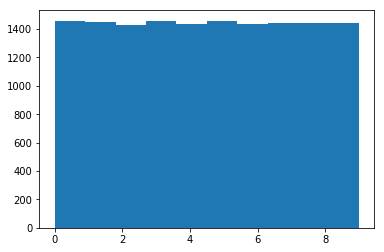

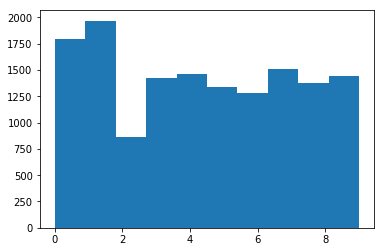

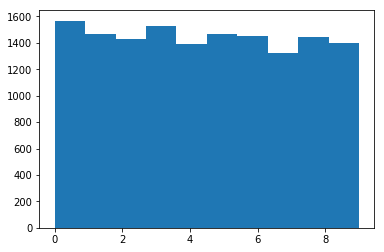

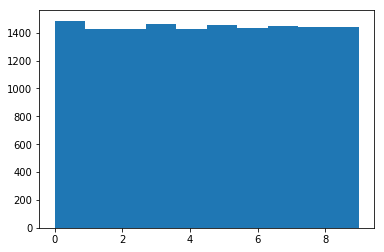

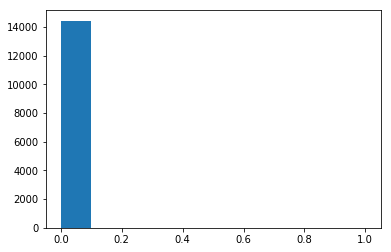

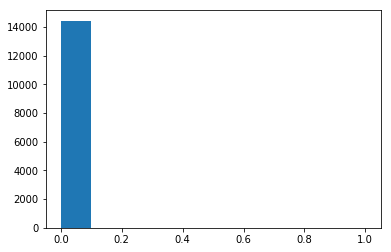

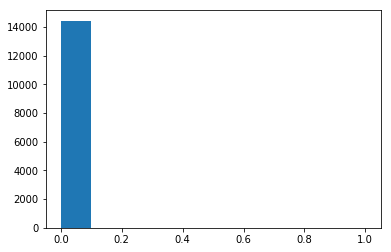

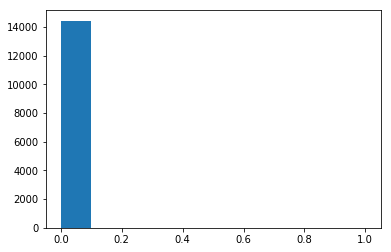

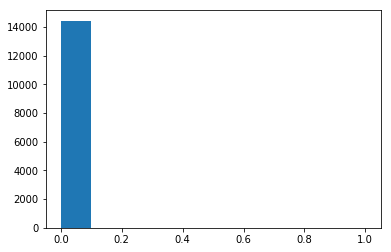

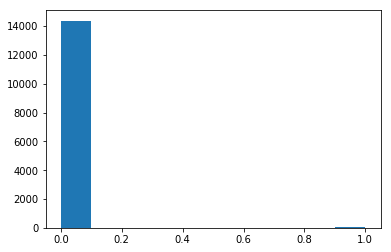

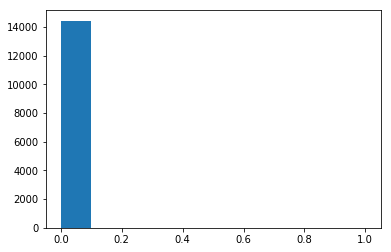

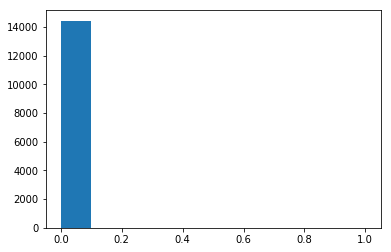

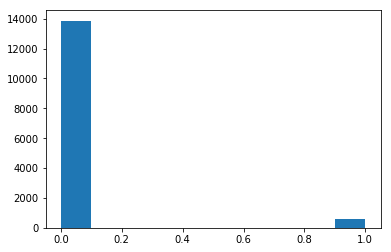

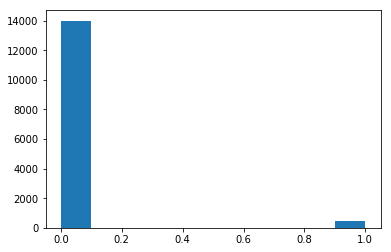

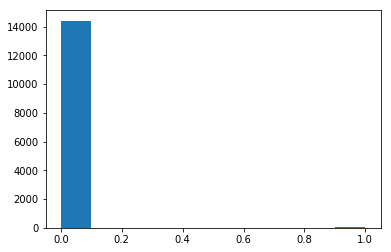

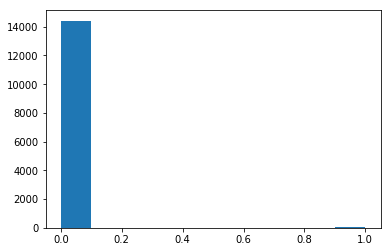

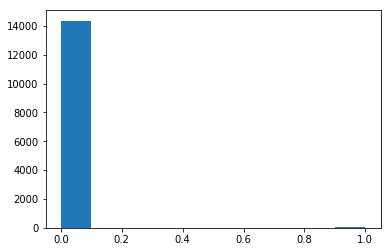

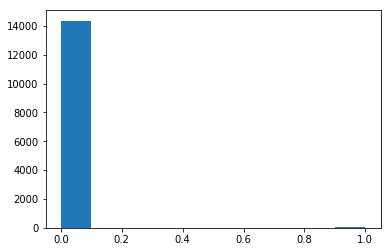

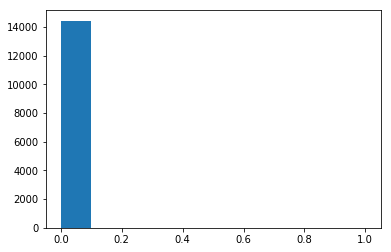

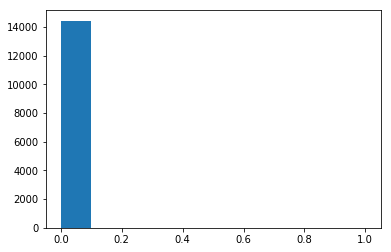

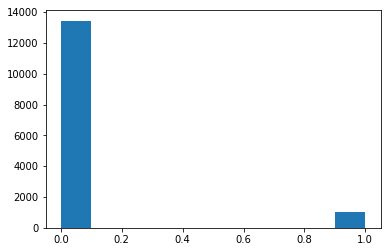

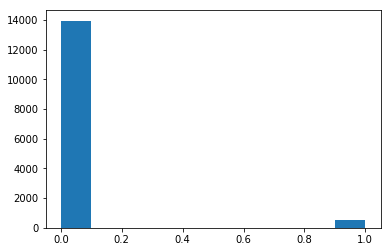

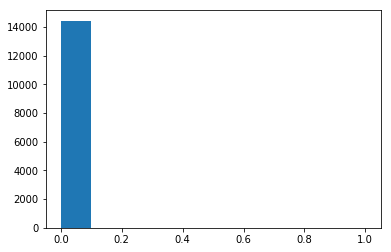

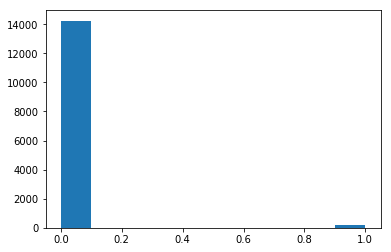

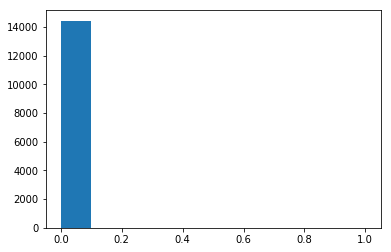

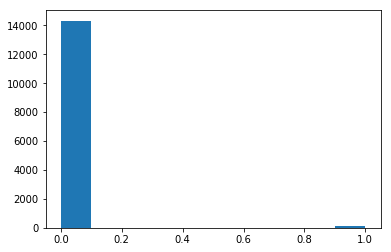

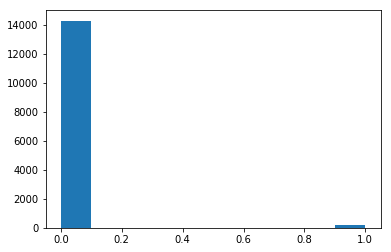

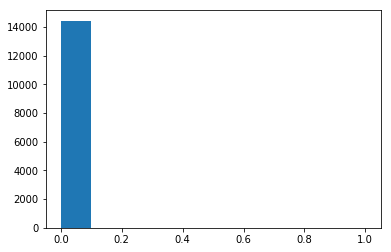

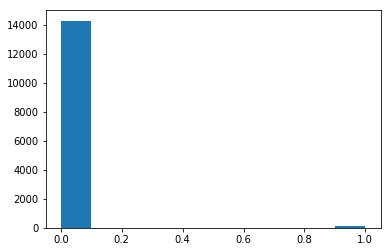

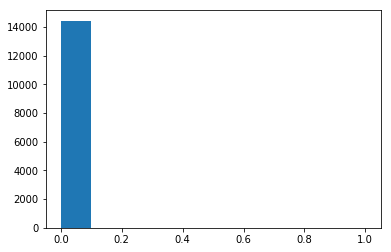

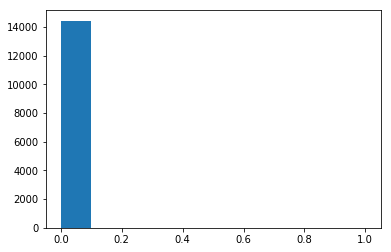

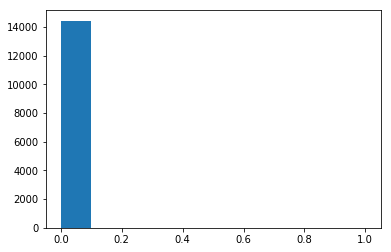

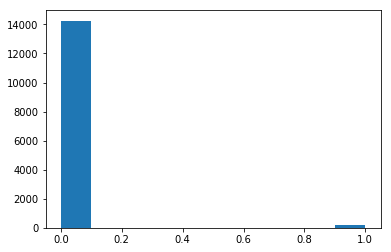

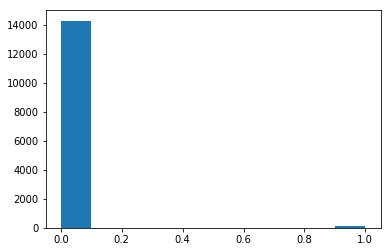

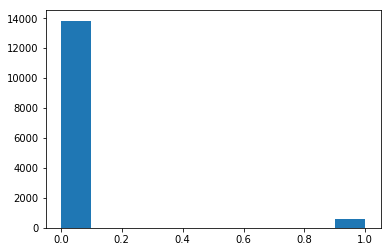

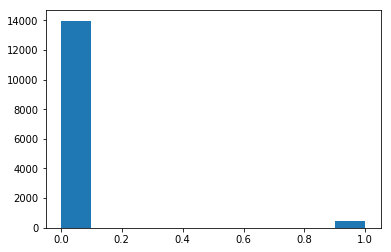

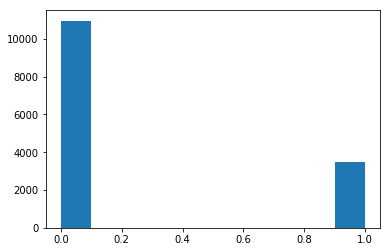

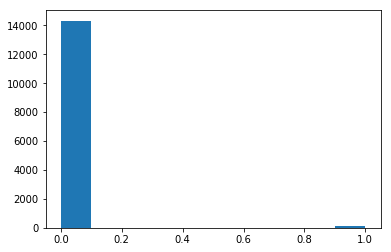

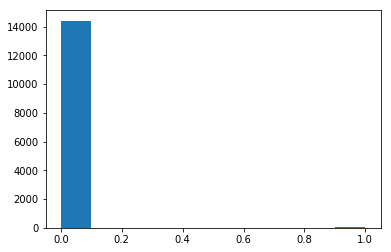

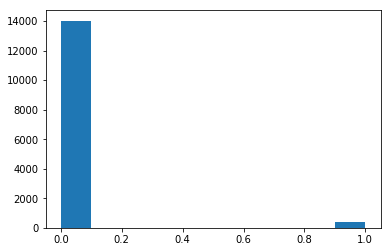

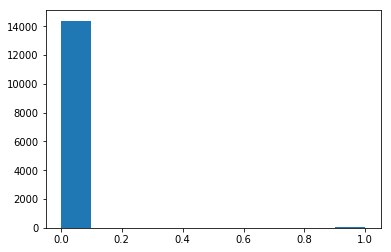

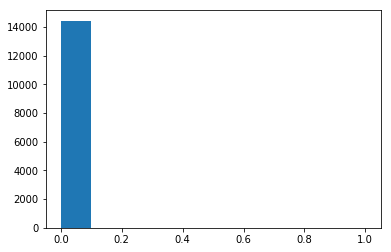

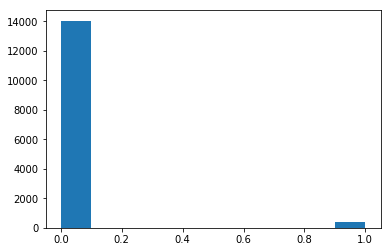

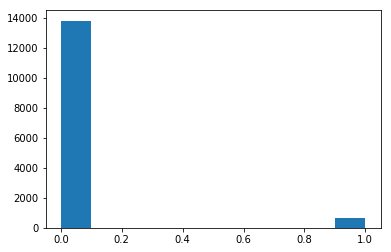

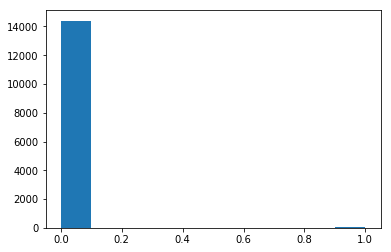

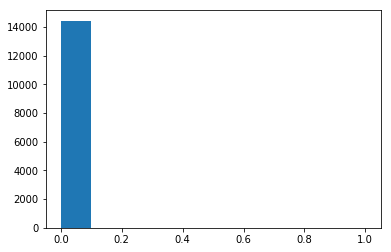

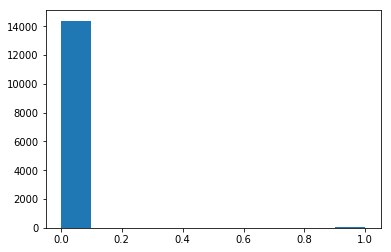

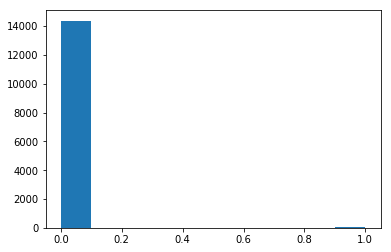

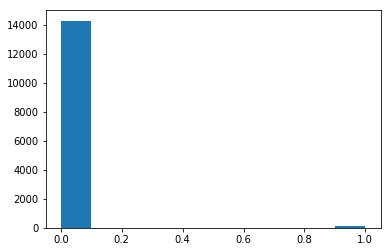

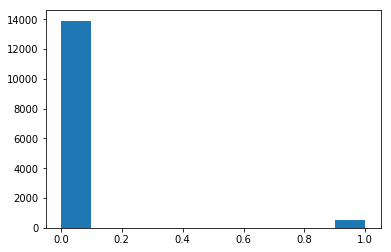

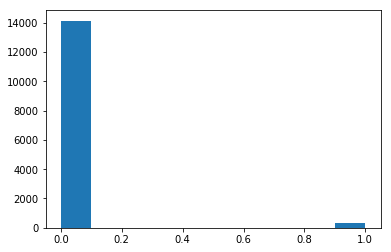

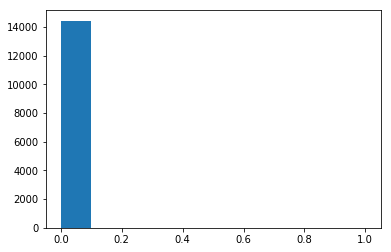

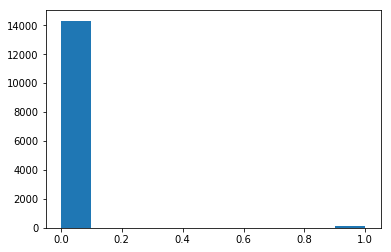

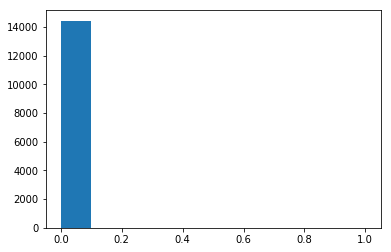

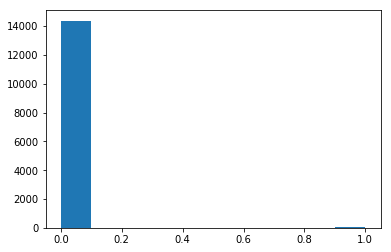

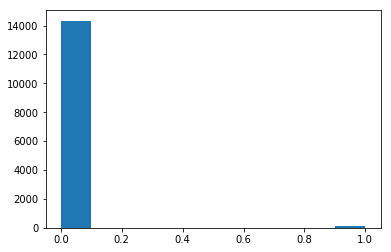

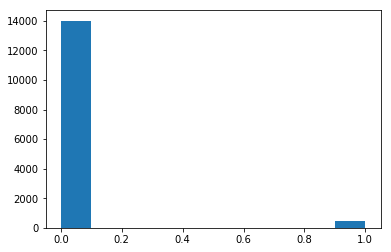

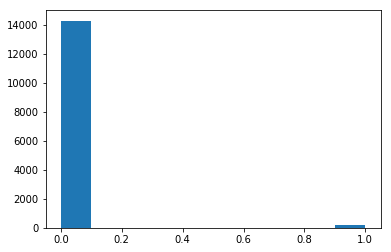

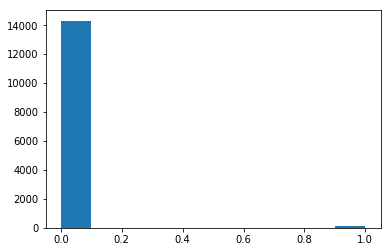

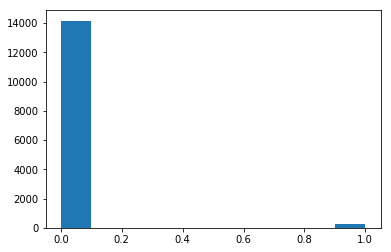

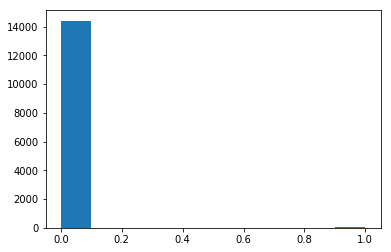

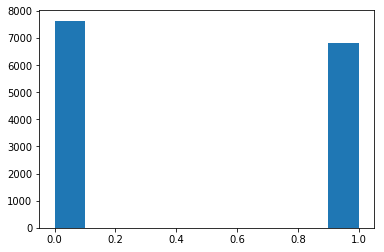

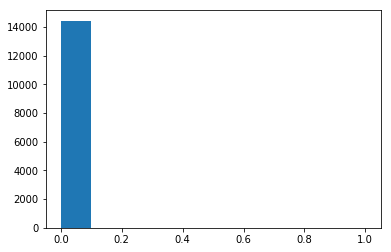

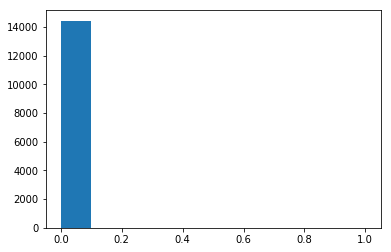

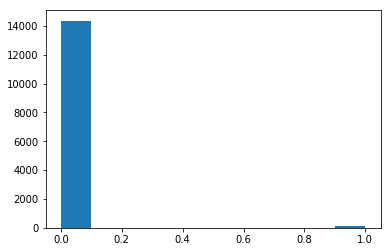

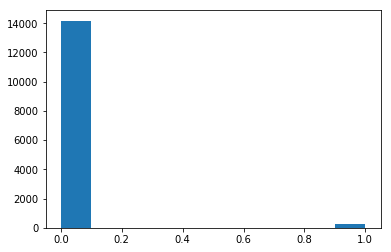

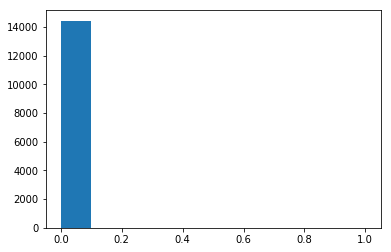

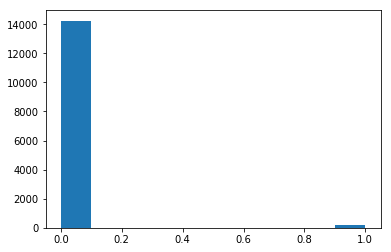

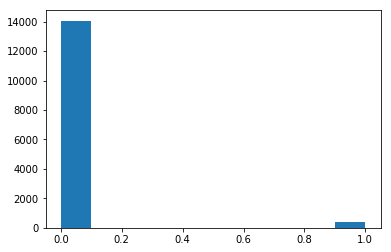

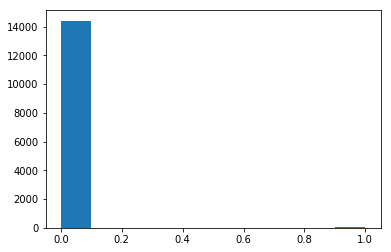

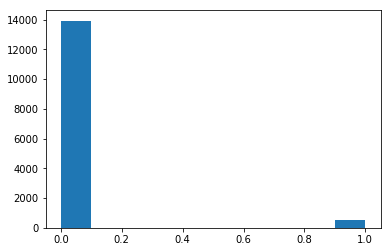

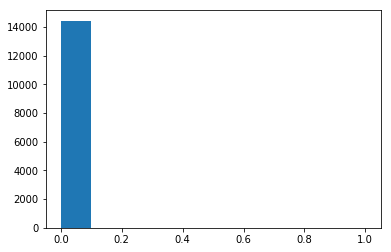

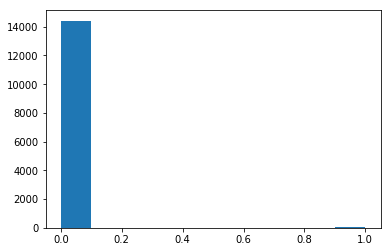

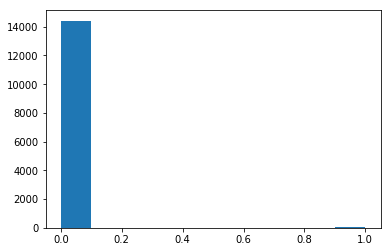

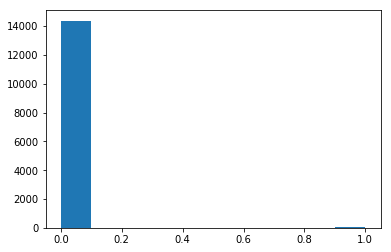

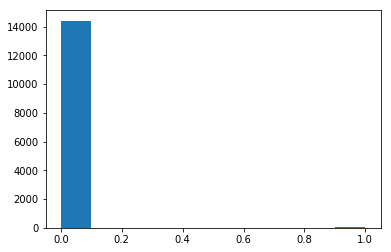

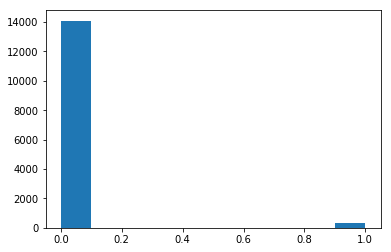

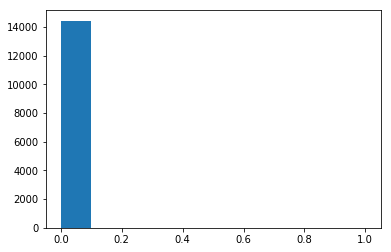

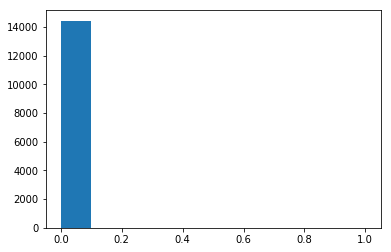

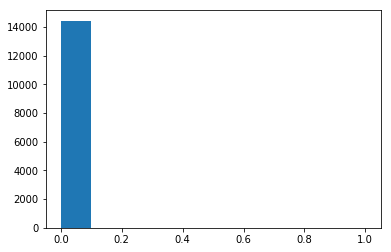

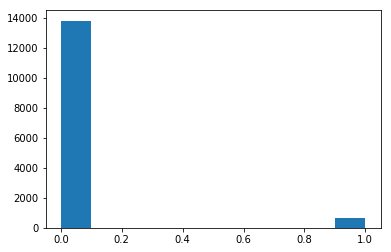

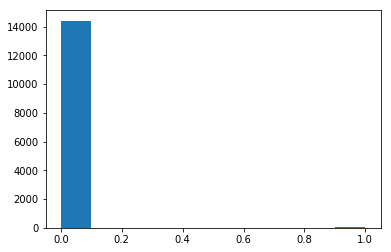

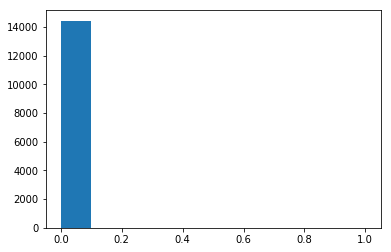

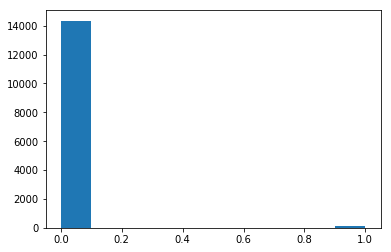

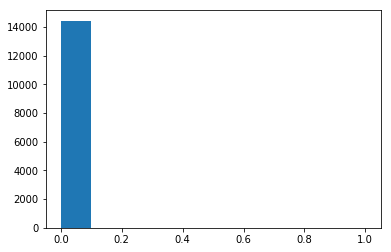

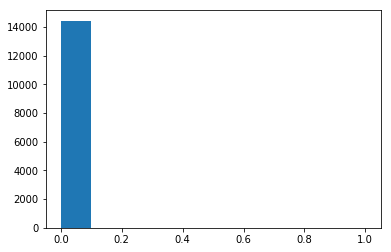

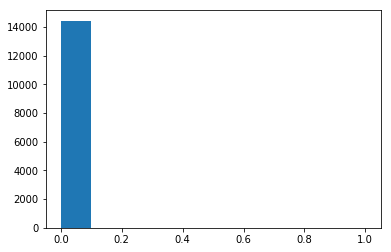

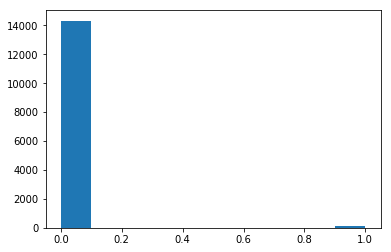

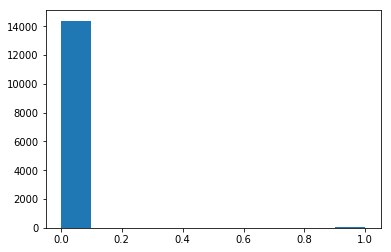

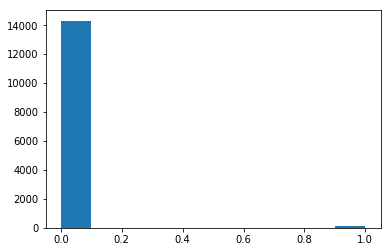

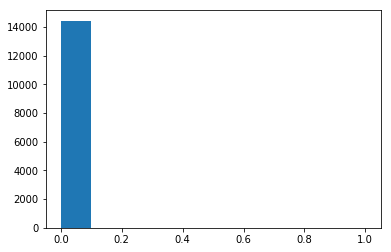

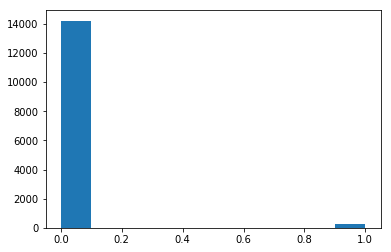

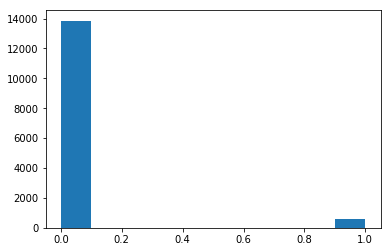

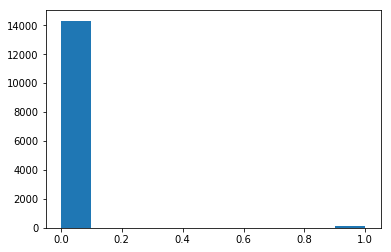

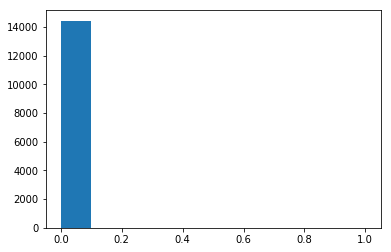

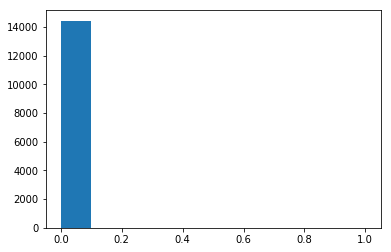

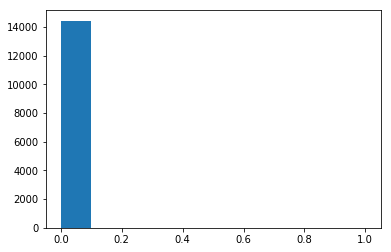

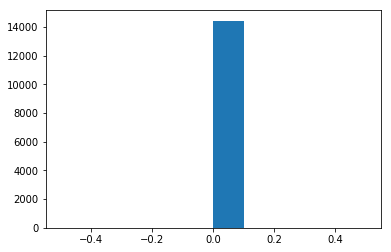

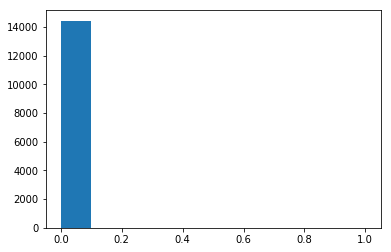

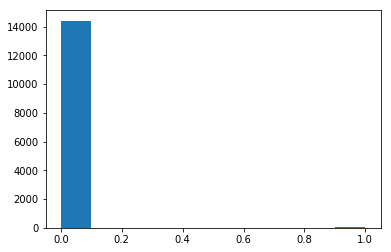

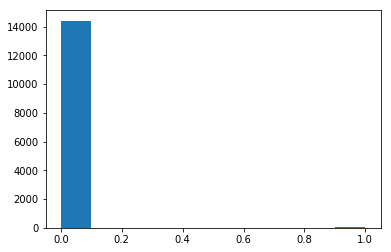

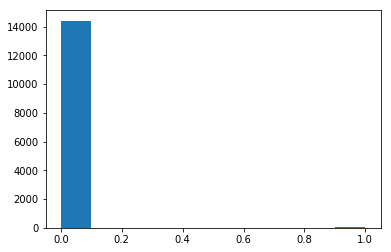

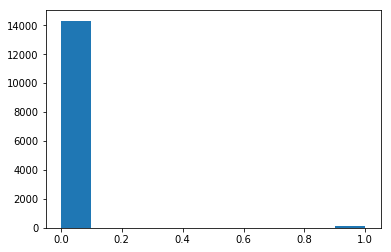

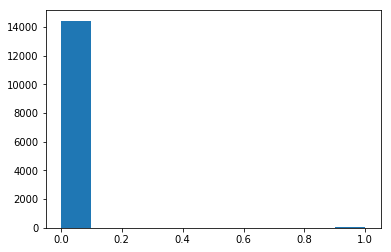

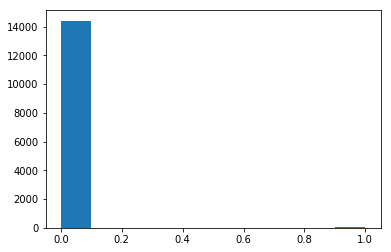

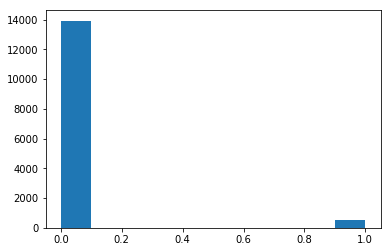

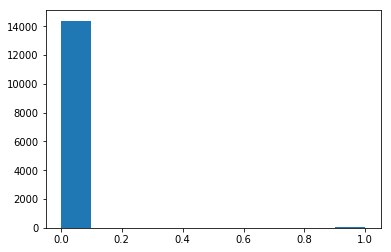

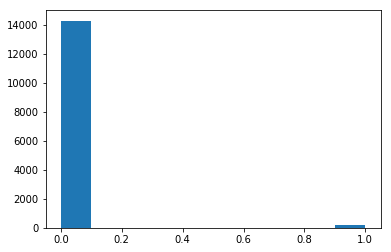

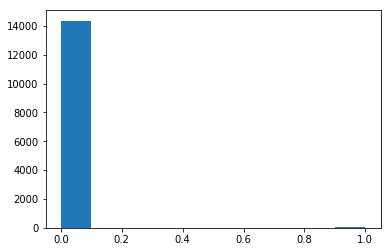

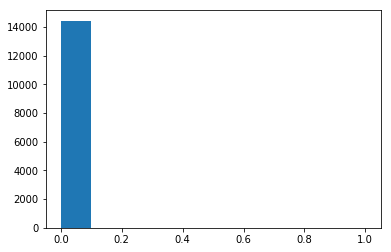

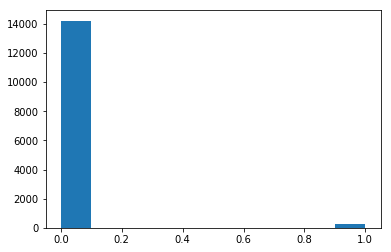

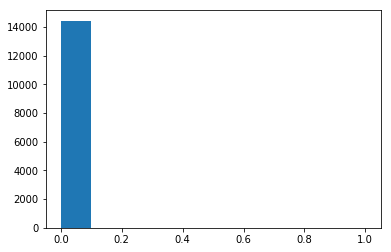

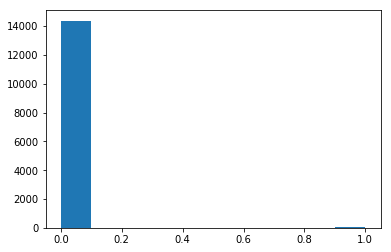

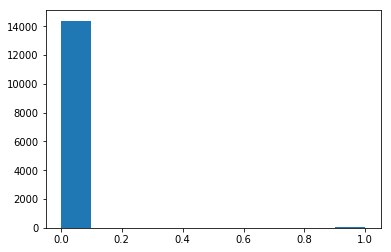

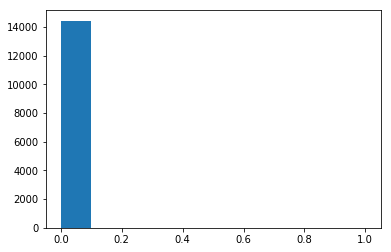

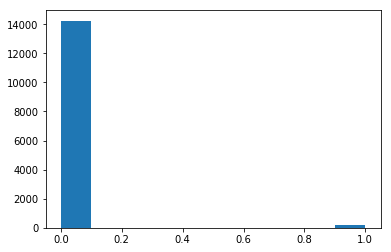

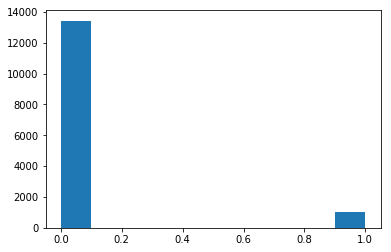

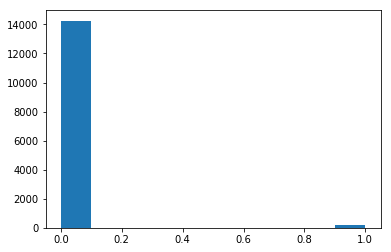

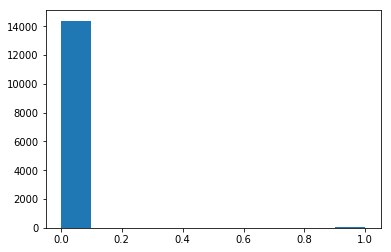

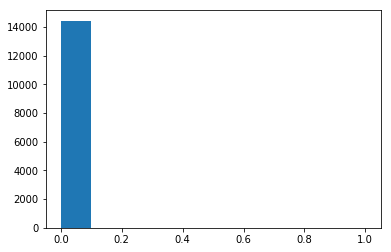

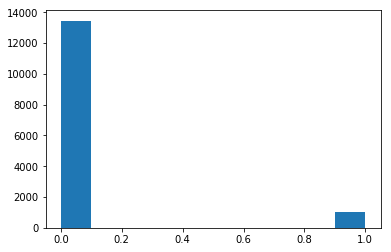

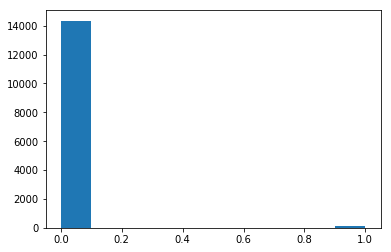

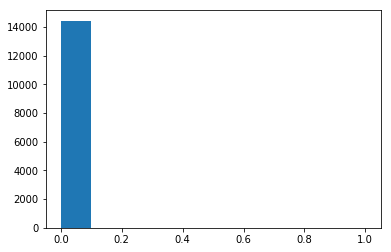

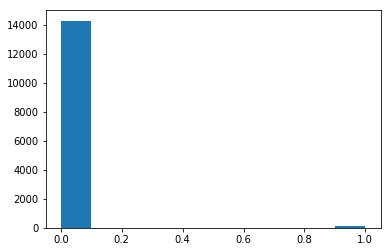

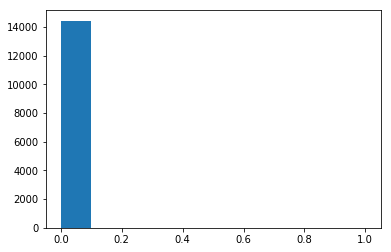

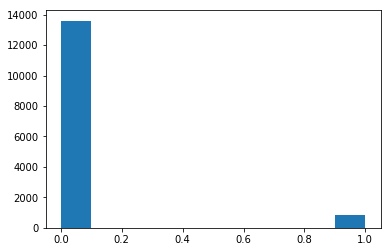

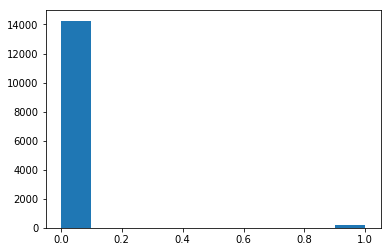

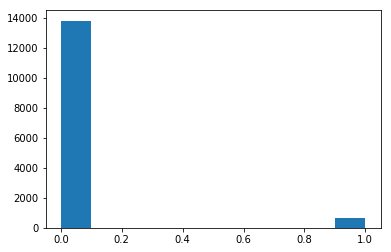

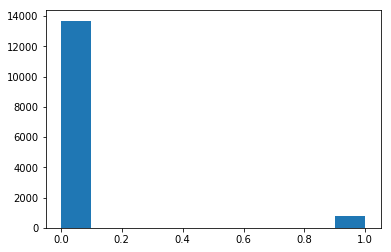

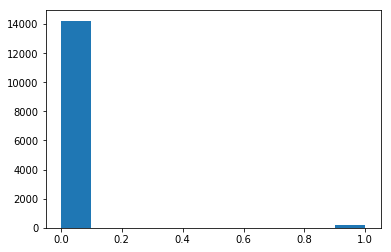

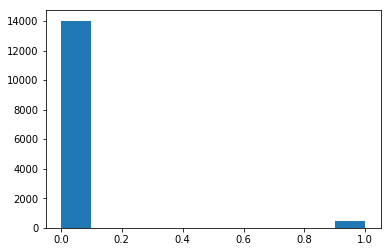

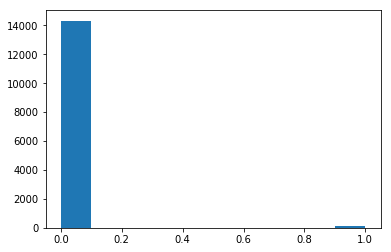

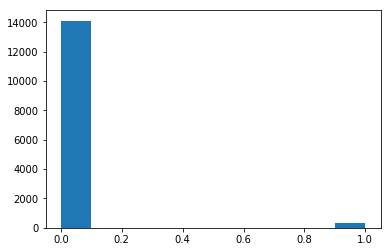

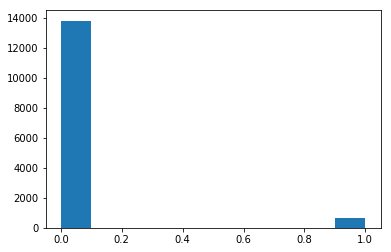

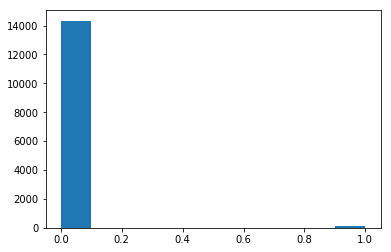

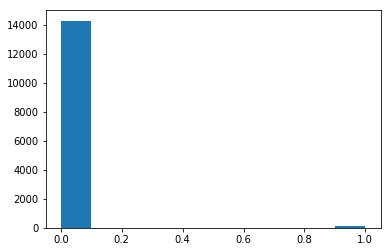

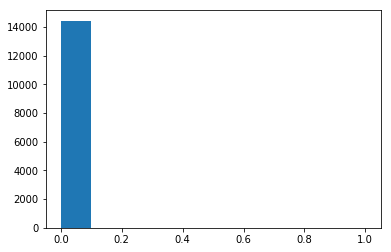

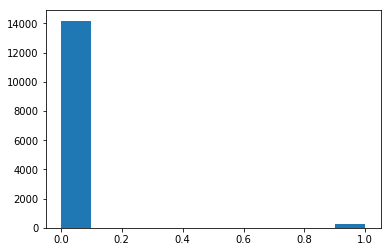

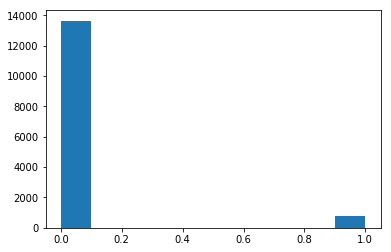

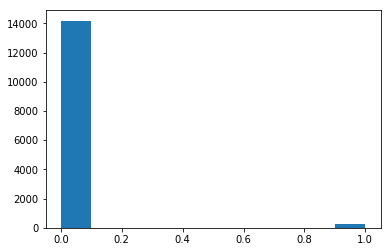

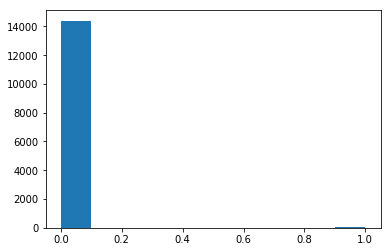

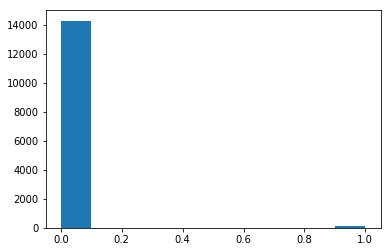

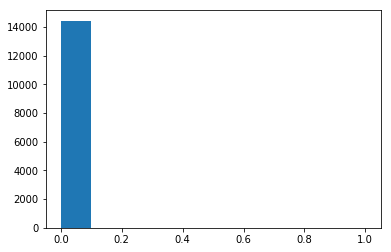

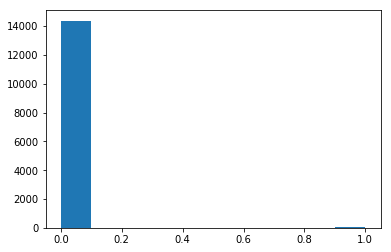

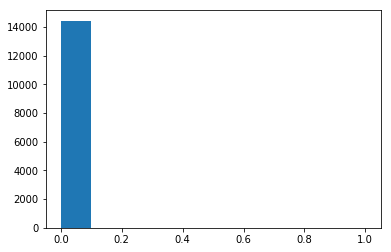

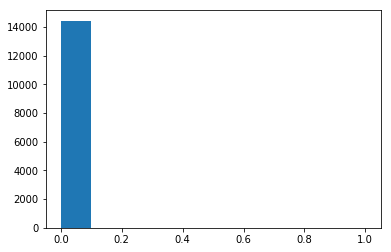

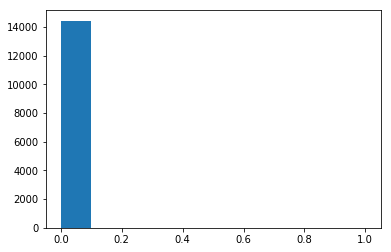

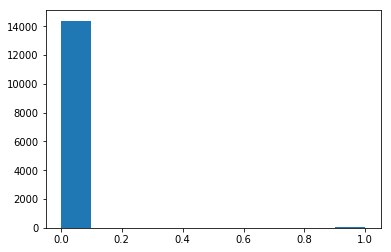

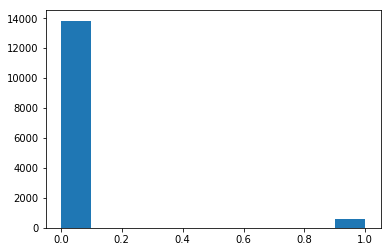

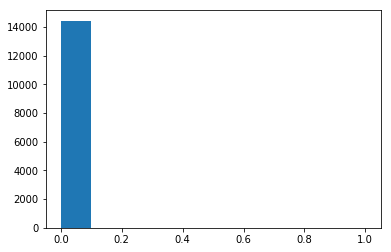

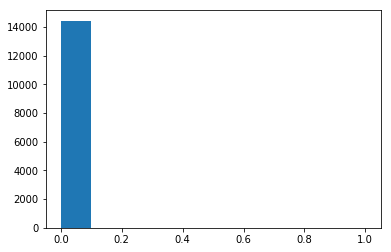

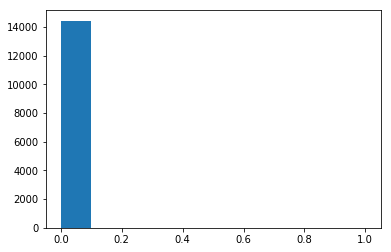

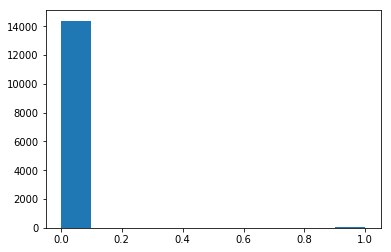

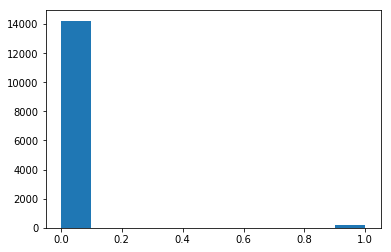

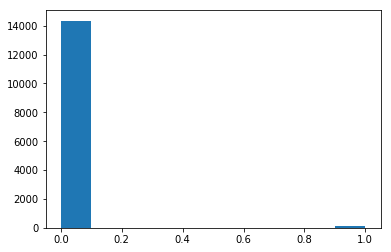

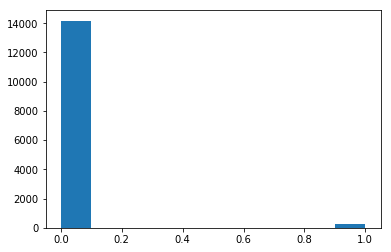

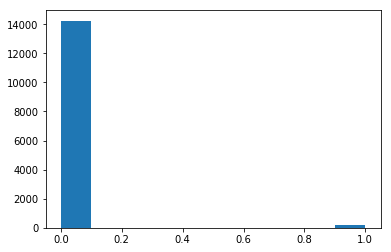

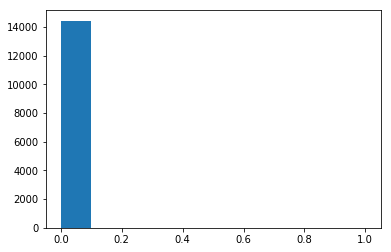

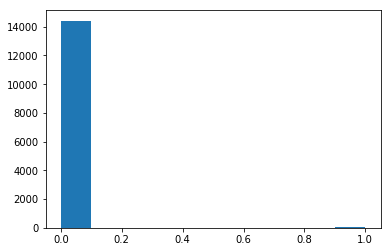

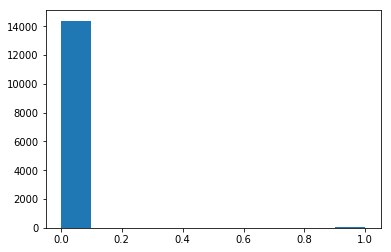

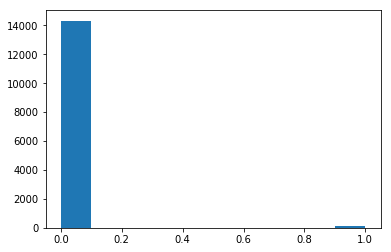

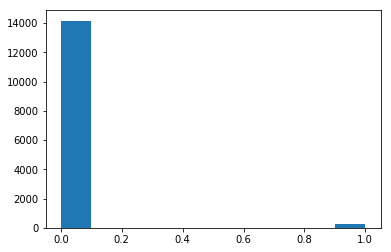

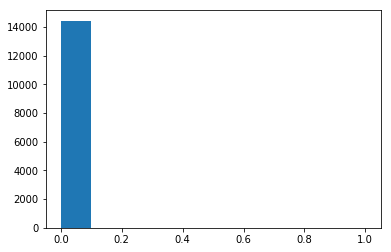

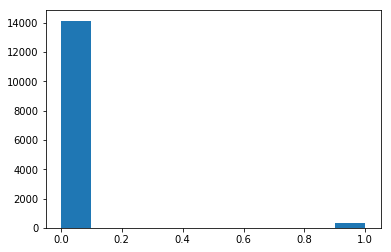

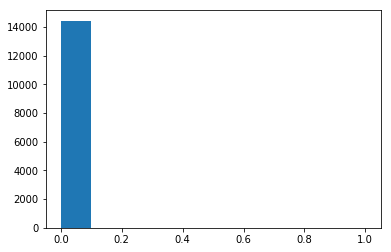

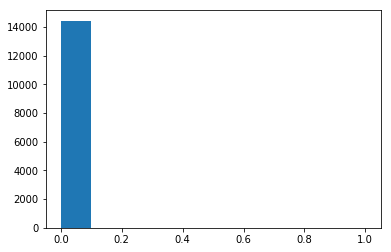

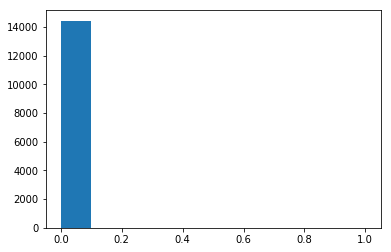

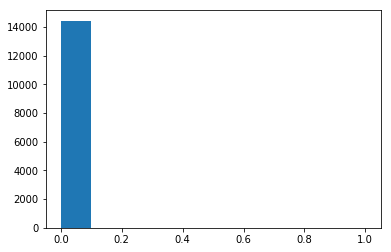

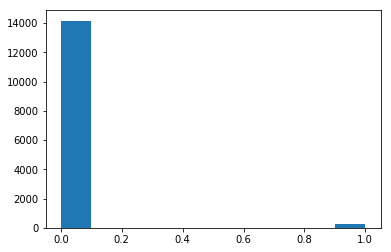

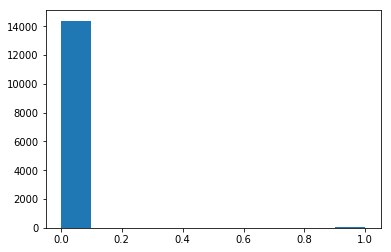

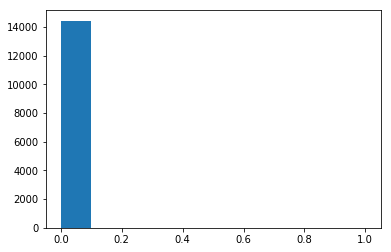

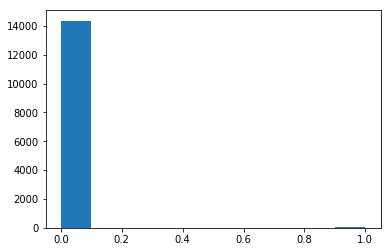

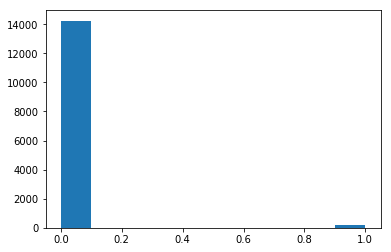

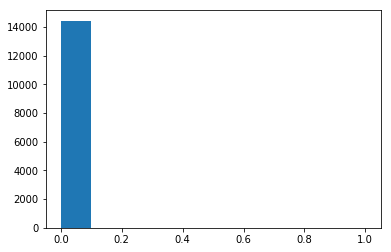

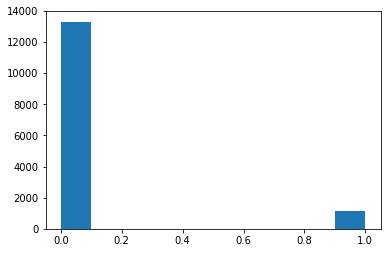

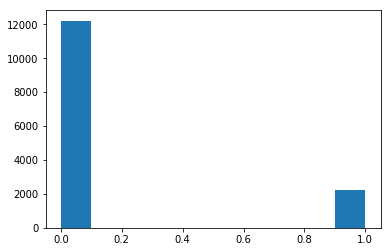

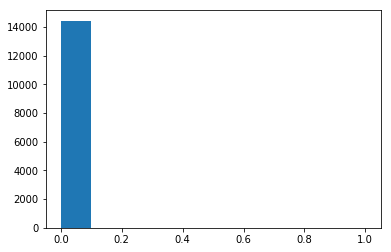

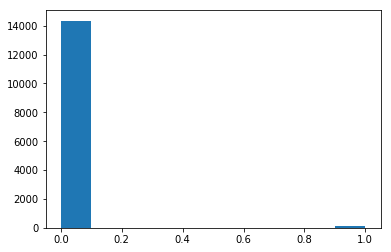

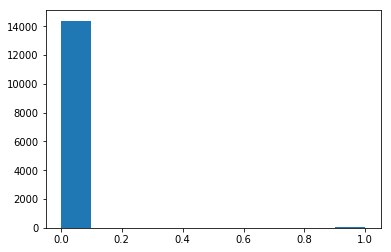

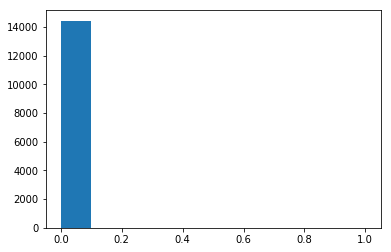

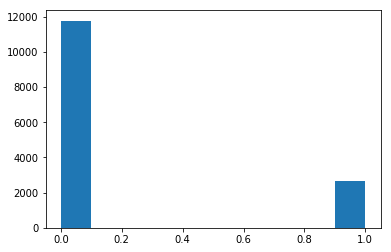

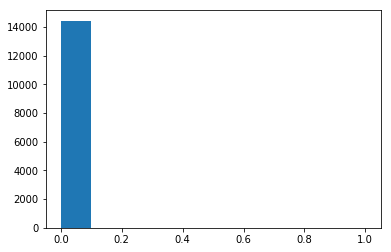

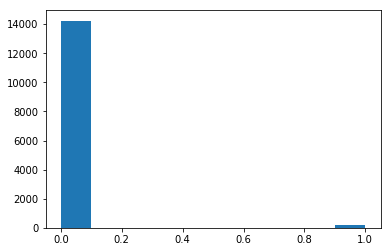

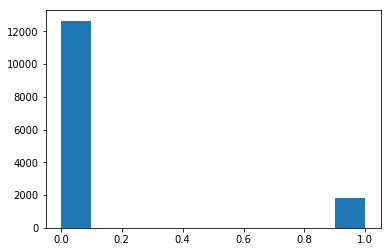

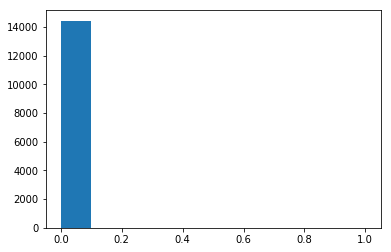

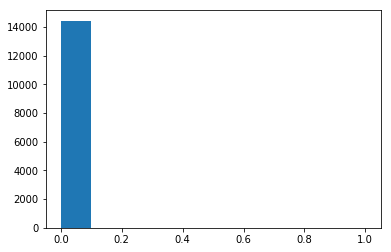

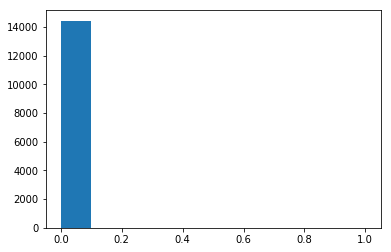

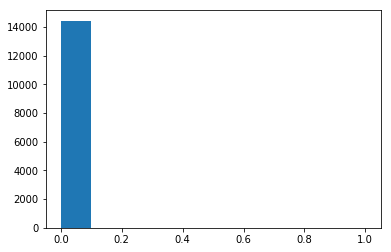

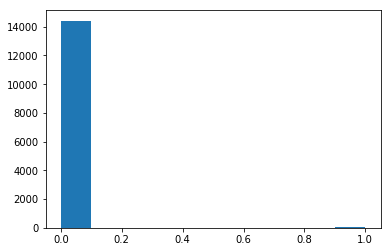

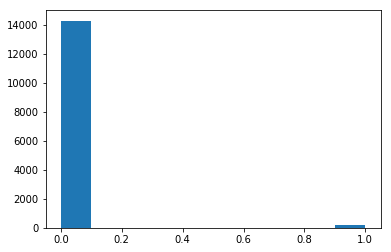

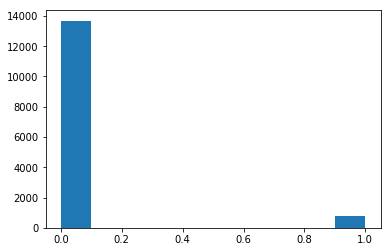

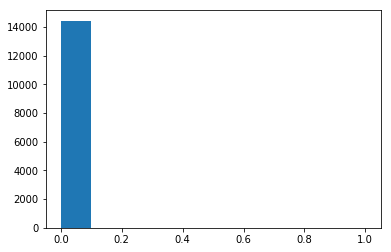

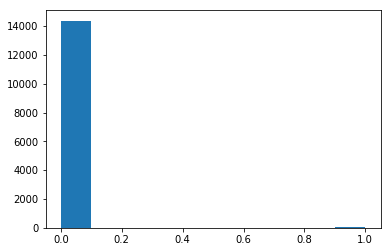

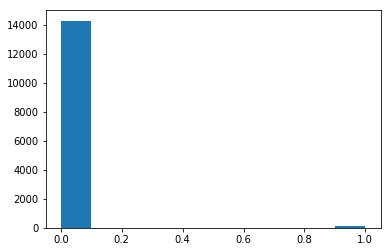

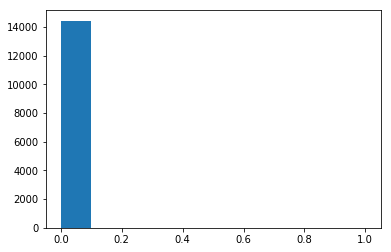

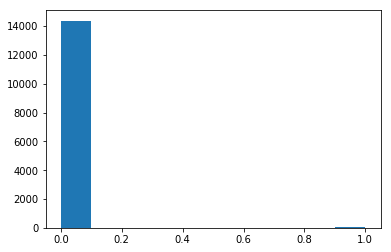

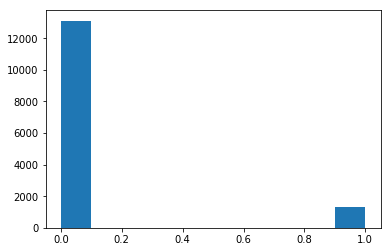

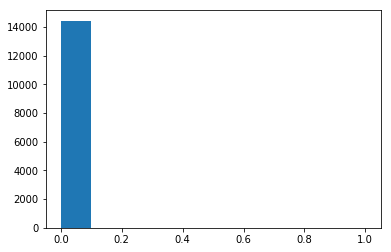

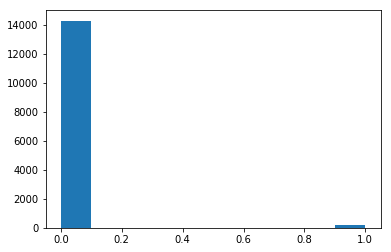

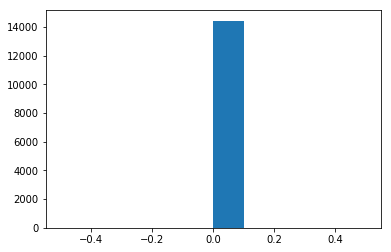

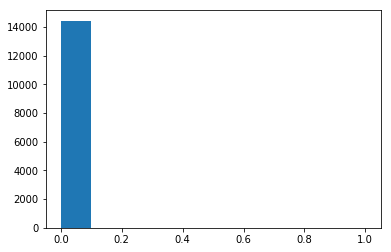

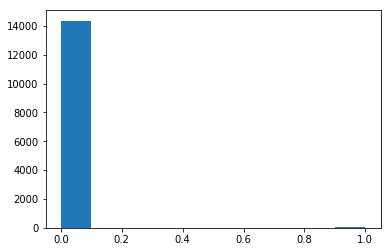

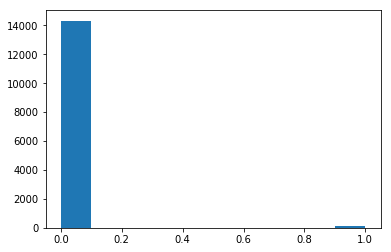

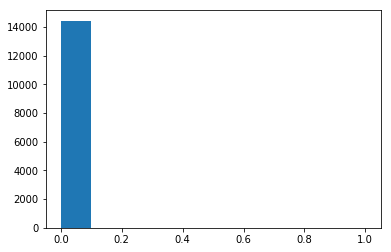

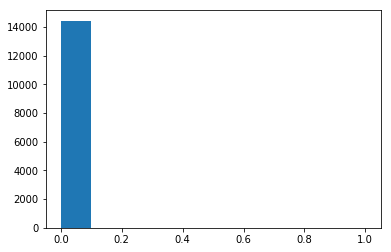

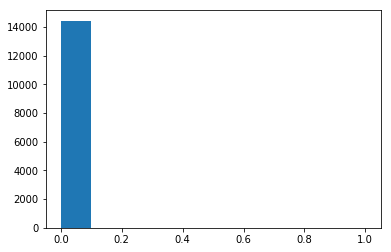

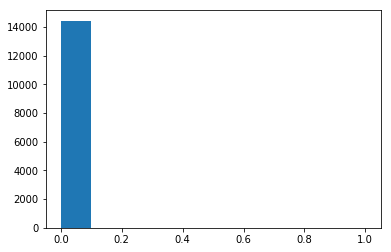

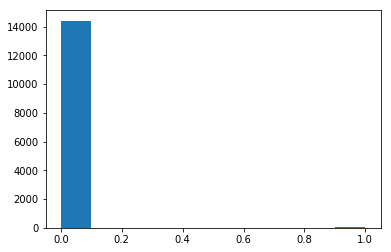

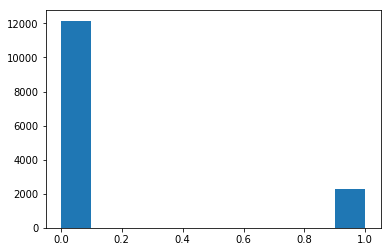

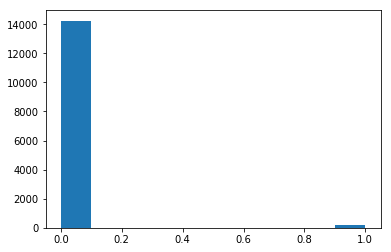

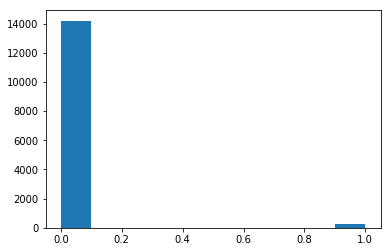

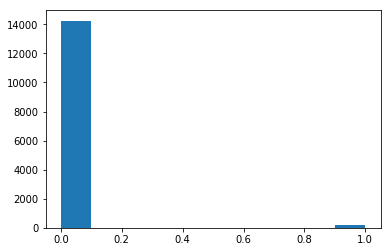

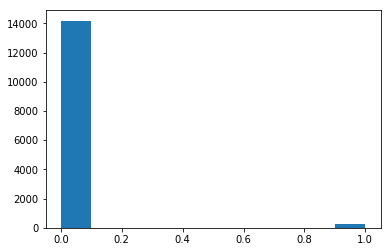

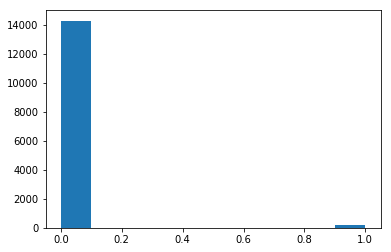

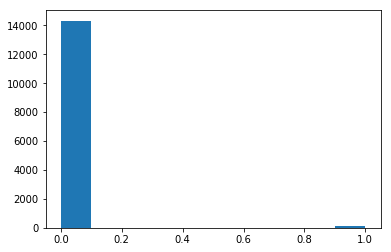

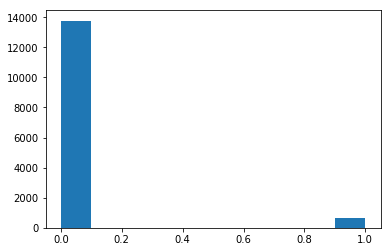

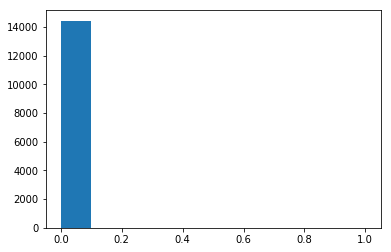

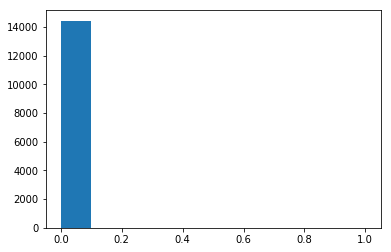

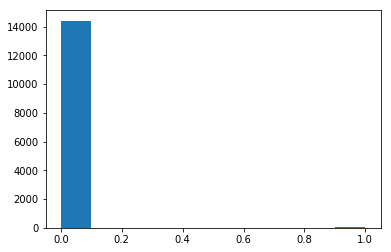

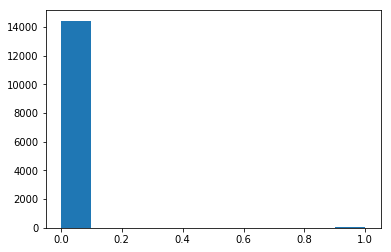

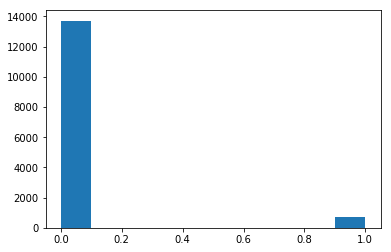

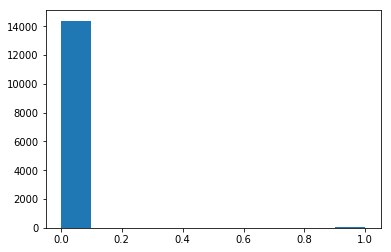

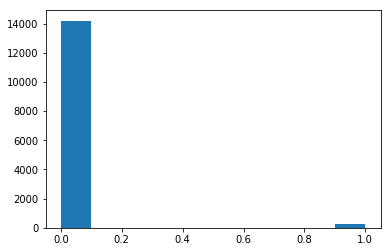

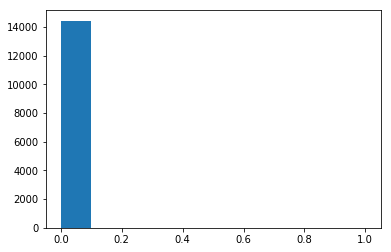

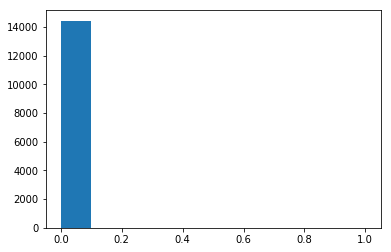

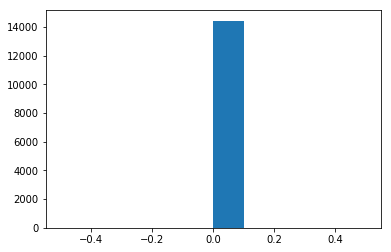

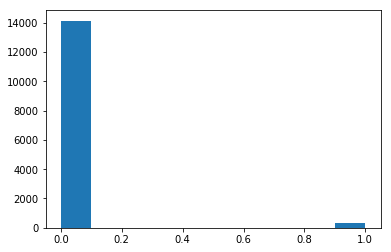

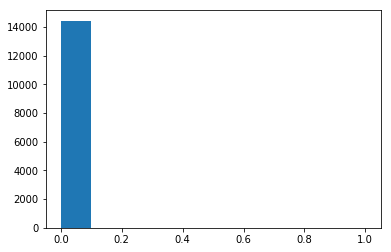

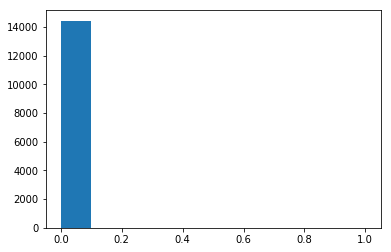

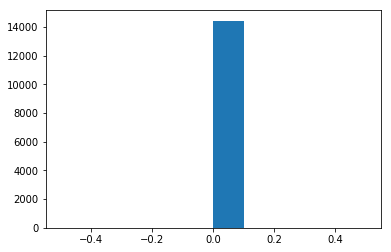

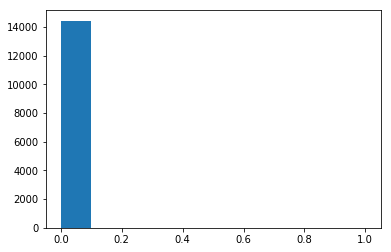

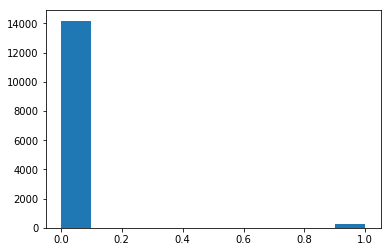

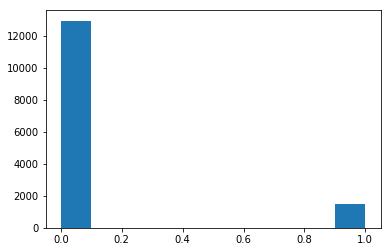

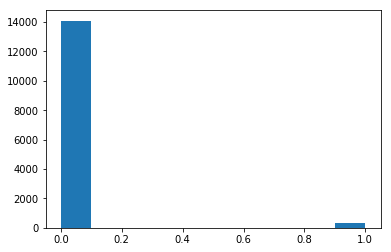

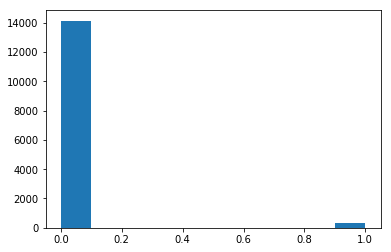

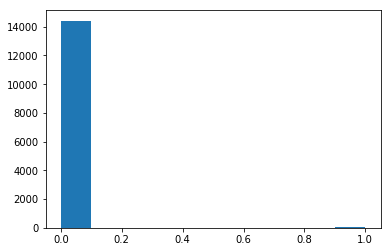

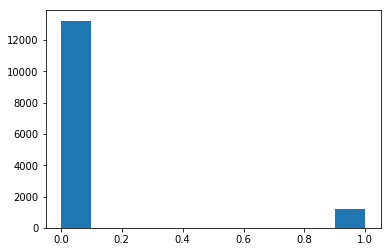

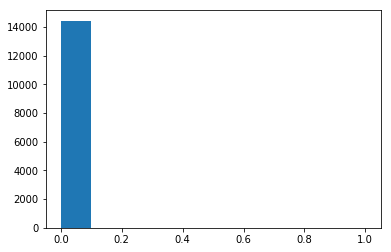

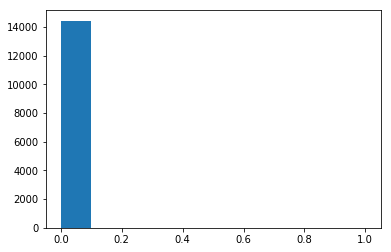

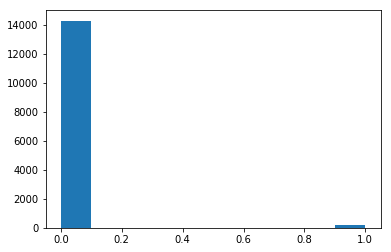

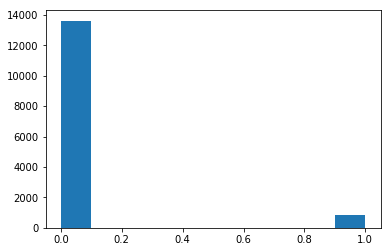

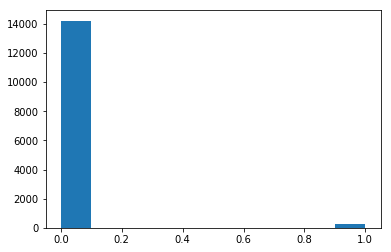

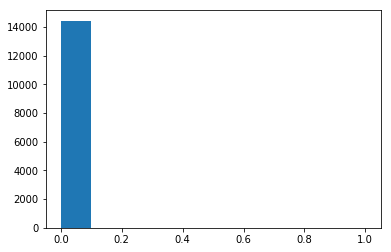

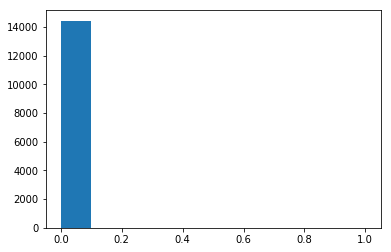

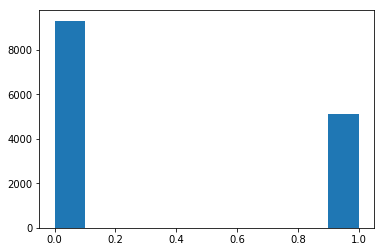

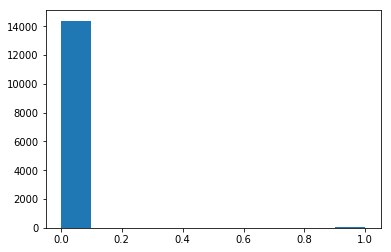

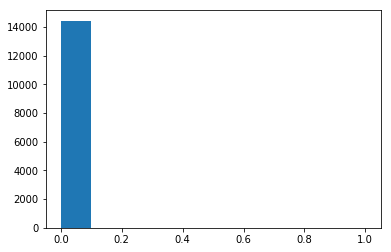

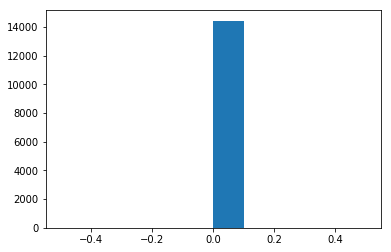

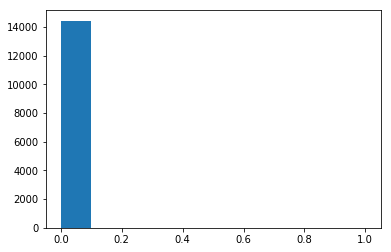

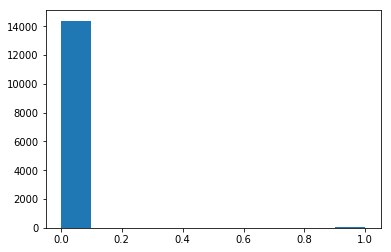

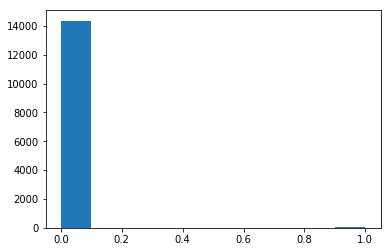

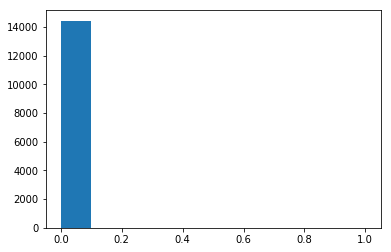

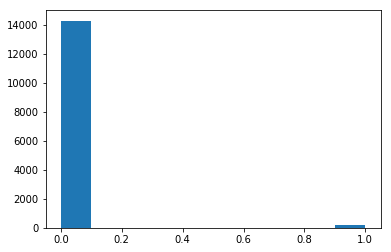

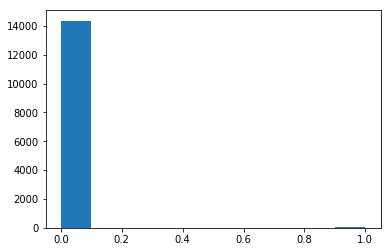

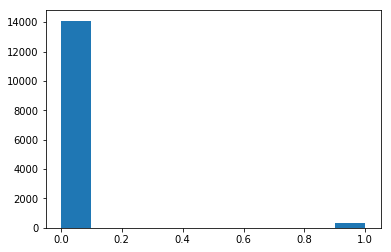

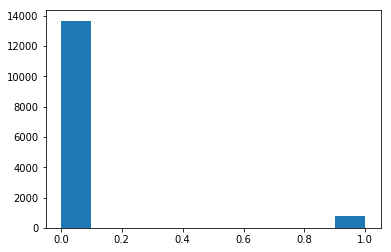

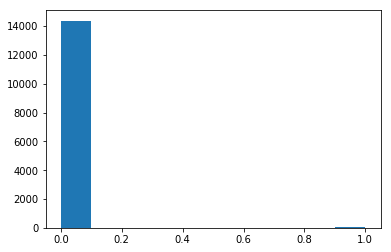

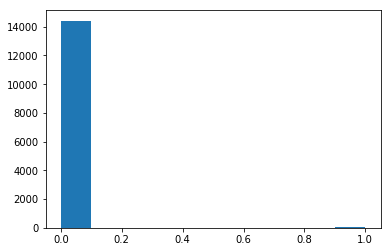

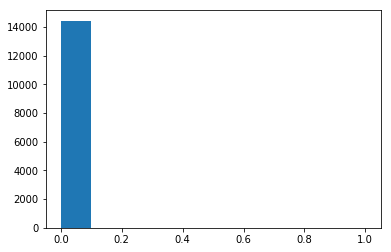

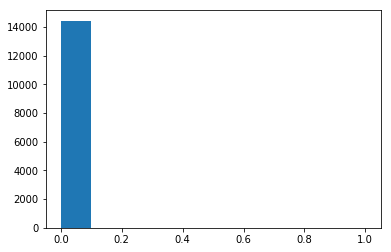

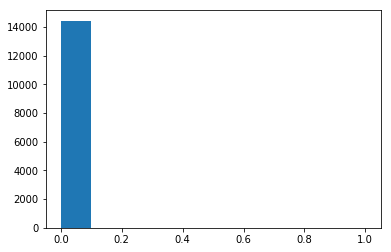

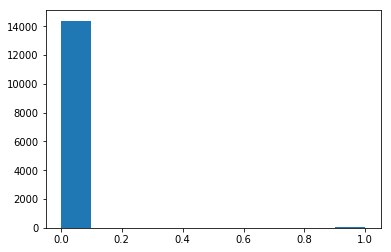

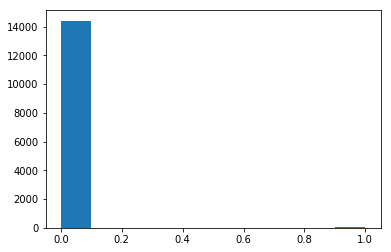

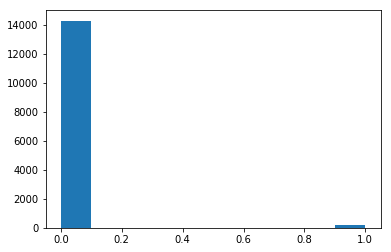

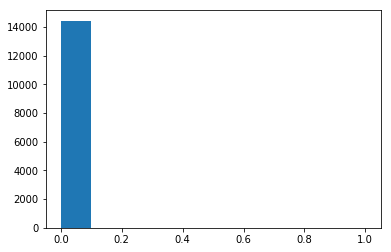

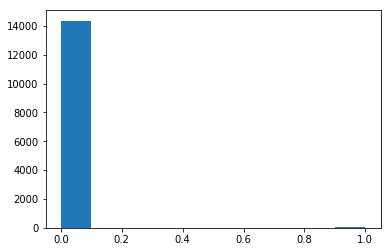

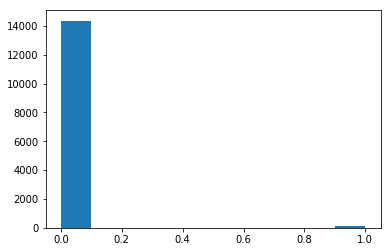

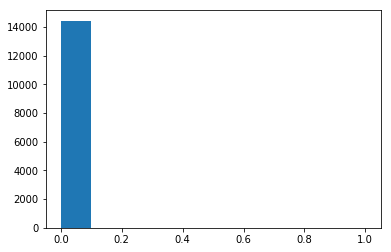

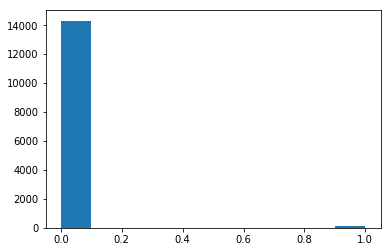

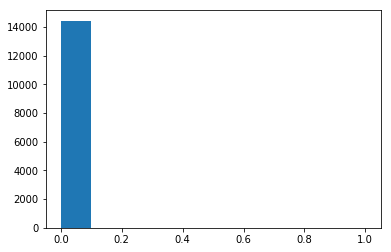

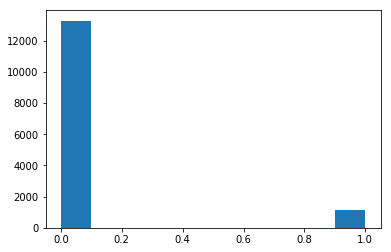

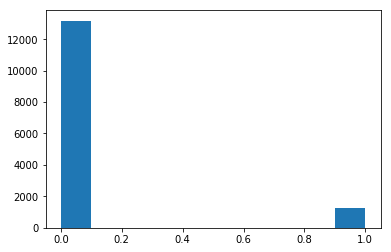

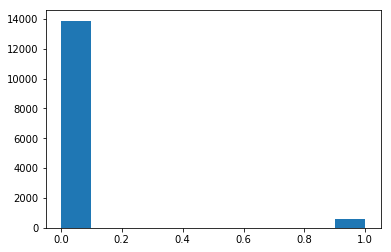

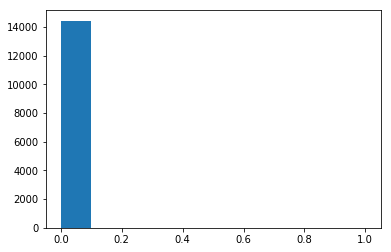

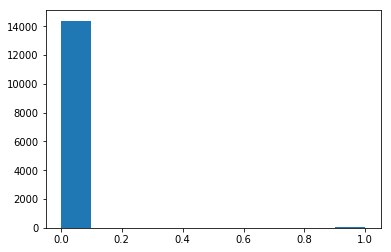

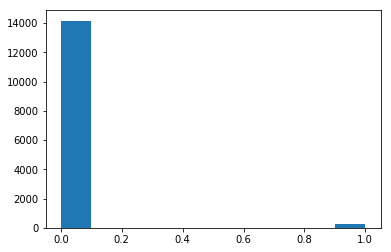

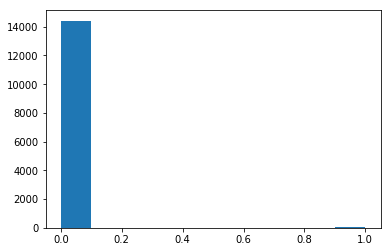

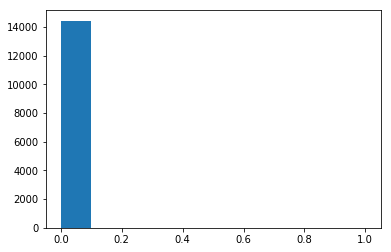

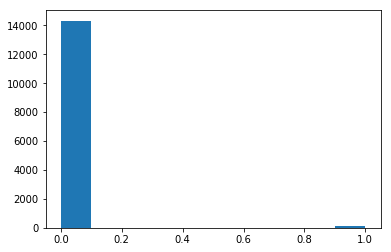

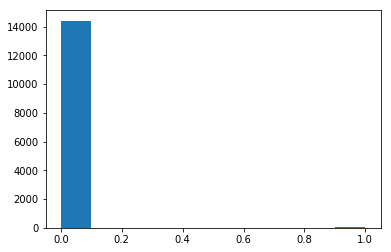

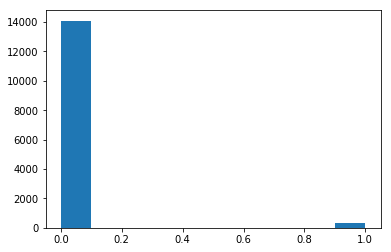

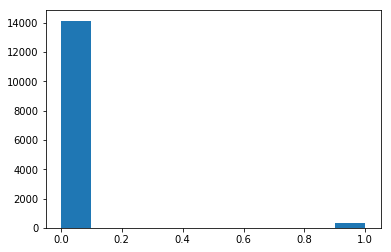

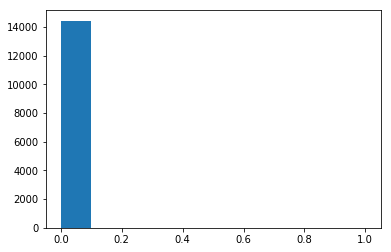

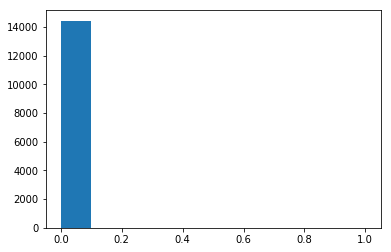

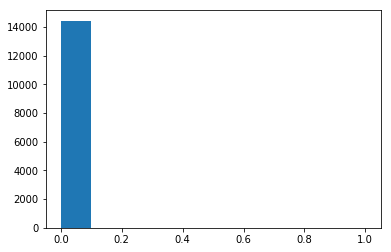

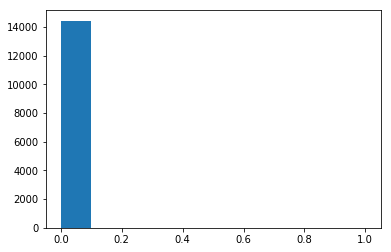

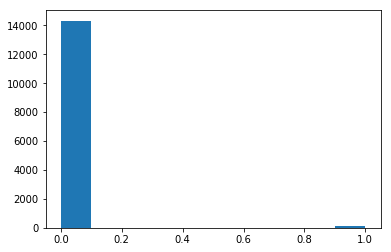

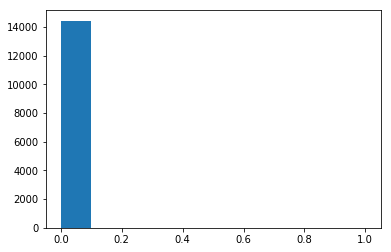

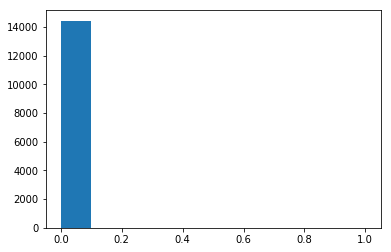

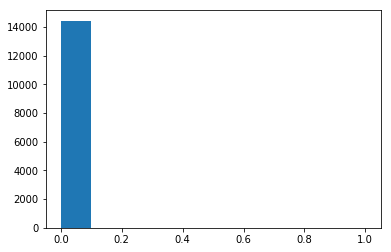

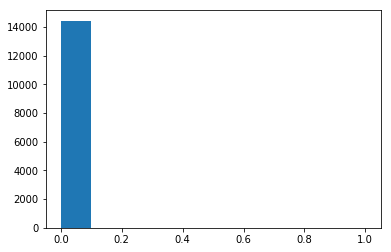

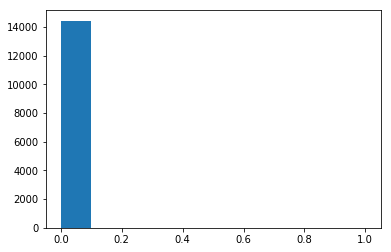

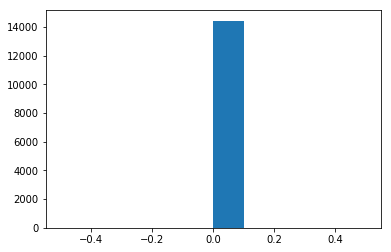

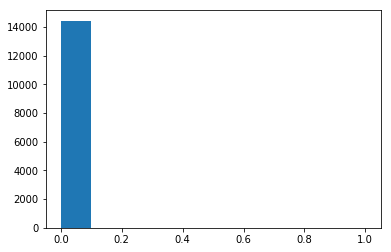

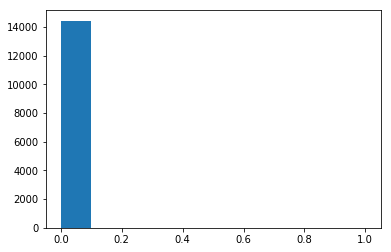

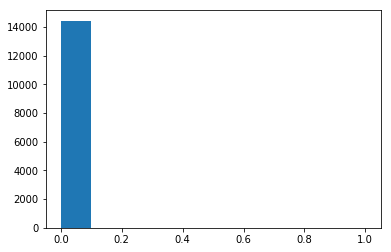

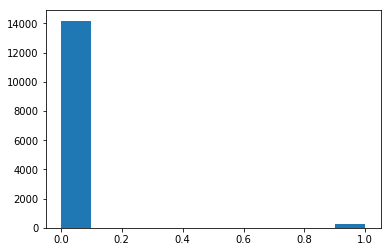

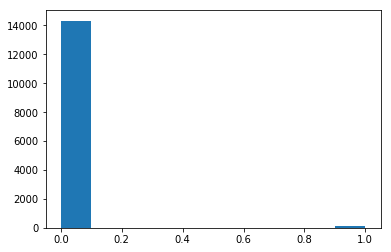

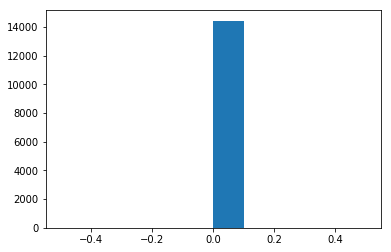

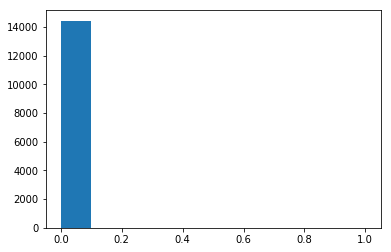

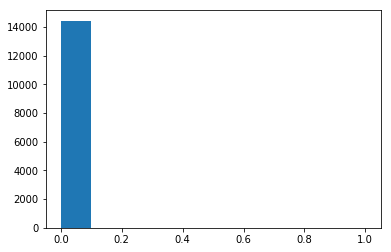

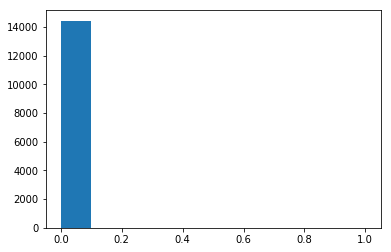

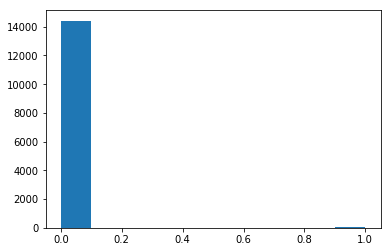

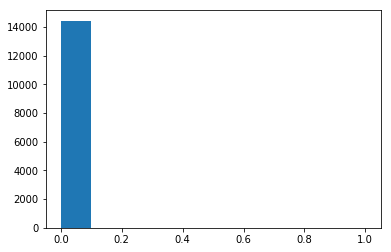

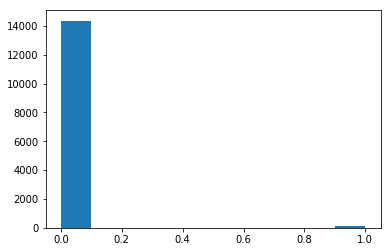

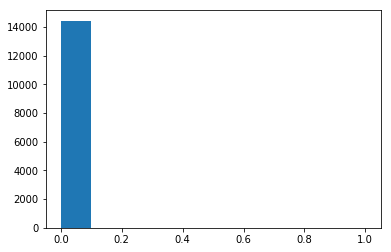

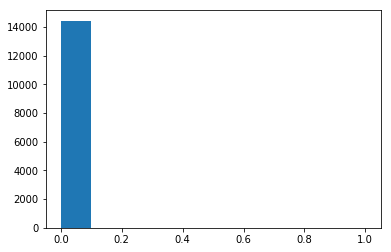

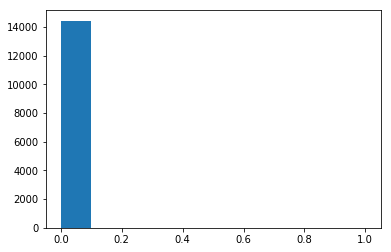

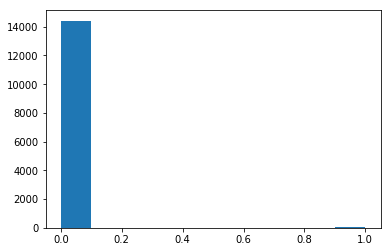

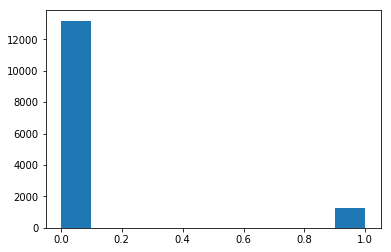

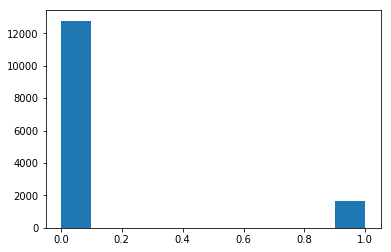

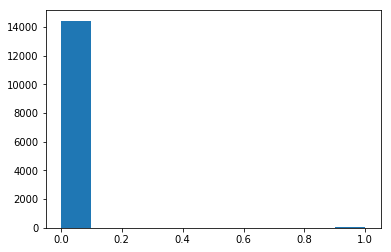

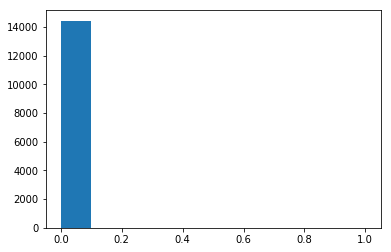

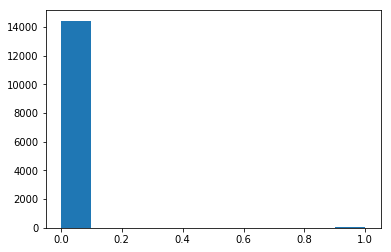

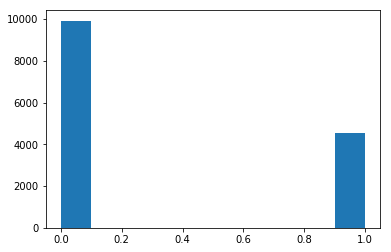

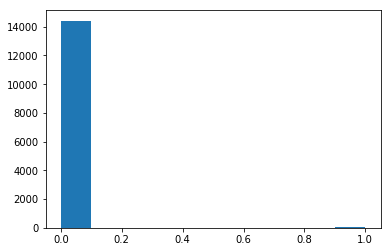

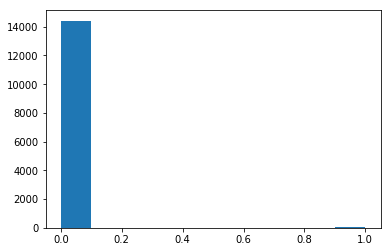

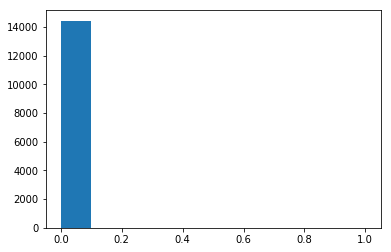

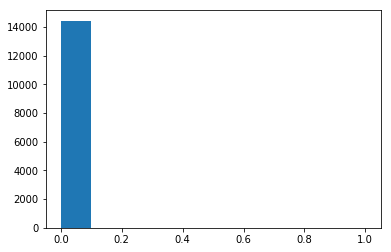

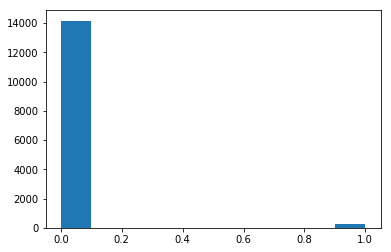

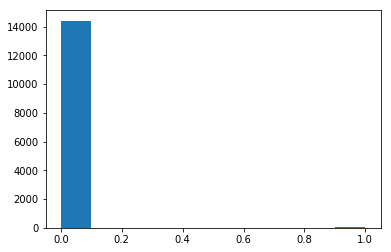

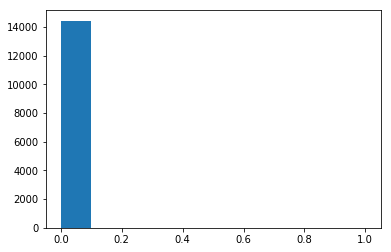

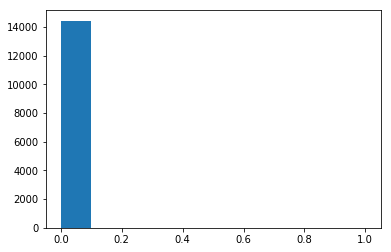

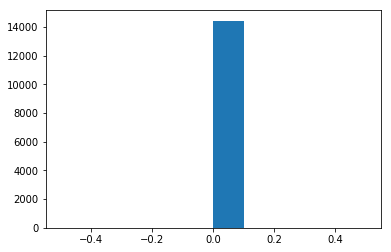

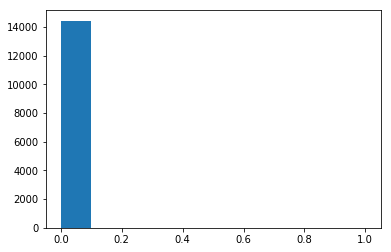

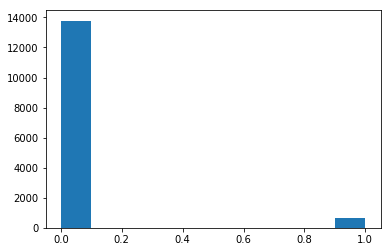

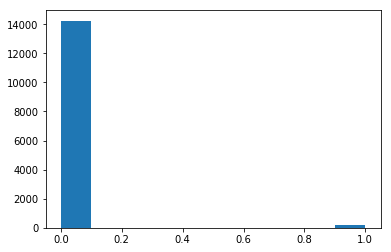

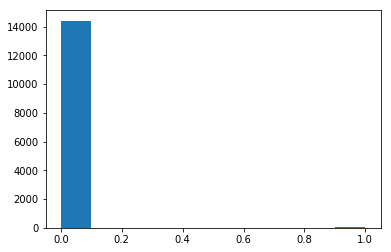

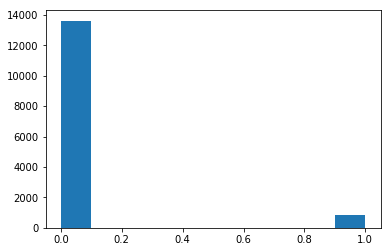

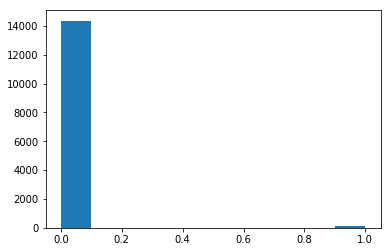

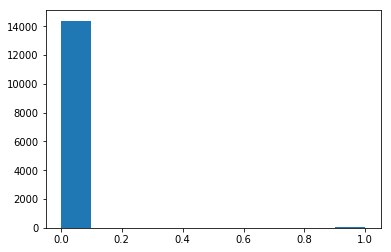

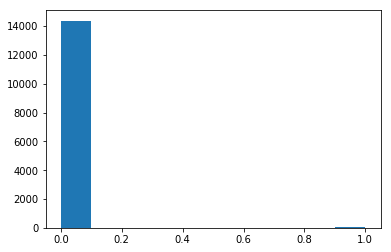

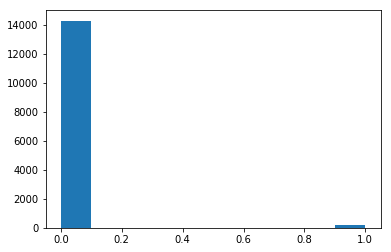

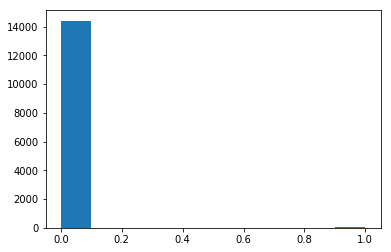

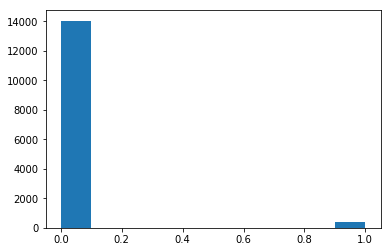

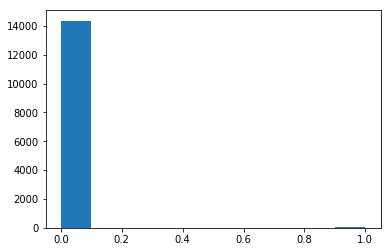

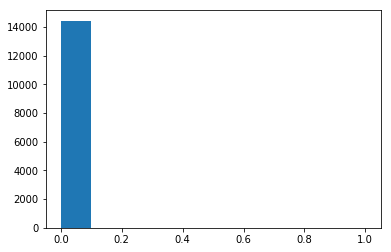

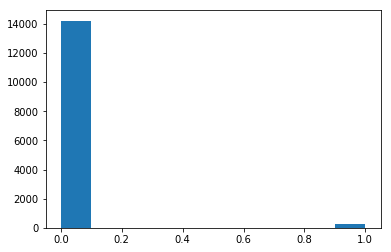

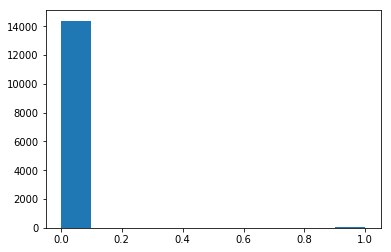

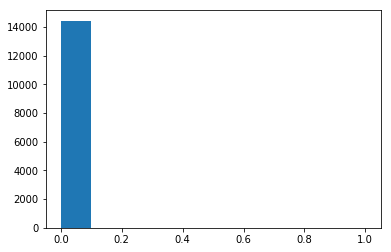

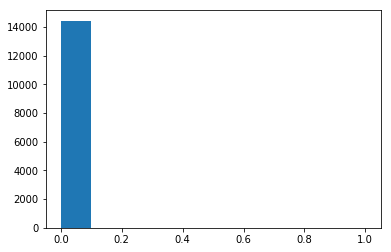

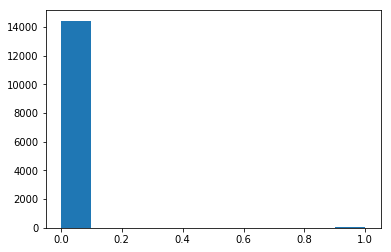

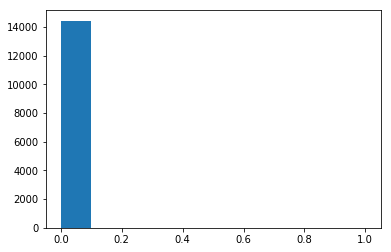

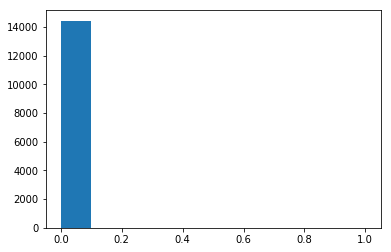

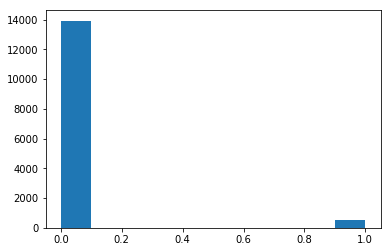

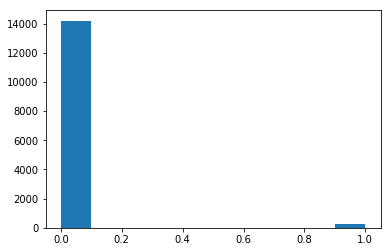

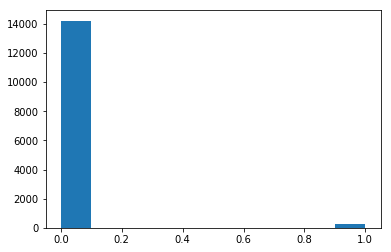

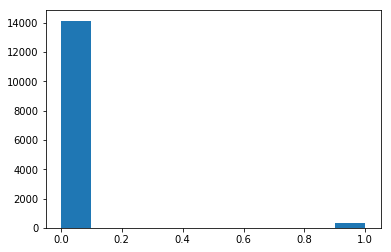

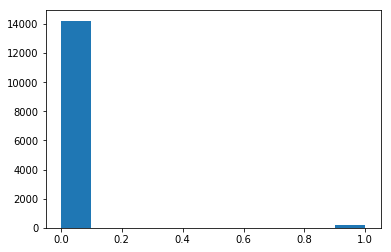

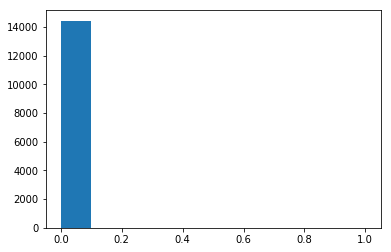

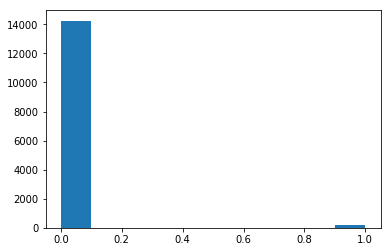

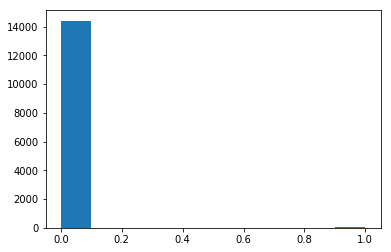

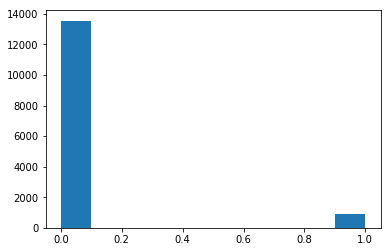

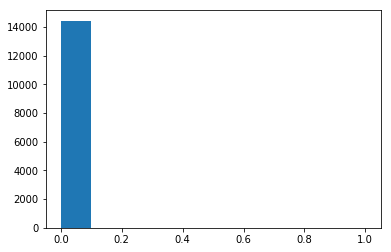

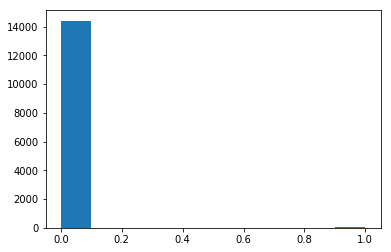

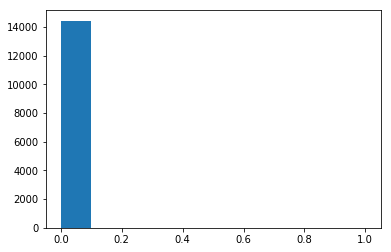

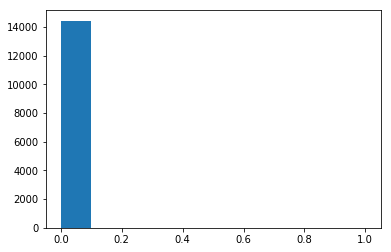

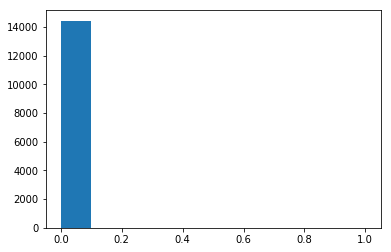

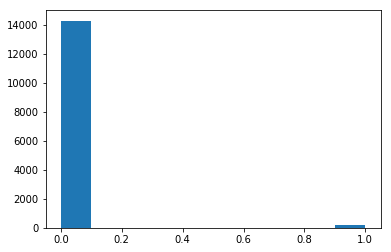

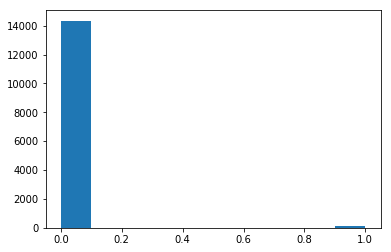

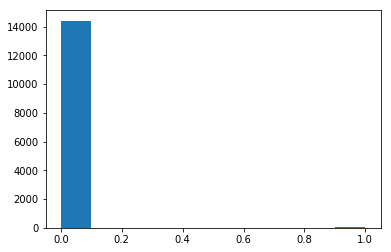

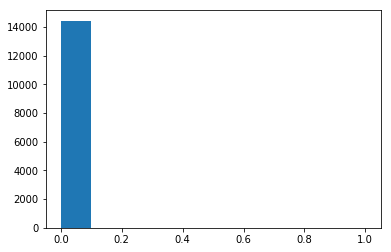

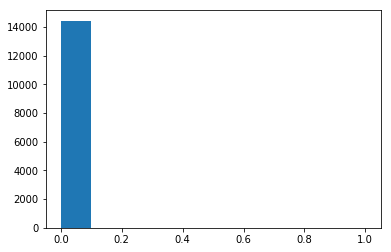

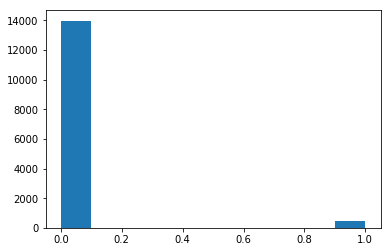

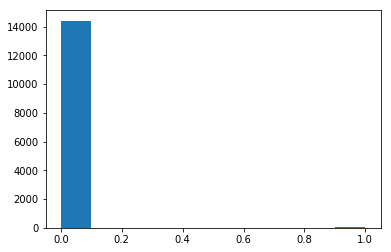

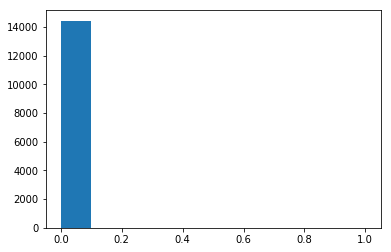

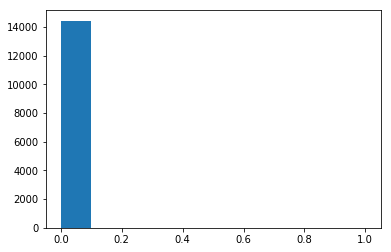

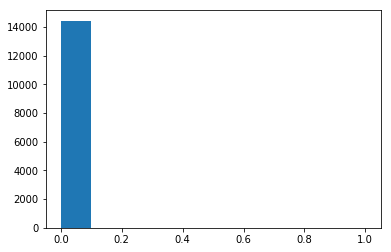

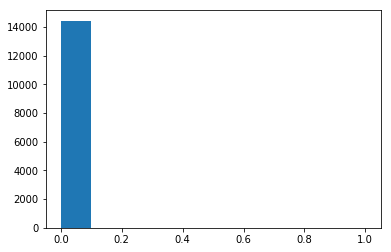

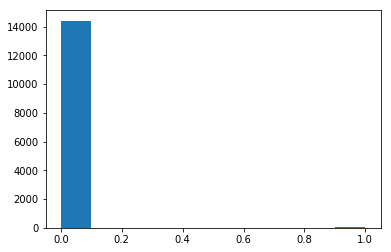

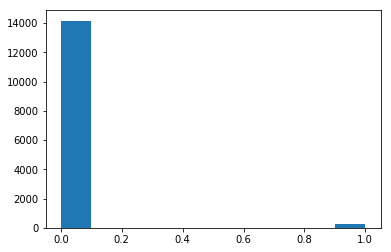

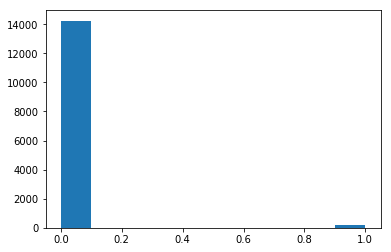

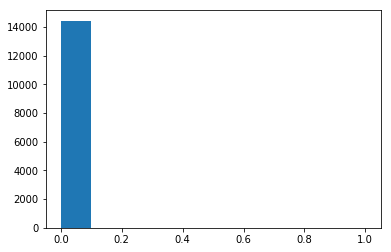

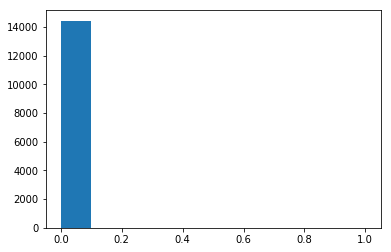

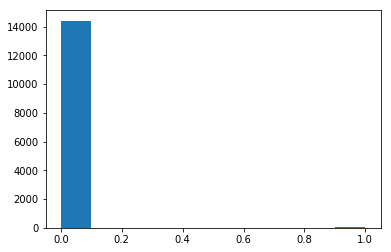

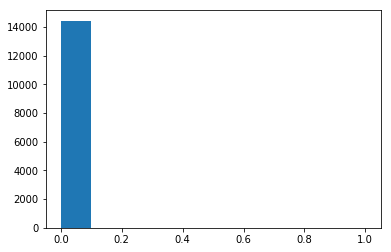

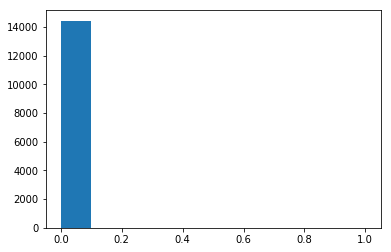

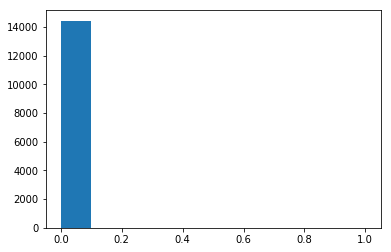

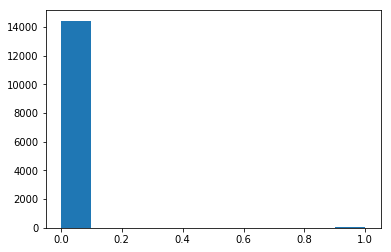

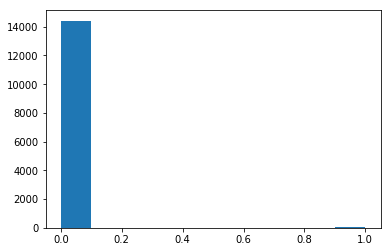

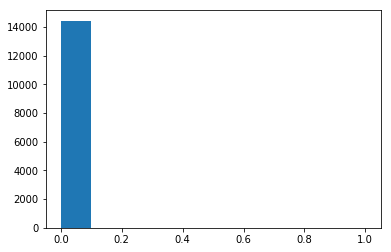

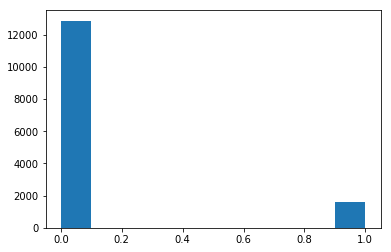

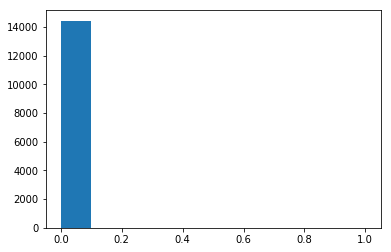

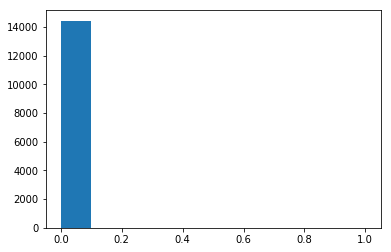

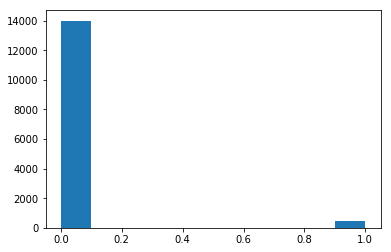

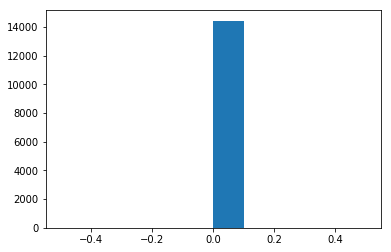

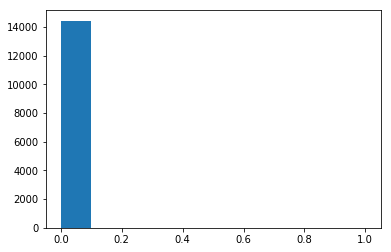

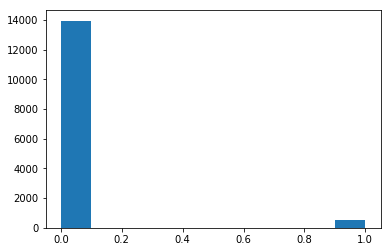

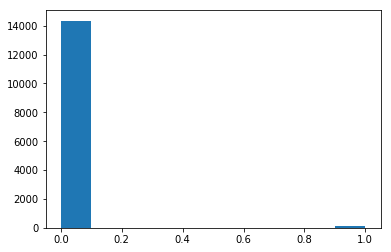

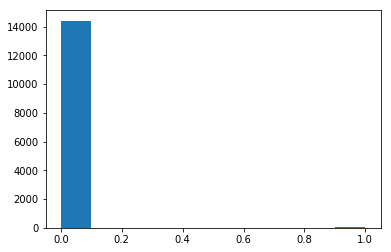

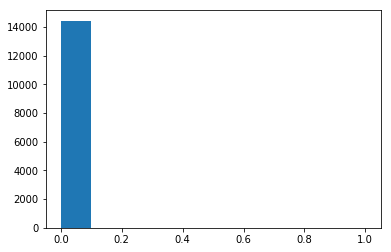

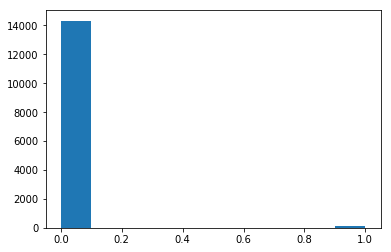

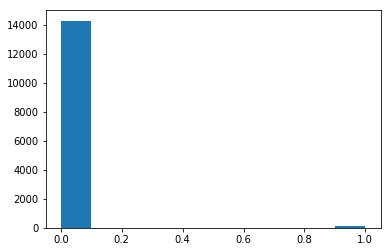

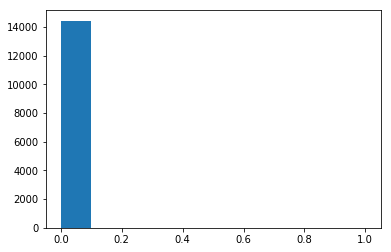

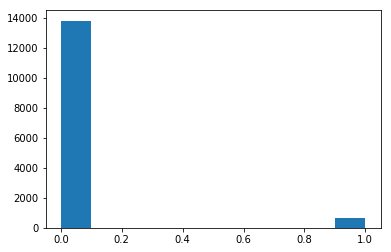

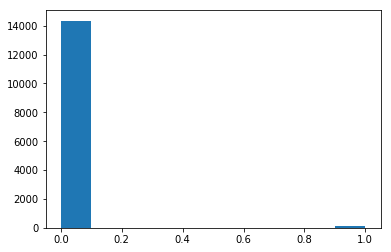

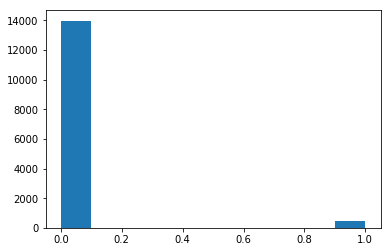

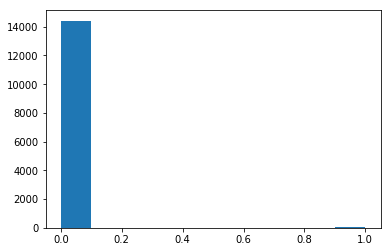

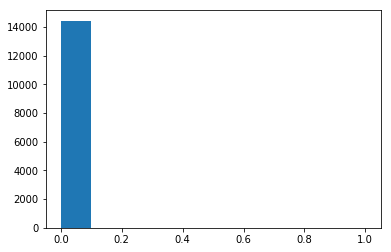

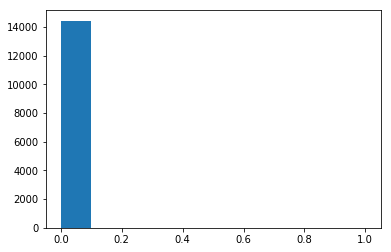

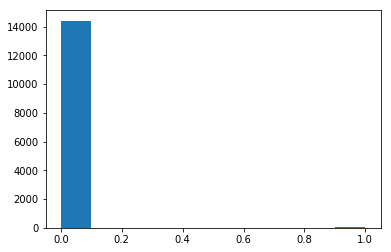

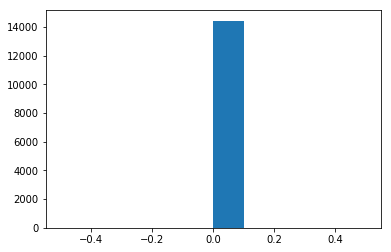

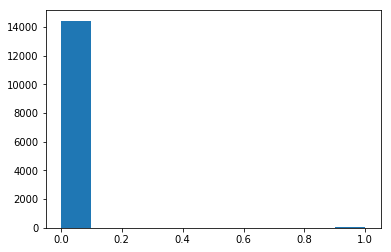

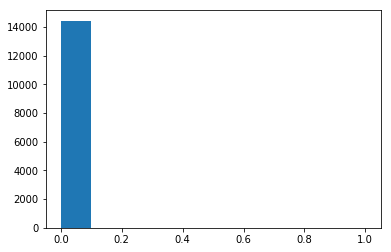

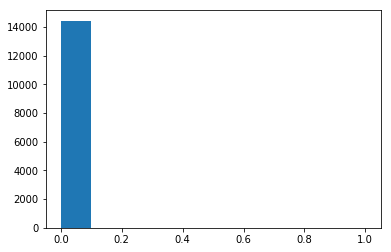

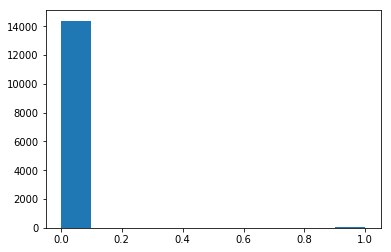

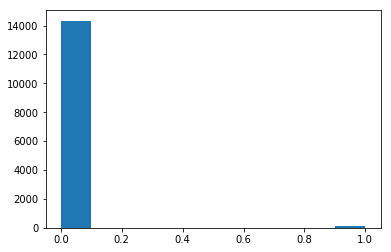

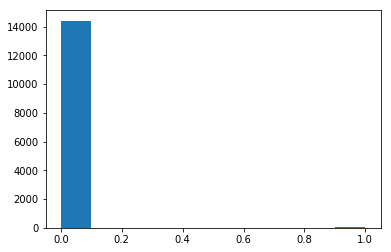

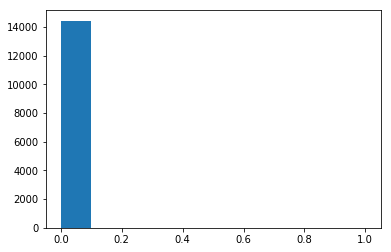

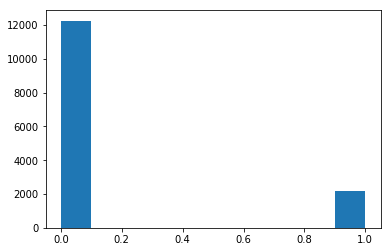

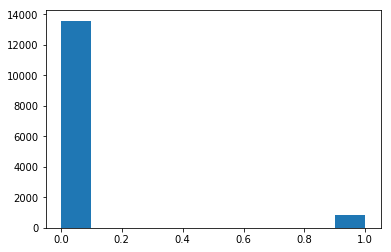

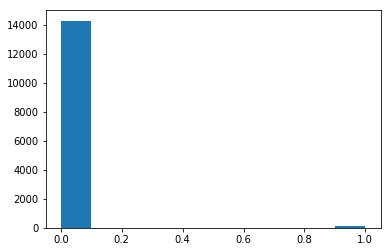

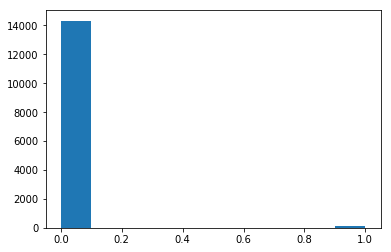

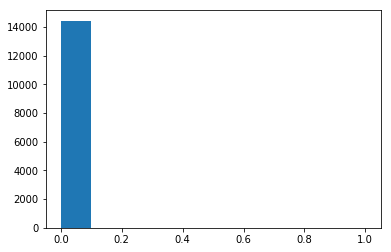

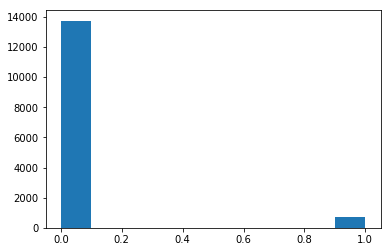

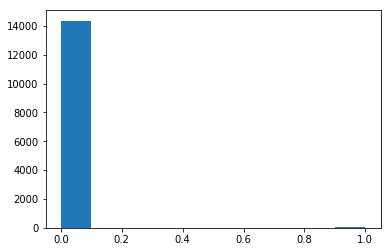

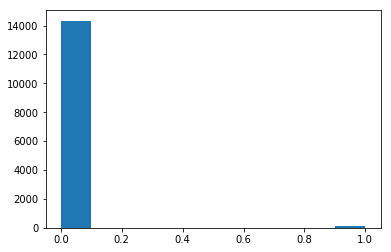

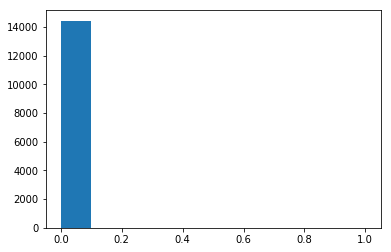

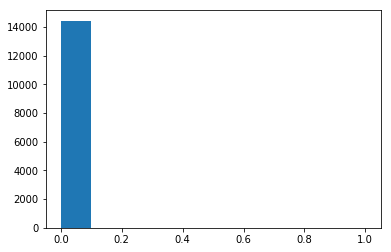

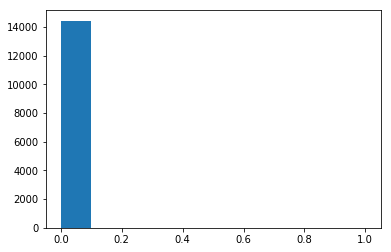

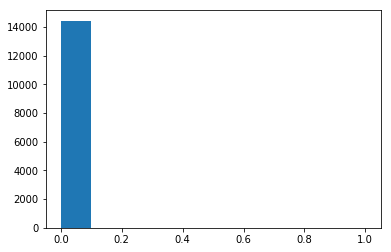

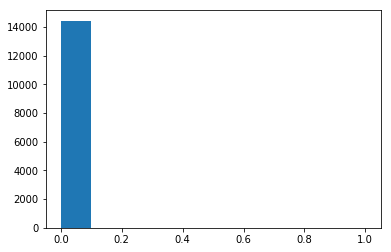

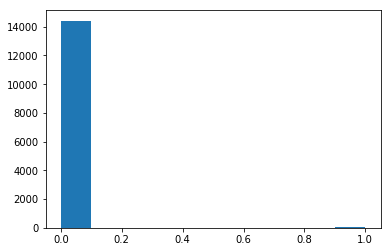

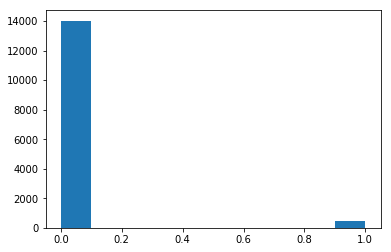

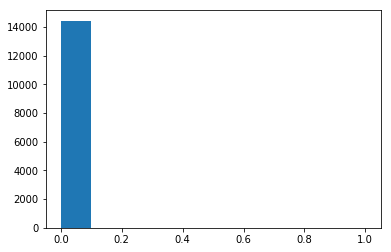

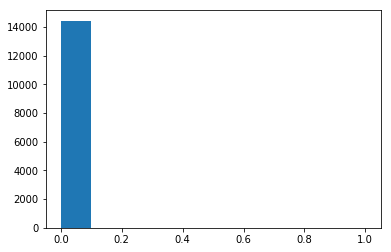

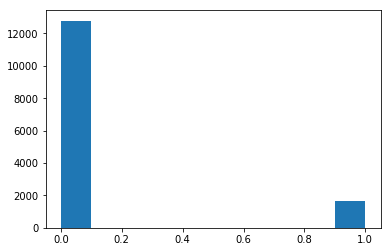

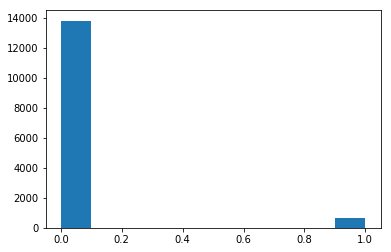

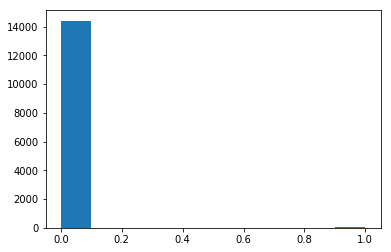

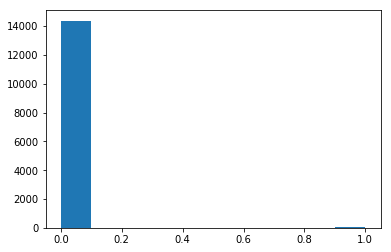

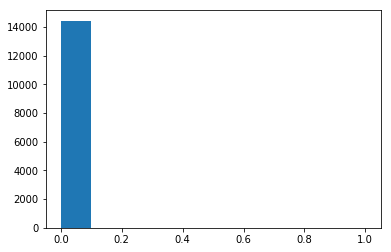

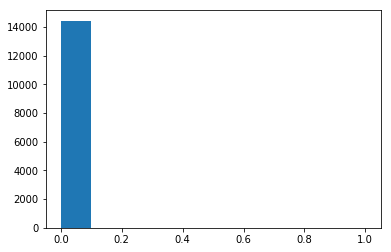

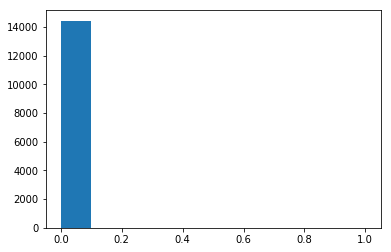

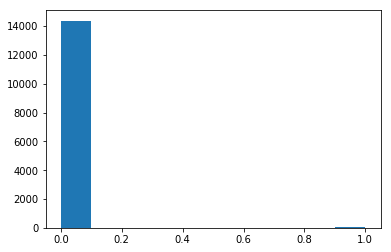

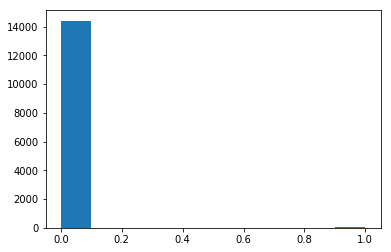

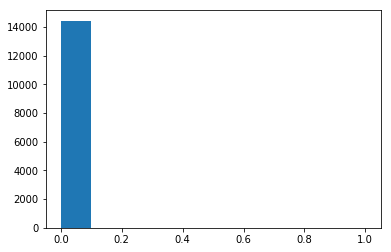

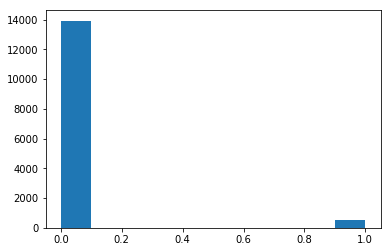

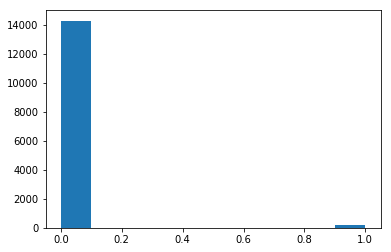

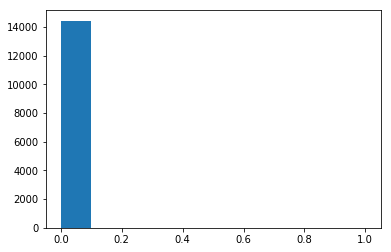

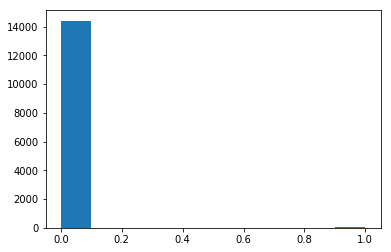

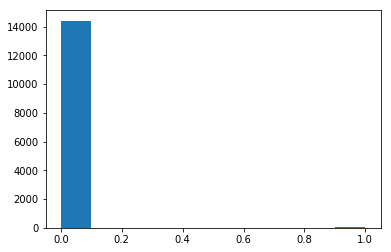

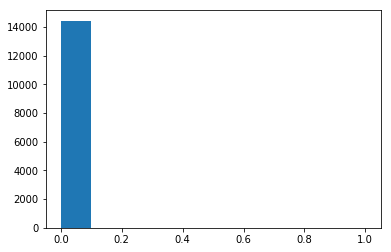

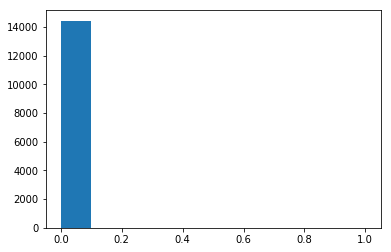

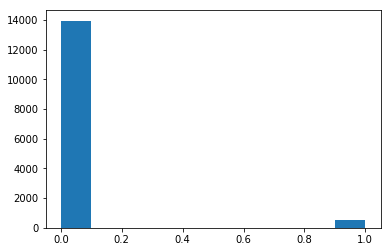

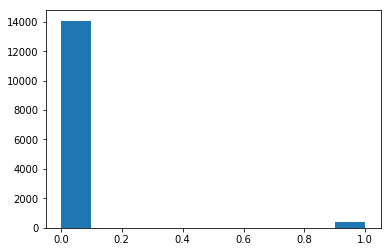

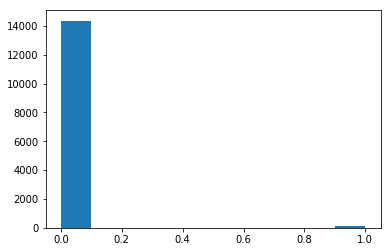

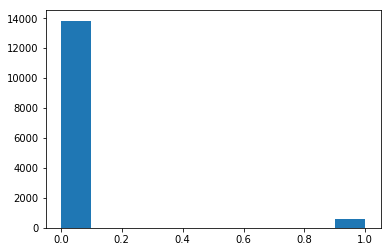

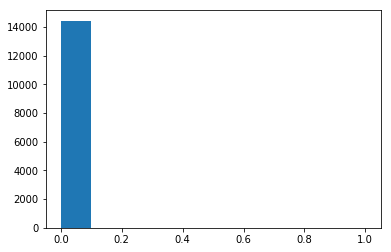

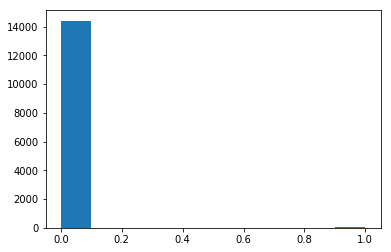

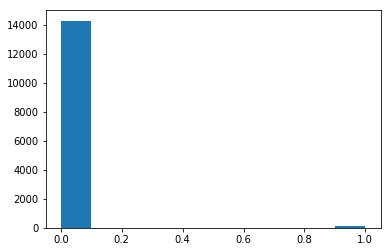

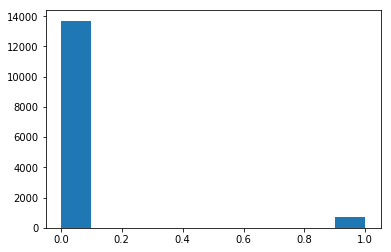

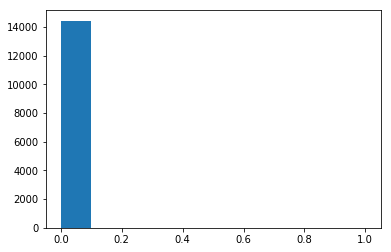

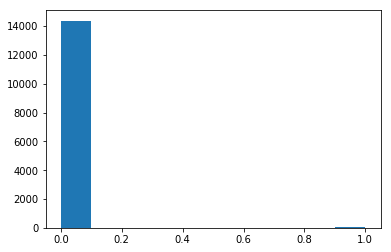

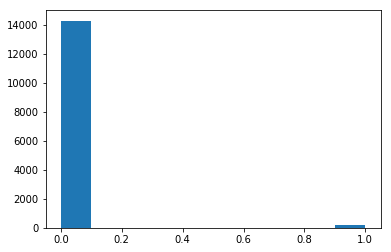

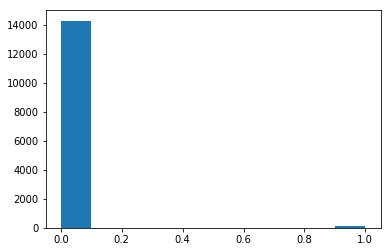

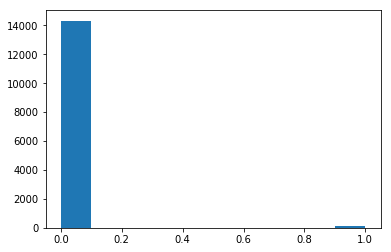

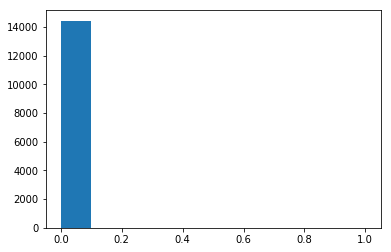

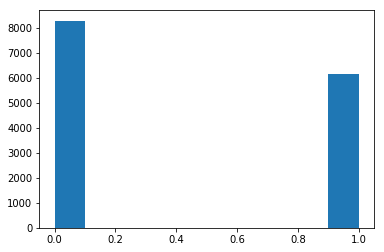

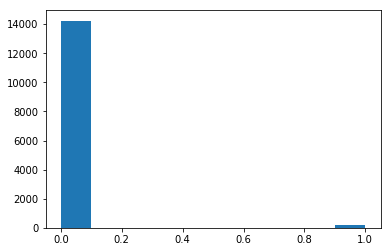

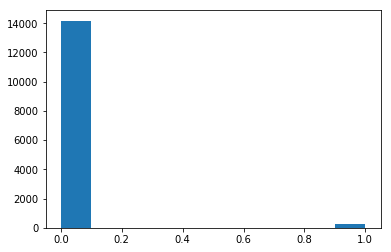

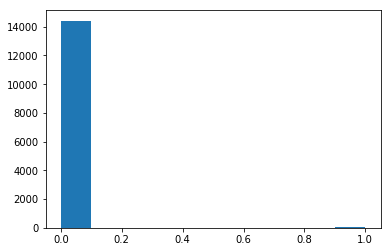

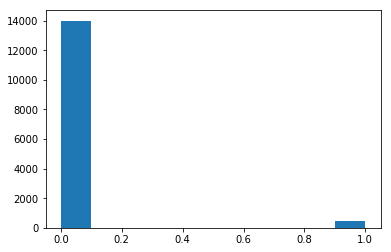

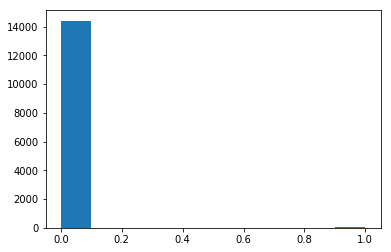

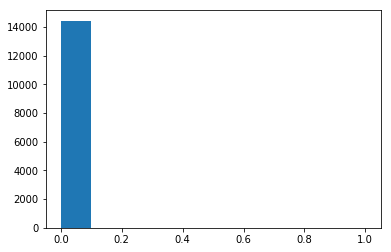

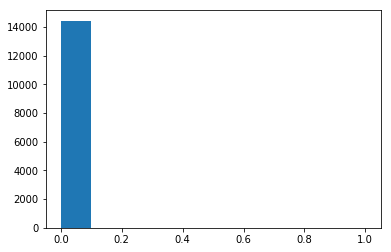

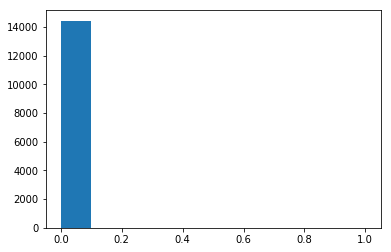

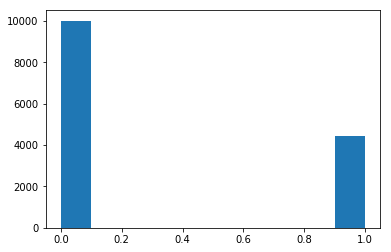

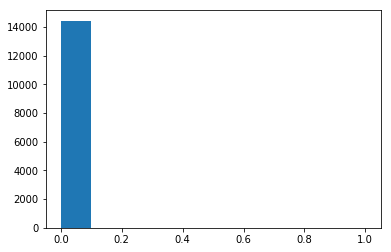

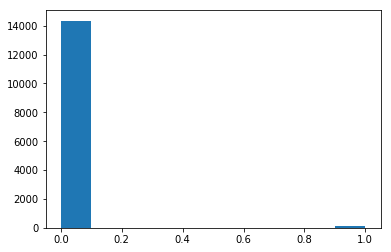

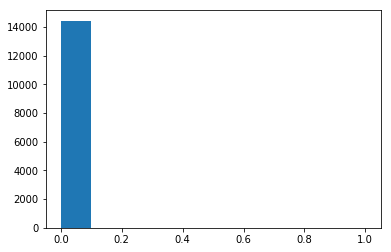

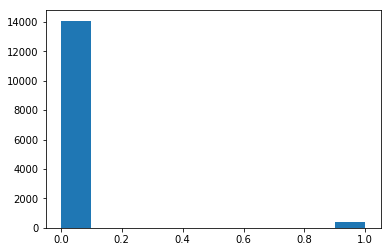

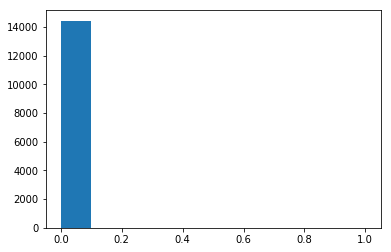

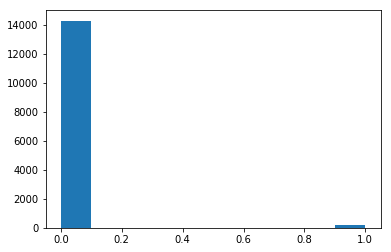

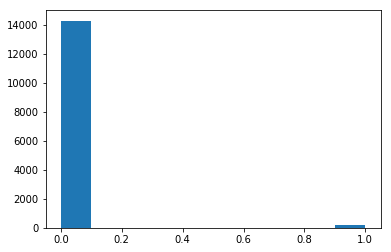

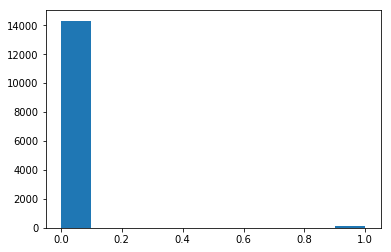

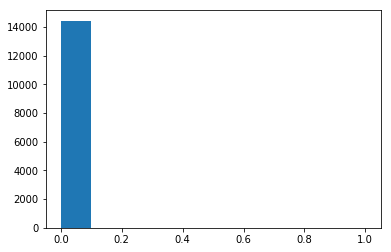

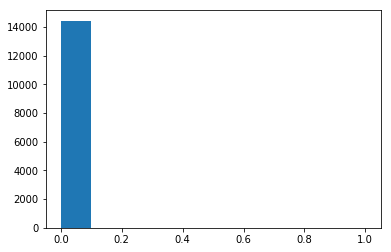

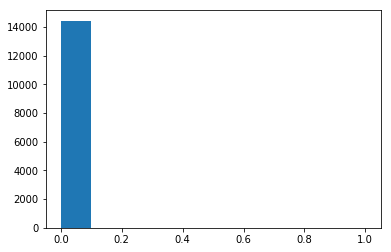

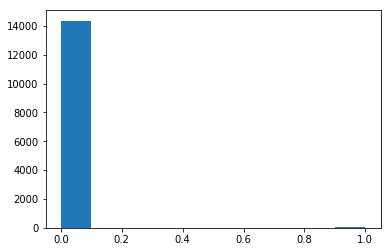

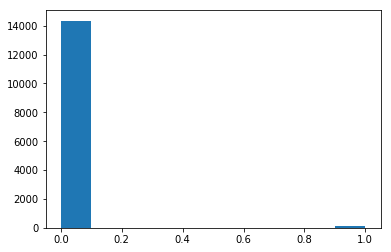

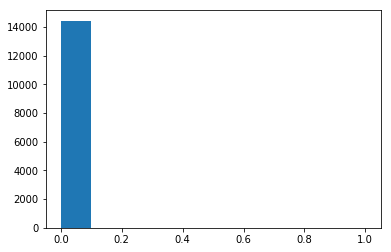

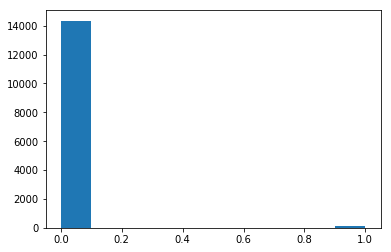

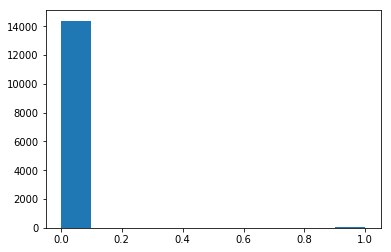

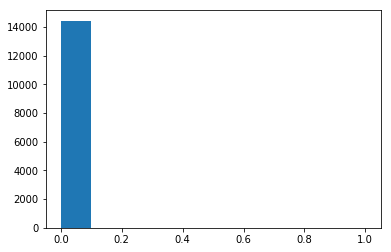

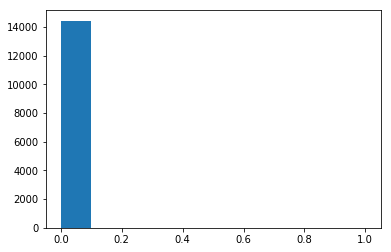

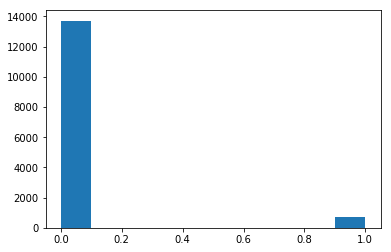

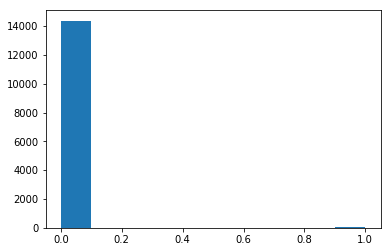

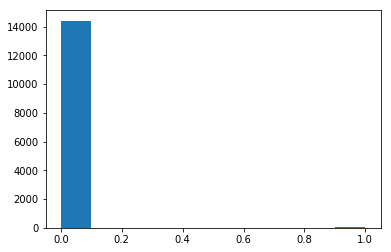

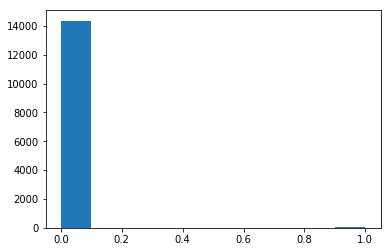

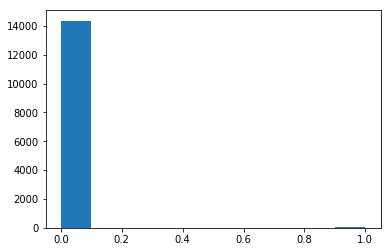

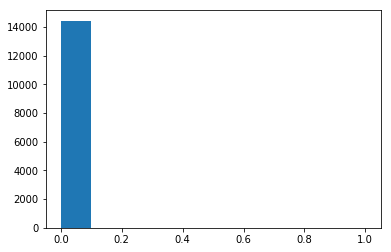

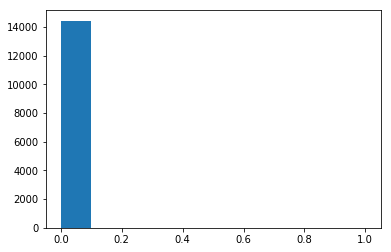

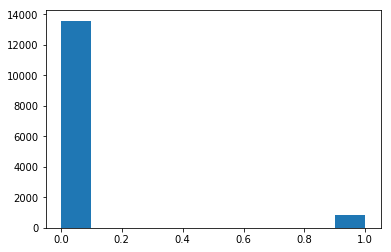

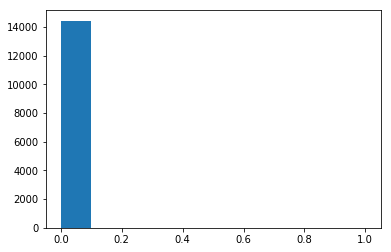

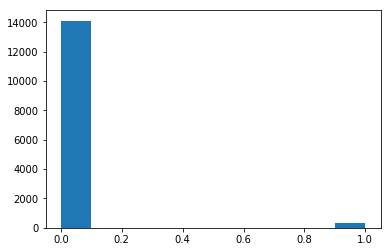

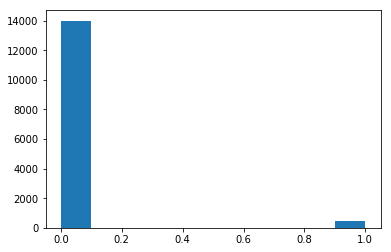

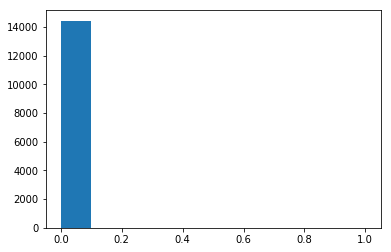

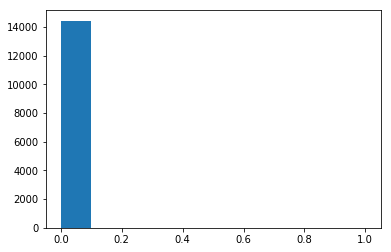

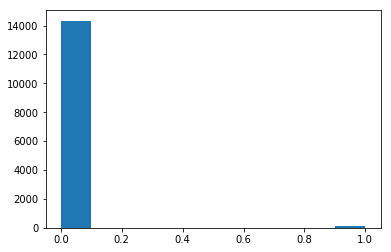

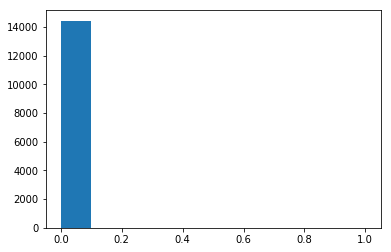

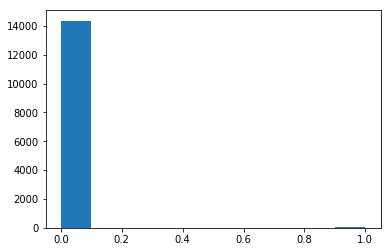

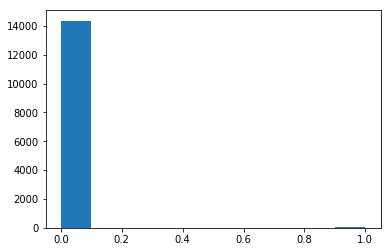

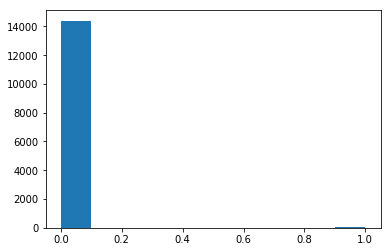

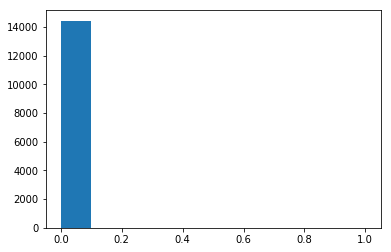

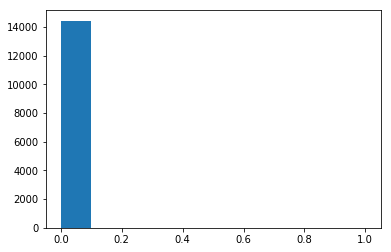

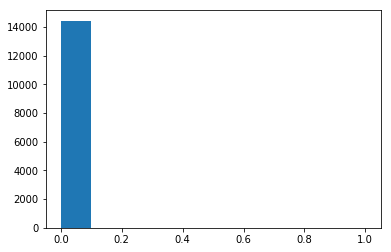

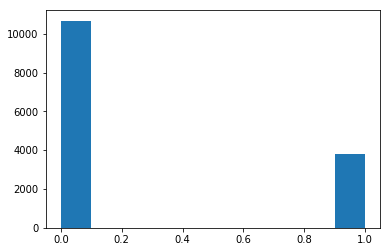

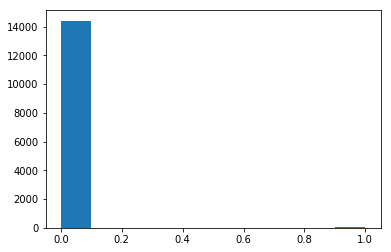

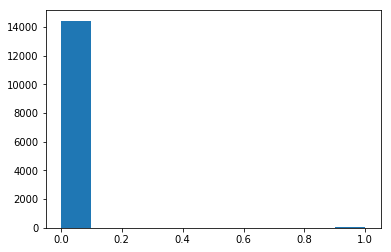

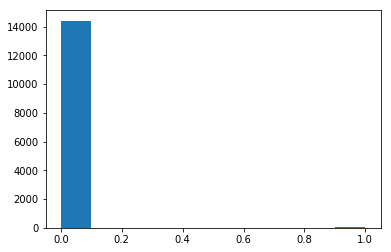

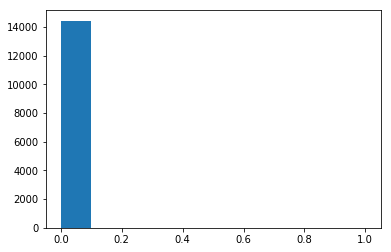

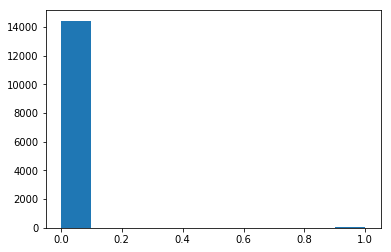

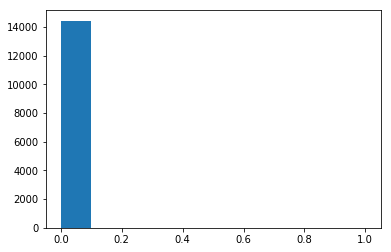

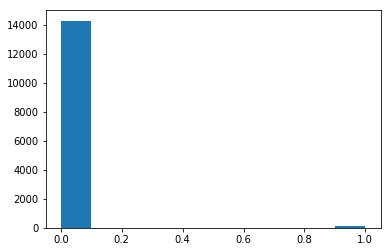

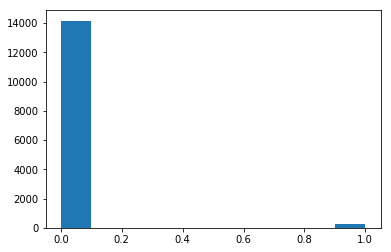

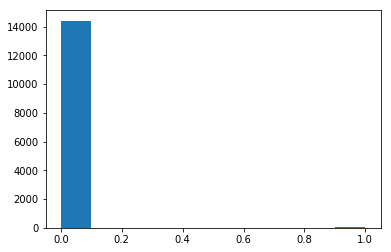

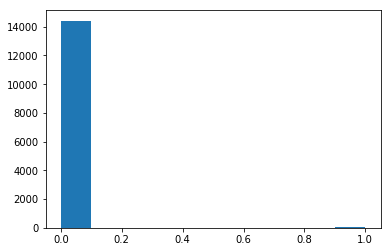

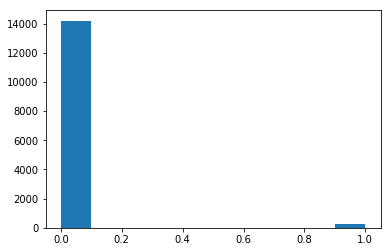

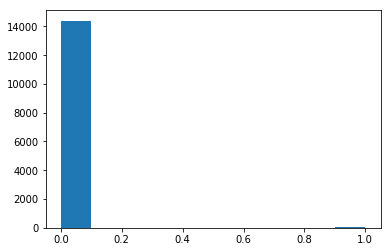

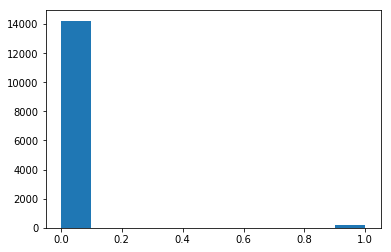

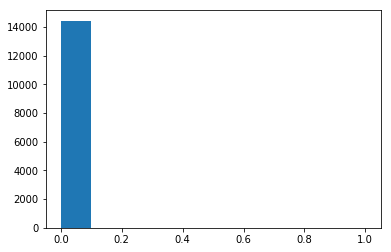

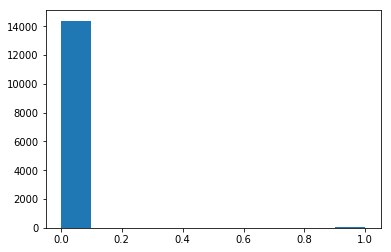

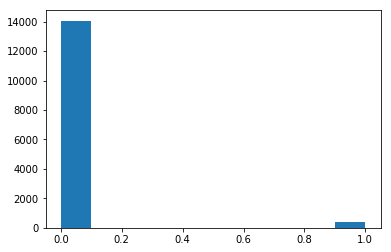

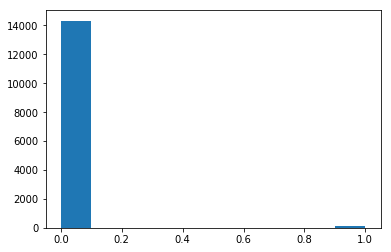

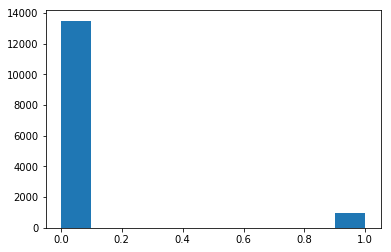

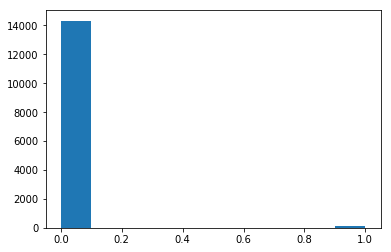

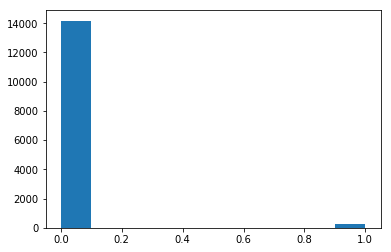

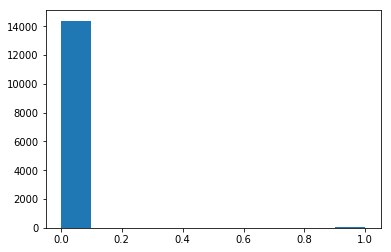

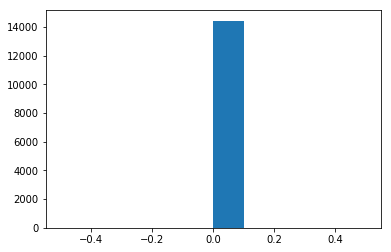

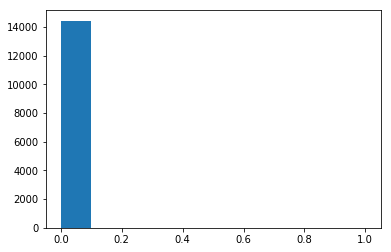

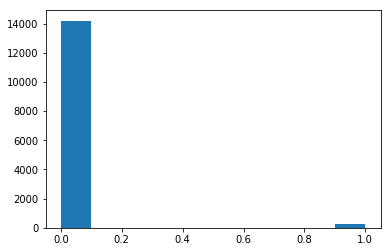

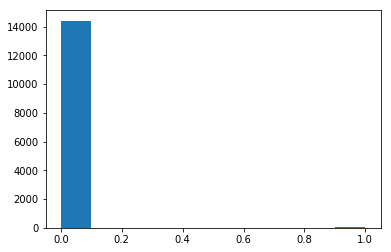

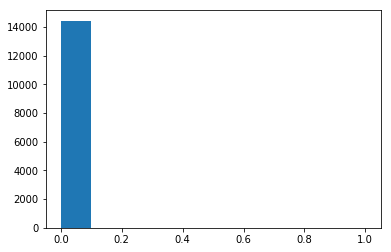

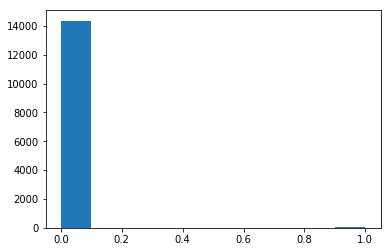

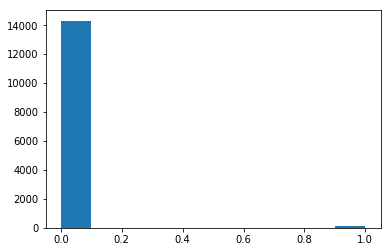

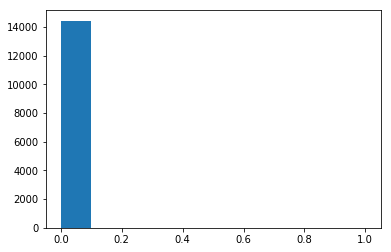

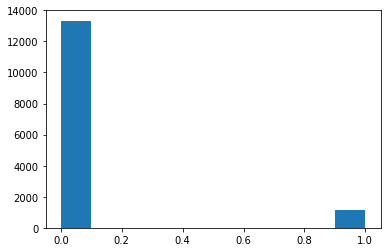

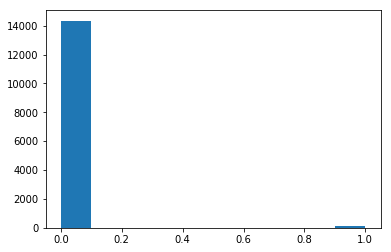

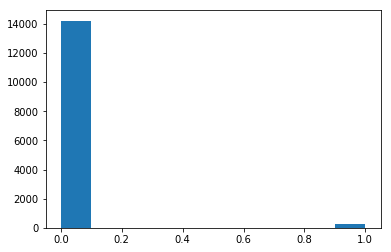

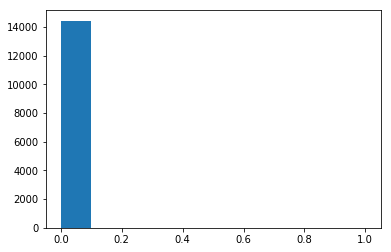

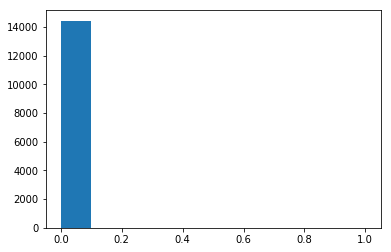

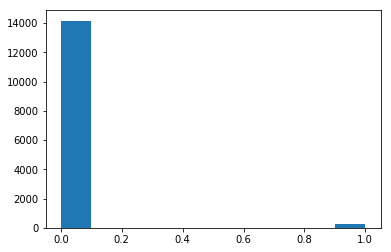

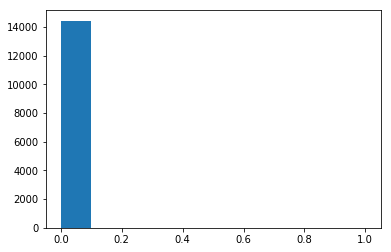

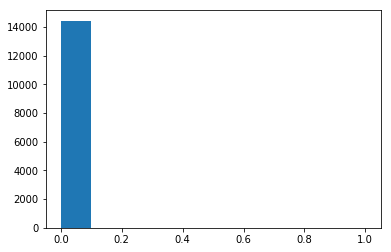

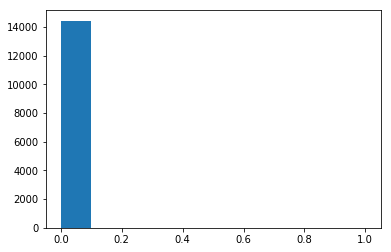

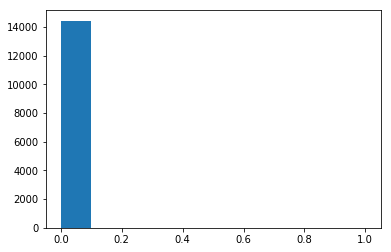

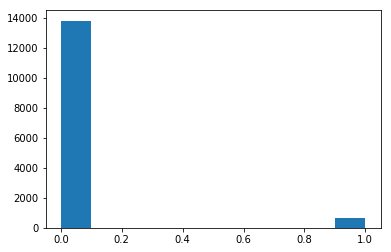

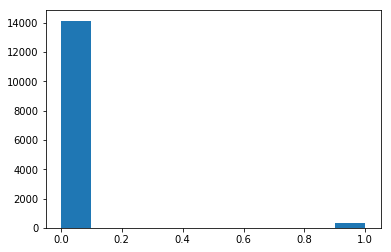

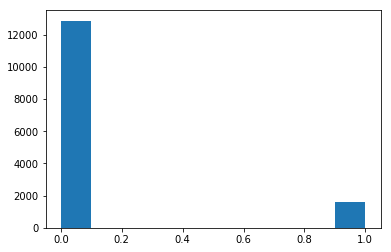

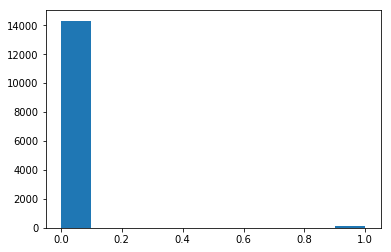

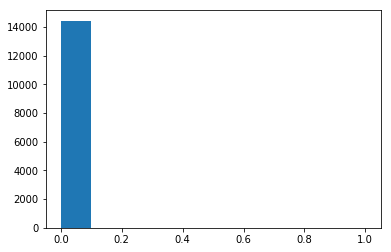

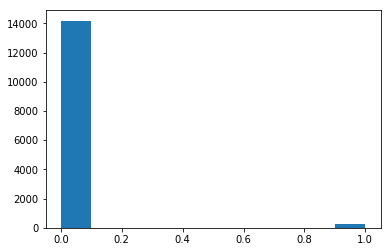

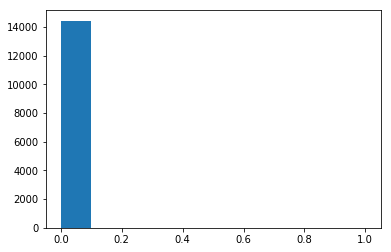

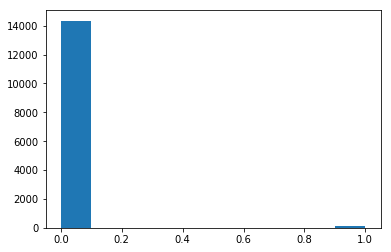

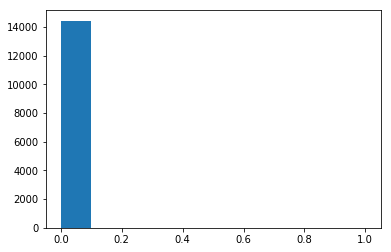

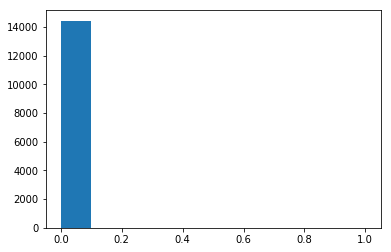

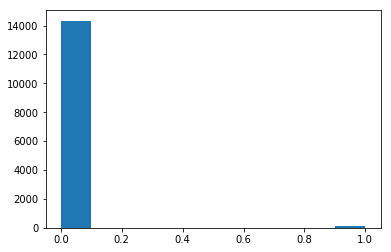

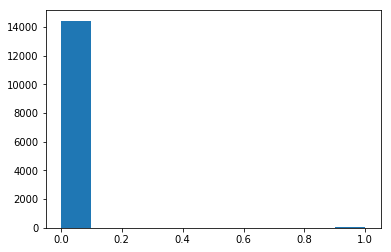

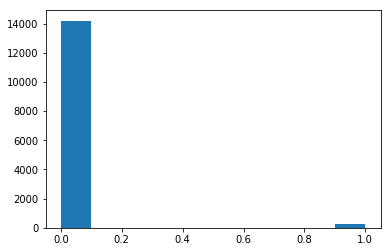

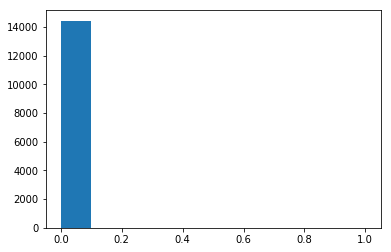

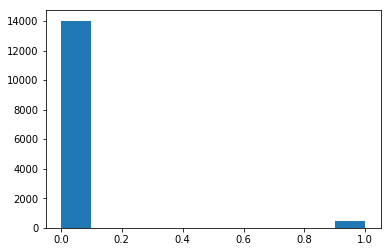

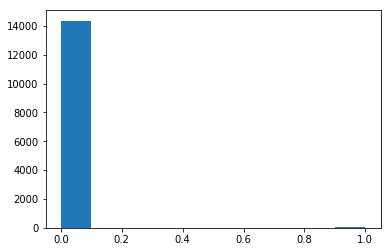

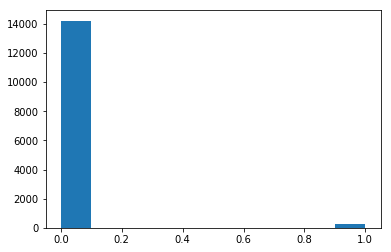

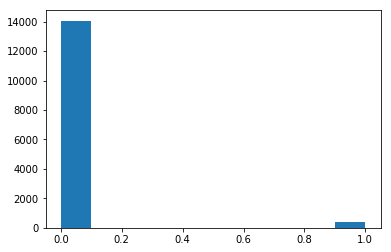

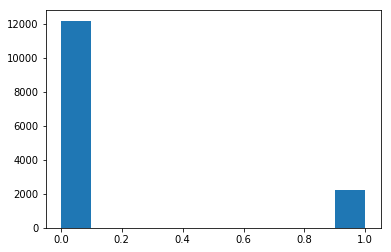

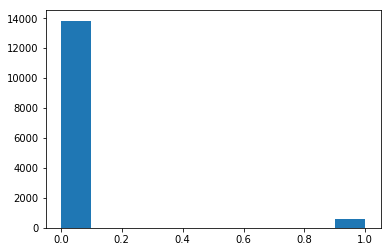

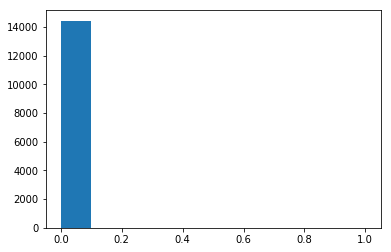

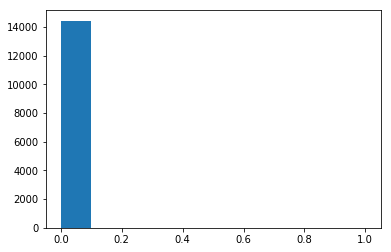

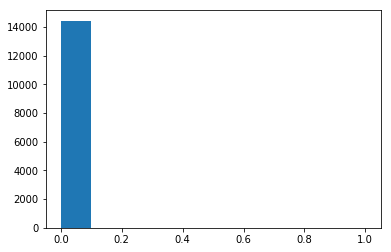

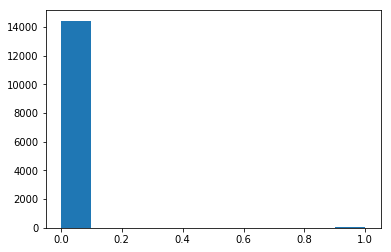

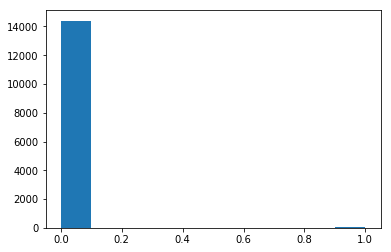

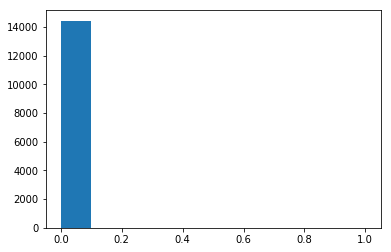

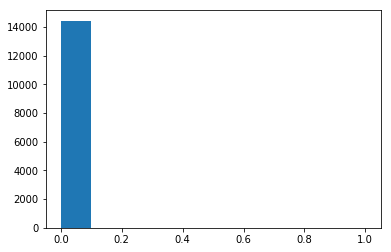

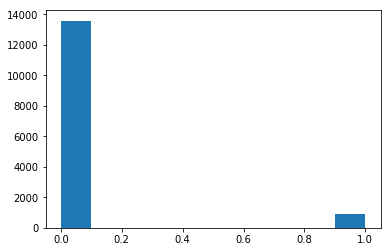

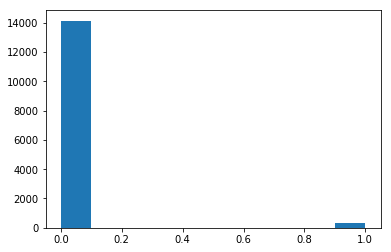

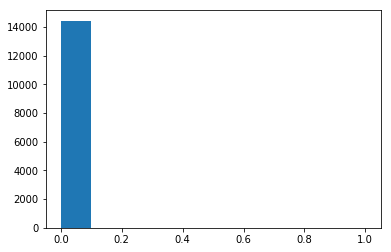

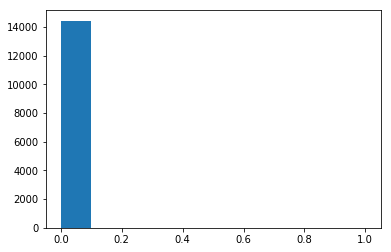

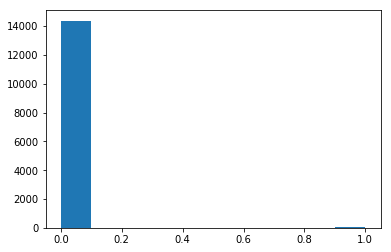

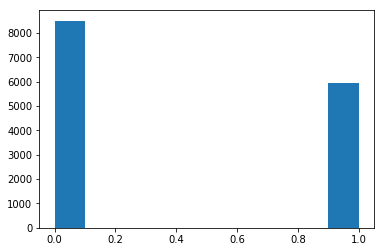

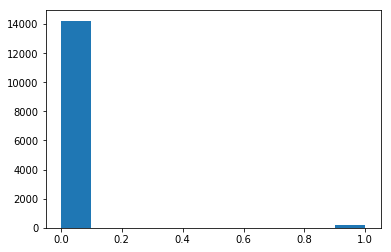

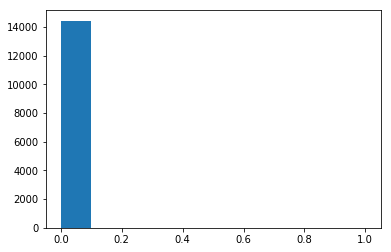

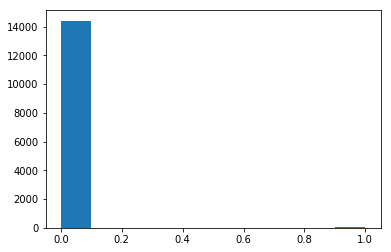

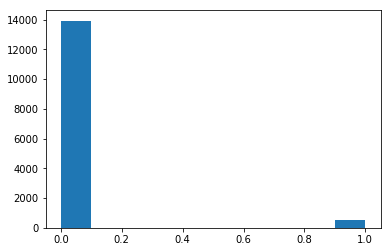

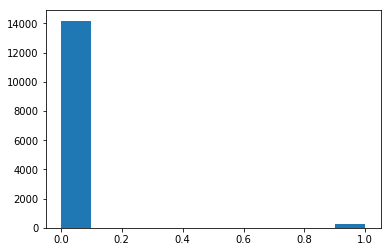

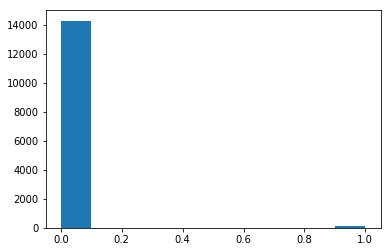

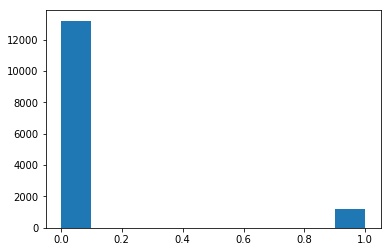

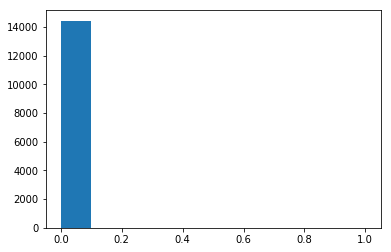

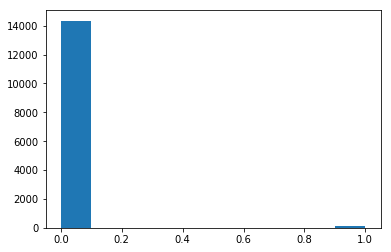

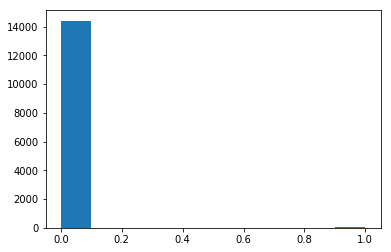

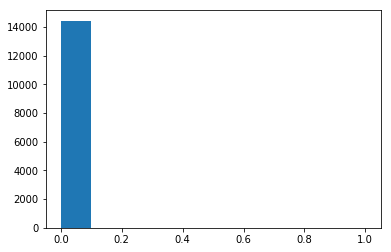

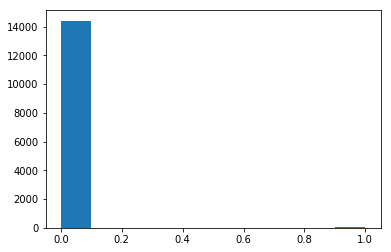

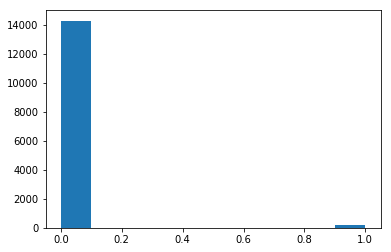

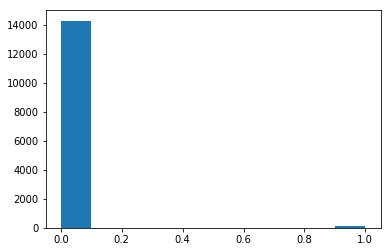

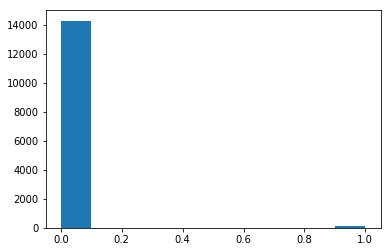

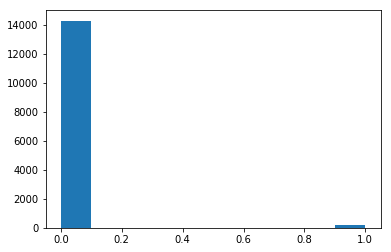

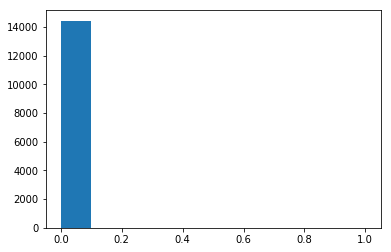

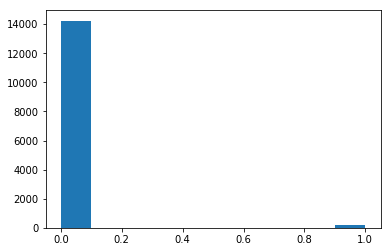

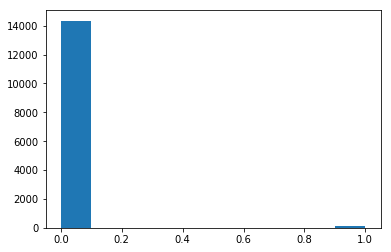

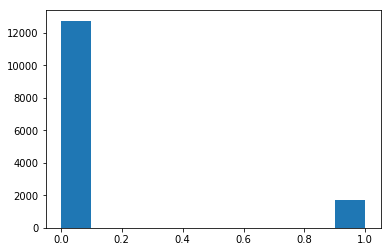

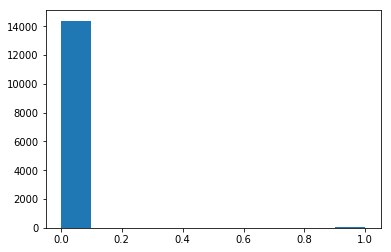

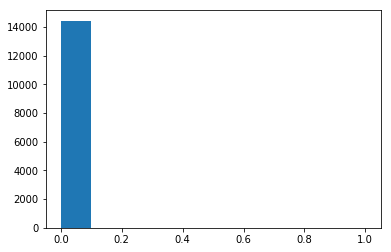

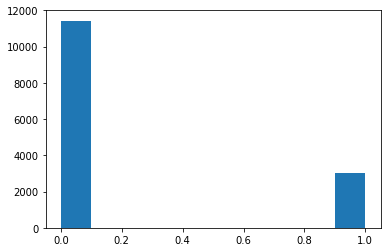

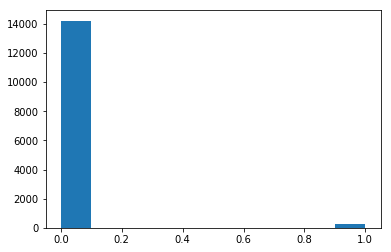

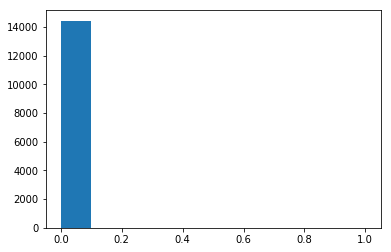

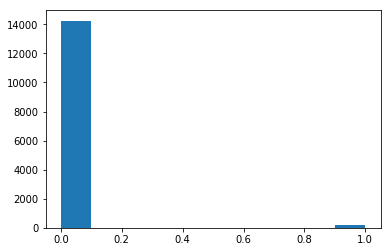

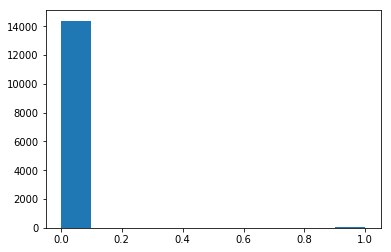

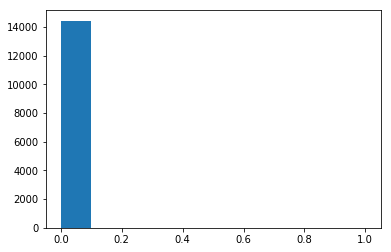

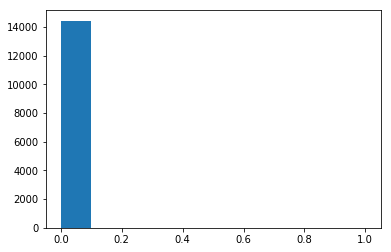

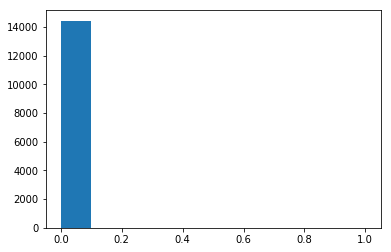

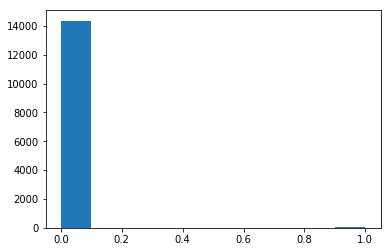

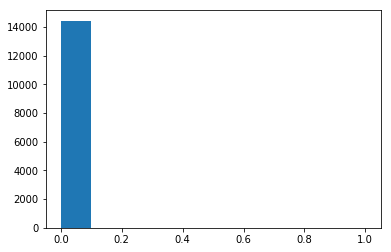

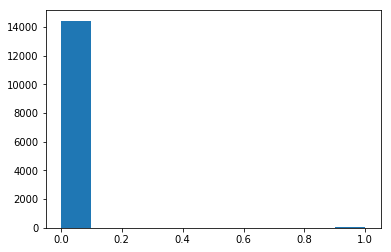

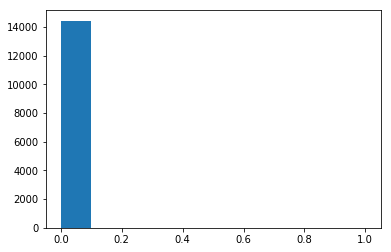

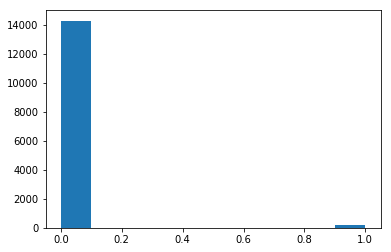

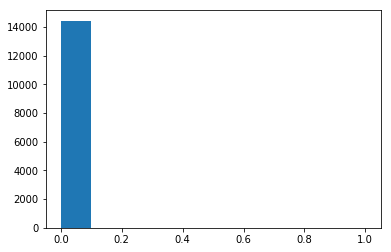

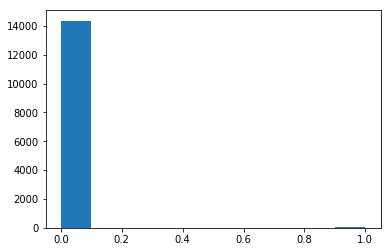

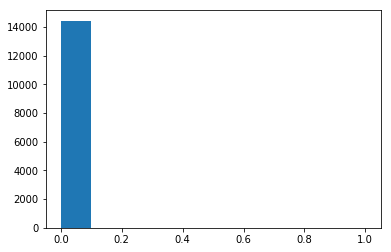

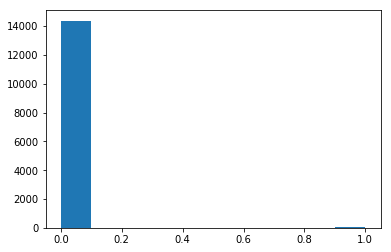

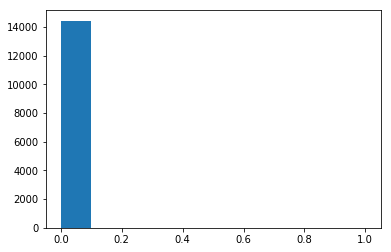

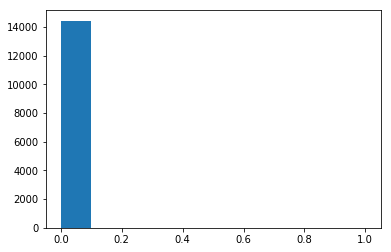

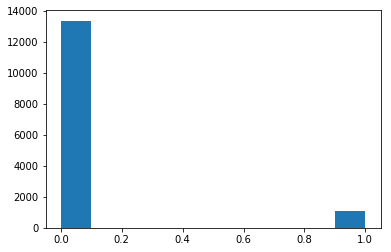

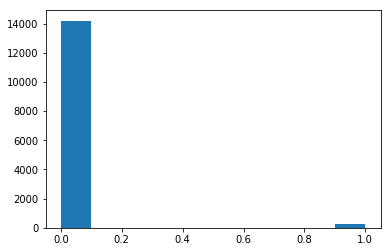

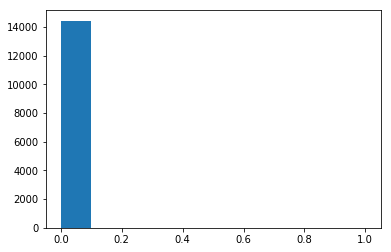

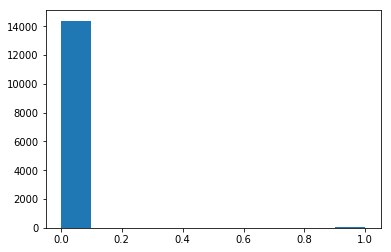

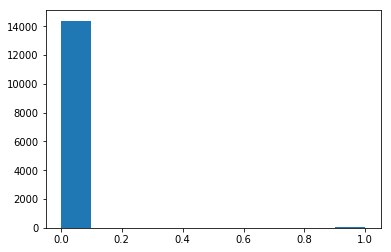

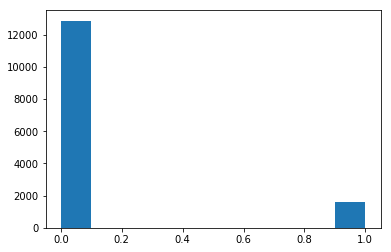

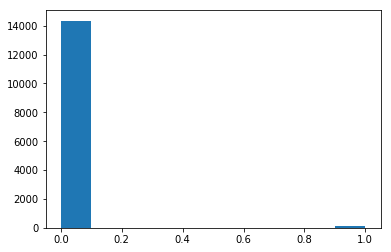

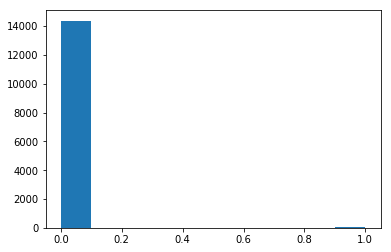

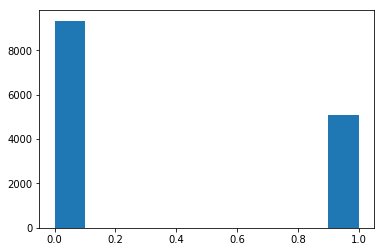

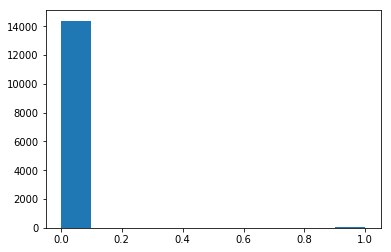

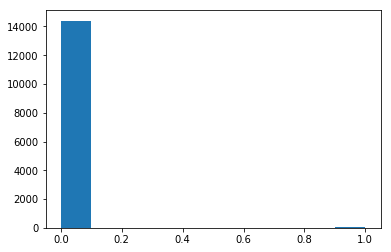

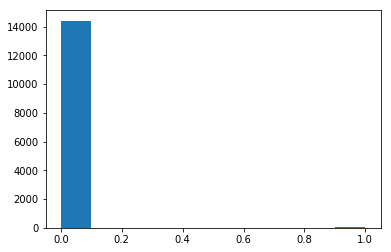

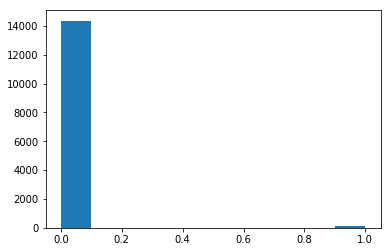

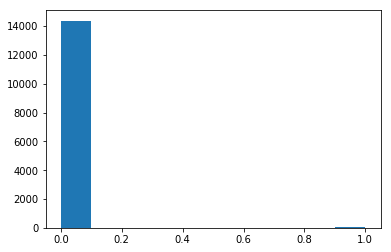

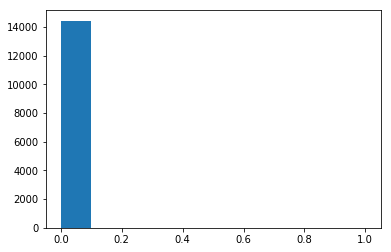

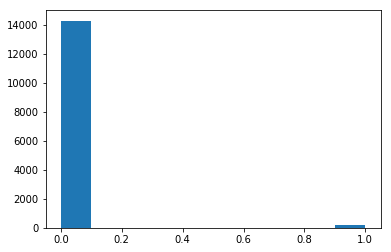

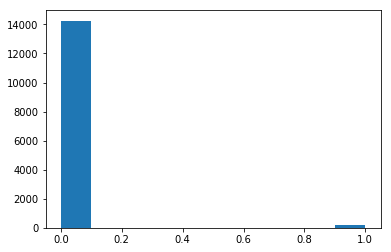

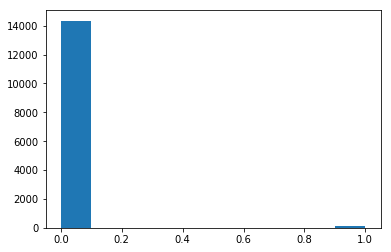

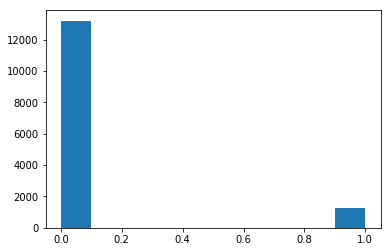

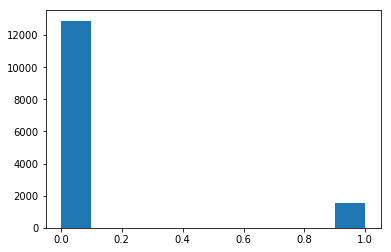

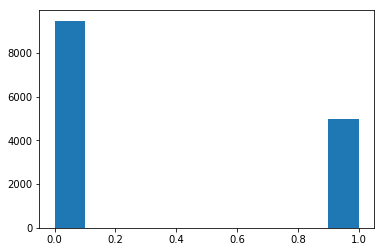

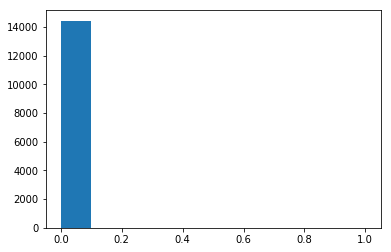

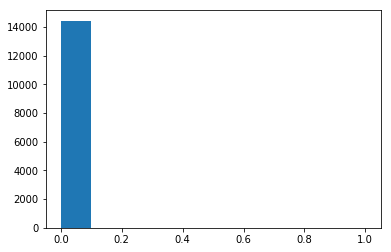

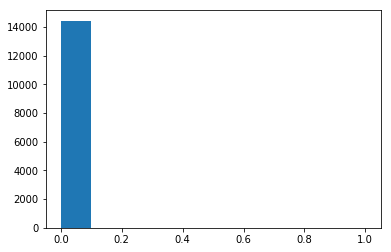

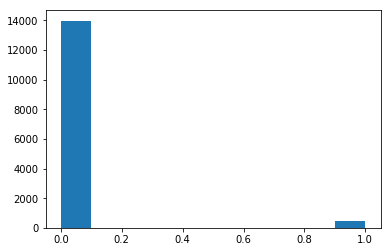

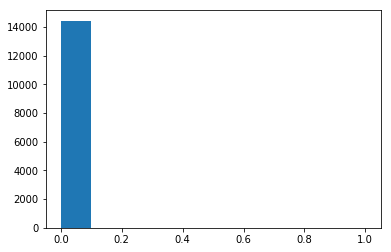

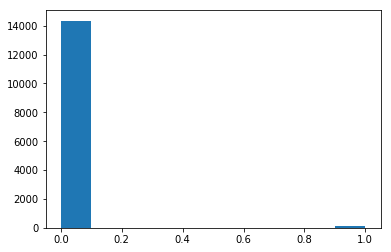

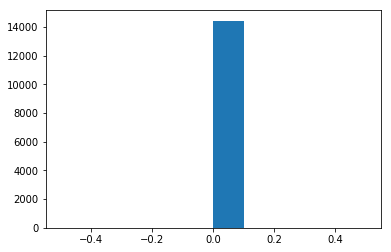

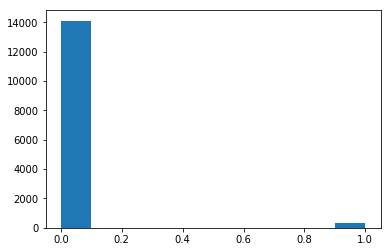

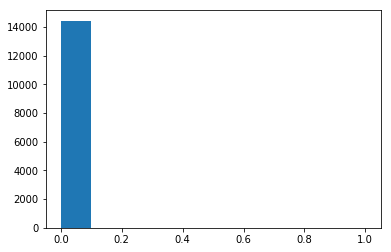

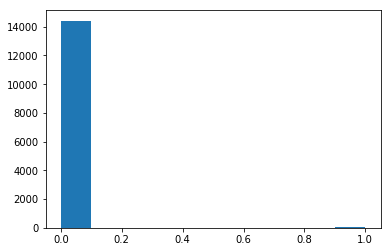

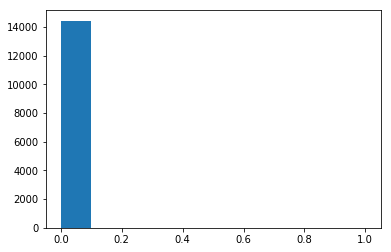

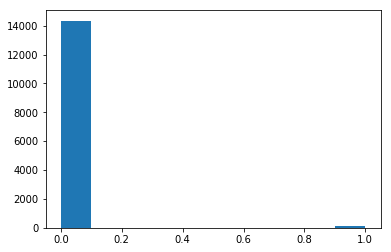

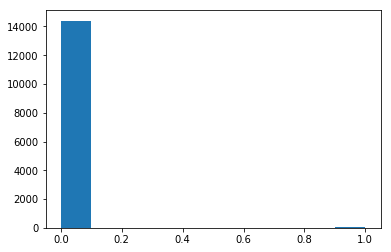

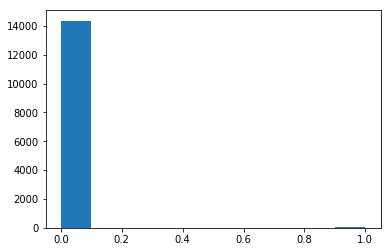

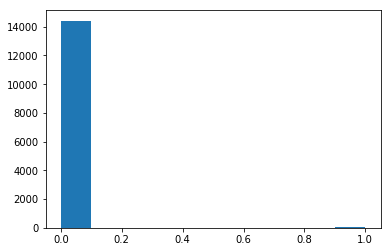

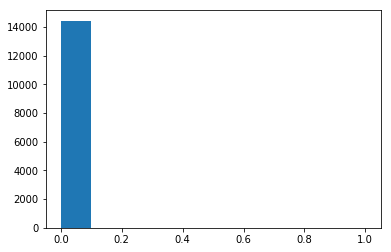

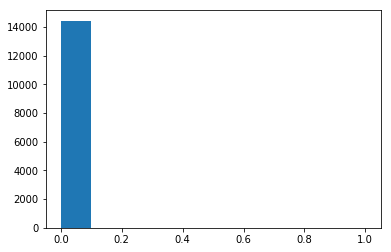

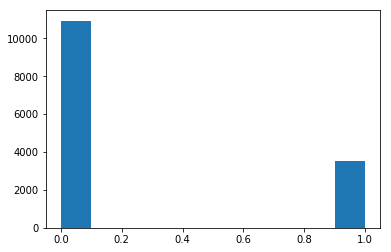

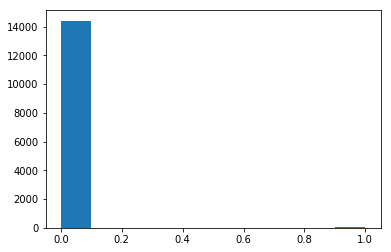

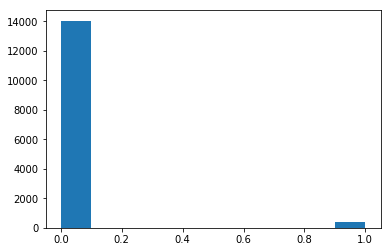

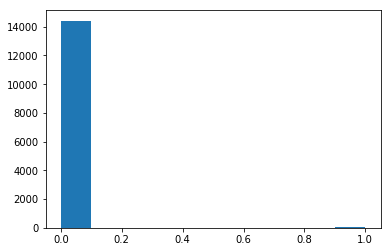

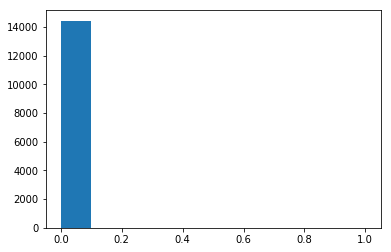

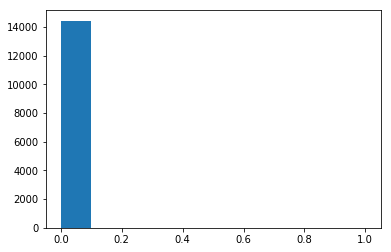

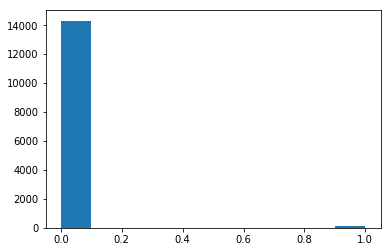

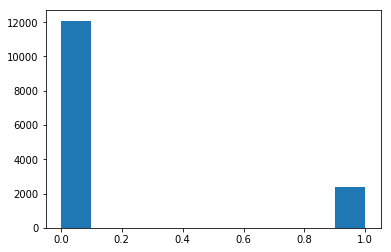

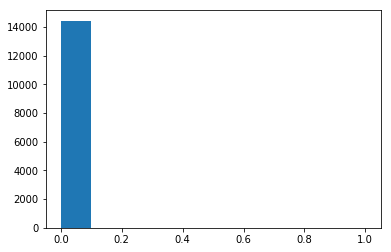

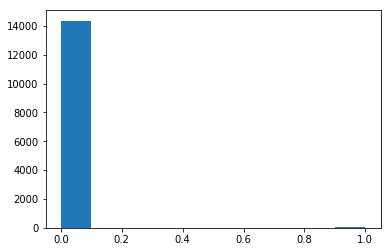

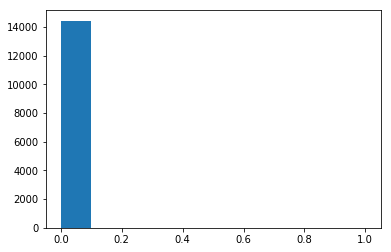

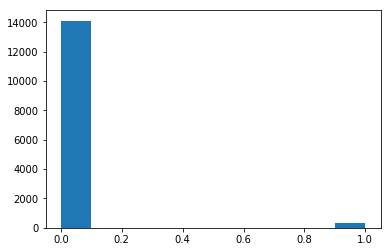

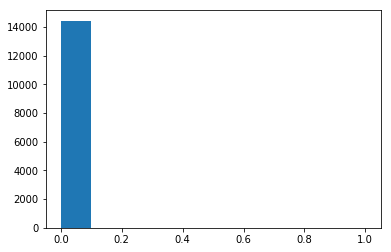

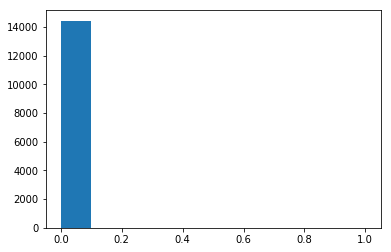

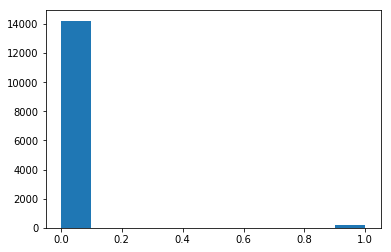

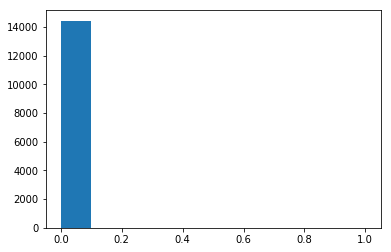

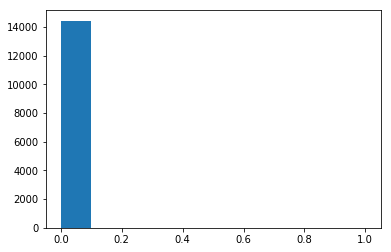

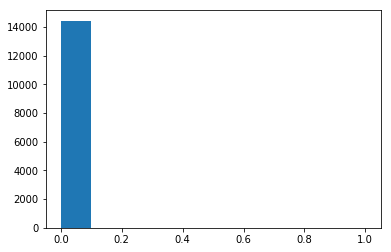

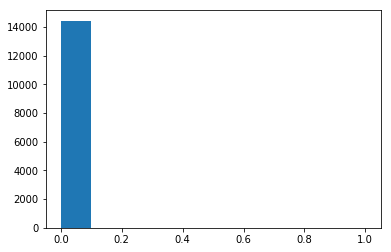

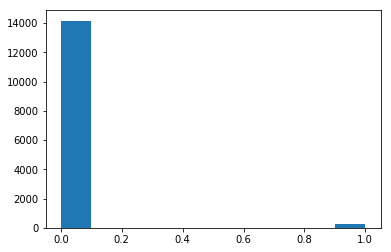

In [47]:
for i in X:
    plt.hist(X[i])
    plt.show()

In [48]:
X['#cakeweek'].value_counts()

0.0    14440
1.0        6
Name: #cakeweek, dtype: int64

In [23]:
X.head(2)

calories  protein  fat  sodium  #cakeweek  #wasteless  22-minute meals  \
0       5.0      7.0  2.0     6.0        0.0         0.0              0.0   
1       5.0      6.0  5.0     9.0        0.0         0.0              0.0   

   3-ingredient recipes  30 days of groceries  advance prep required   ...    \
0                   0.0                   0.0                    0.0   ...     
1                   0.0                   0.0                    0.0   ...     

   yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  \
0            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
1            0.0     0.0      0.0   0.0       0.0        0.0        0.0   

   snack  snack week  turkey  
0    0.0         0.0     1.0  
1    0.0         0.0     0.0  

[2 rows x 678 columns]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [74]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

11556 2890 11556 2890


(array([  930.,     0.,    87.,    61.,     0.,   287.,   851.,  3058.,
         4821.,  1461.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

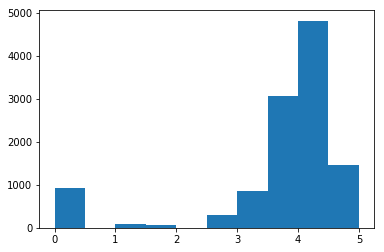

In [75]:
plt.hist(y_train)

In [76]:
X_train.head()

calories  protein  fat  sodium  #cakeweek  #wasteless  22-minute meals  \
13583       7.0      9.0  6.0     7.0        0.0         0.0              0.0   
10385       1.0      4.0  3.0     6.0        0.0         0.0              0.0   
10482       6.0      6.0  5.0     7.0        0.0         0.0              0.0   
9786        0.0      2.0  0.0     9.0        0.0         0.0              0.0   
15810       6.0      3.0  7.0     3.0        0.0         0.0              0.0   

       3-ingredient recipes  30 days of groceries  advance prep required  \
13583                   0.0                   0.0                    0.0   
10385                   0.0                   0.0                    0.0   
10482                   0.0                   0.0                    0.0   
9786                    0.0                   0.0                    0.0   
15810                   0.0                   0.0                    0.0   

        ...    yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  \
13583   ...              0.0     0.0      0.0   0.0       0.0        0.0   
10385   ...              0.0     0.0      0.0   0.0       0.0        0.0   
10482   ...              0.0     0.0      0.0   0.0       0.0        0.0   
9786    ...              0.0     0.0      0.0   0.0       0.0        0.0   
15810   ...              0.0     0.0      0.0   0.0       0.0        0.0   

       leftovers  snack  snack week  turkey  
13583        0.0    0.0         0.0     0.0  
10385        0.0    0.0         0.0     0.0  
10482        0.0    0.0         0.0     0.0  
9786         0.0    0.0         0.0     0.0  
15810        0.0    0.0         0.0     0.0  

[5 rows x 678 columns]

In [77]:
X_train.describe()

calories       protein           fat        sodium     #cakeweek  \
count  11556.000000  11556.000000  11556.000000  11556.000000  11556.000000   
mean       4.502336      4.359380      4.424888      4.497231      0.000519   
std        2.879146      2.968732      2.883604      2.872314      0.022781   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      2.000000      2.000000      0.000000   
50%        5.000000      4.000000      4.000000      5.000000      0.000000   
75%        7.000000      7.000000      7.000000      7.000000      0.000000   
max        9.000000      9.000000      9.000000      9.000000      1.000000   

       #wasteless  22-minute meals  3-ingredient recipes  \
count     11556.0     11556.000000          11556.000000   
mean          0.0         0.001038              0.001644   
std           0.0         0.032209              0.040517   
min           0.0         0.000000              0.000000   
25%           0.0         0.000000              0.000000   
50%           0.0         0.000000              0.000000   
75%           0.0         0.000000              0.000000   
max           0.0         1.000000              1.000000   

       30 days of groceries  advance prep required      ...       \
count          11556.000000           11556.000000      ...        
mean               0.000433               0.005106      ...        
std                0.020797               0.071274      ...        
min                0.000000               0.000000      ...        
25%                0.000000               0.000000      ...        
50%                0.000000               0.000000      ...        
75%                0.000000               0.000000      ...        
max                1.000000               1.000000      ...        

       yellow squash        yogurt       yonkers          yuca      zucchini  \
count   11556.000000  11556.000000  11556.000000  11556.000000  11556.000000   
mean        0.001211      0.022499      0.000087      0.000346      0.016355   
std         0.034787      0.148307      0.009302      0.018602      0.126843   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

          cookbooks     leftovers         snack    snack week        turkey  
count  11556.000000  11556.000000  11556.000000  11556.000000  11556.000000  
mean       0.000173      0.000260      0.001298      0.000779      0.020336  
std        0.013155      0.016111      0.036006      0.027898      0.141152  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000  

[8 rows x 678 columns]

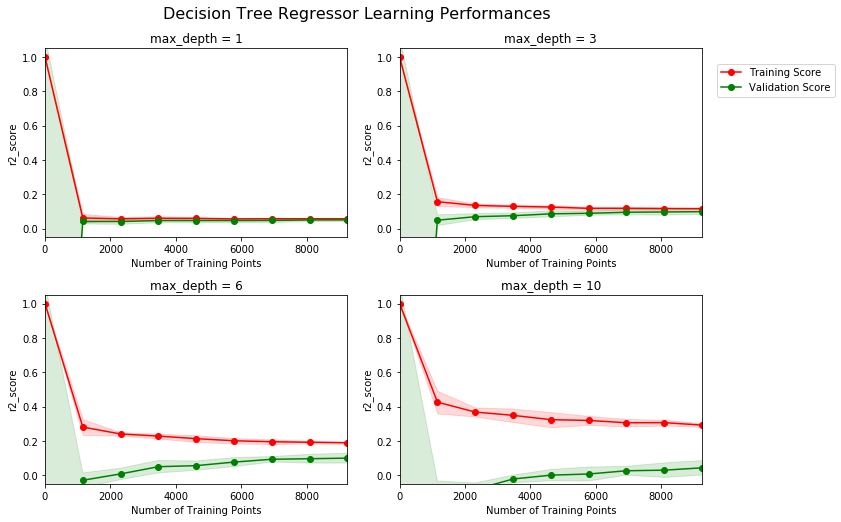

In [83]:
import visuals as vs
vs.ModelLearning(X_train, y_train)

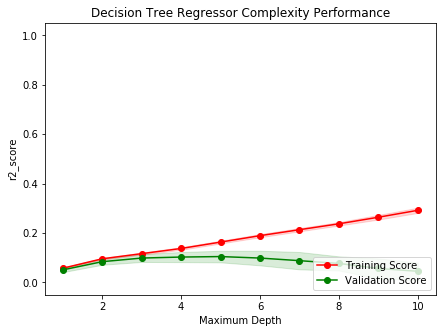

In [84]:
vs.ModelComplexity(X_train, y_train)

In [140]:
from sklearn import linear_model
y = y_train
X = X_train
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
y_train=y
X_train=X


[ 3.78560757  4.22098184  3.73344837 ...,  4.26917056  3.58018902
  3.77781779]


In [141]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler

In [142]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
#    'LinearRegression' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
#    'SGDRegressor'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
}

In [143]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [144]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

In [145]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}
# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

In [146]:
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [147]:
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [1500, 3000]#,
#    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [148]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
#    'gradientboostingregressor__n_estimators': [100, 200],
#    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
#    'gradientboostingregressor__max_depth': [1, 3, 5]
    'gradientboostingregressor__n_estimators': [1500, 2000]#,
 #   'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2] 
}

In [149]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [150]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [151]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [152]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [153]:
# Fit and tune model
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [155]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [156]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [157]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.139336014911
ridge 0.0944995903528
enet 0.143357382945
rf 0.115077945316
gb 0.113302619502


In [158]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [159]:
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...timators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [1500, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [161]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.110671349229
MAE: 0.788348260628


In [162]:
# Code here
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.146232940329
MAE: 0.791708963204

ridge
--------
R^2: 0.111084777009
MAE: 0.814330430035

enet
--------
R^2: 0.146541830574
MAE: 0.791810430213

rf
--------
R^2: 0.110671349229
MAE: 0.788348260628

gb
--------
R^2: 0.134672375147
MAE: 0.78741071513



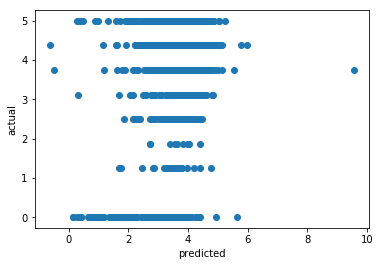

In [163]:
gb_pred = fitted_models['ridge'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [164]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [165]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [166]:
import pickle

In [167]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [168]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X, y)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Unknown label type: 'continuous'